# Imports

In [4451]:
#%pip install pandas numpy seaborn matplotlib scikit-learn imbalanced-learn lightgbm xgboost regex kmodes

In [4452]:
# Math and Data Manipulation
import pandas as pd
import numpy as np
import regex as re
import os
import sys
import time

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Feature Selection and Preprocessing
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer 
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes

# Training and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Sampling
from imblearn.over_sampling import SMOTE, SMOTENC

# Pipelines
from sklearn.pipeline import Pipeline

# Mute warnings
import warnings
warnings.filterwarnings('ignore')


In [4453]:
# Load the dataset into a dataframe
df = pd.read_csv('../dataset/bank-direct-marketing-campaigns.csv')

# Overview of The Dataset

**About Dataset:**

This data set contains records relevant to a direct marketing campaign of a Portuguese banking institution. The marketing campaign was executed through phone calls. Often, more than one call needs to be made to a single client before they either decline or agree to a term deposit subscription. The classification goal is to predict if the client will subscribe (yes/no) to the term deposit (variable y). The data set is chronological, covering campaigns carried out from May 2008 to November 2010. The dataset provides a rich test bed for machine learning algorithms with all sorts of insights into customer behavior and effectiveness of campaigns. This would empower the institutions to run more effective campaigns by predicting the probability of a customer signing up for a term deposit, thereby reducing costs and improving 
customer targeting and experience through ethical marketing practices.

**Source:** https://www.kaggle.com/datasets/ruthgn/bank-marketing-data-set/data

Input Variables:
1. **age**: Age of the client (numeric).
2. **job**: Type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown').
3. **marital**: Marital status (categorical: 'divorced', 'married', 'single', 'unknown').
4. **education**: Level of education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown').
5. **default**: Has credit in default? (categorical: 'no', 'yes', 'unknown').
6. **housing**: Has housing loan? (categorical: 'no', 'yes', 'unknown').
7. **loan**: Has personal loan? (categorical: 'no', 'yes', 'unknown').
8. **contact**: Contact communication type (categorical: 'cellular', `'telephone').
9. **month**: Last contact month of the year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec').
10. **day_of_week**: Last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri').
11. **campaign**: Number of contacts performed during this campaign for this client (numeric, includes last contact).
12. **pdays**: Number of days that passed since the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted).
13. **previous**: Number of contacts performed before this campaign for this client (numeric).
14. **poutcome**: Outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success').
15. **emp.var.rate**: Employment variation rate - quarterly indicator (numeric).
16. **cons.price.idx**: Consumer price index - monthly indicator (numeric).
17. **cons.conf.idx**: Consumer confidence index - monthly indicator (numeric).
18. **euribor3m**: Euribor 3-month rate - daily indicator (numeric).
19. **nr.employed**: Number of employees - quarterly indicator (numeric).

Output Variable (Desired Target):

20. **y**: Has the client subscribed to a term deposit? (binary: 'yes', 'no').


# Exploration of The Dataset

In [4454]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4455]:
print("Seeing the first 25 rows of the data:")
df.head(25)

Seeing the first 25 rows of the data:


age          job   marital            education  default housing loan  \
0   56.0    housemaid   married             basic.4y       no      no   no   
1   57.0     services   married          high.school  unknown      no   no   
2   37.0     services   married          high.school       no     yes   no   
3   40.0       admin.   married             basic.6y       no      no   no   
4    NaN     services   married          high.school       no      no  yes   
5   45.0     services   married             basic.9y  unknown      no   no   
6   59.0       admin.   married  professional.course       no      no   no   
7   41.0  blue-collar   married              unknown  unknown      no   no   
8   24.0   technician    single  professional.course       no     yes   no   
9   25.0          NaN    single          high.school       no     yes   no   
10  41.0  blue-collar   married              unknown  unknown      no   no   
11  25.0     services    single          high.school       no     yes   no   
12  29.0  blue-collar    single          high.school       no      no  yes   
13   NaN    housemaid  divorced             basic.4y       no     yes   no   
14  35.0  blue-collar   married                  NaN       no     yes   no   
15  54.0      retired   married             basic.9y  unknown     yes  yes   
16  35.0  blue-collar   married                  NaN       no     yes   no   
17  46.0  blue-collar   married             basic.6y  unknown     yes  yes   
18   NaN  blue-collar   married             basic.9y       no     yes  yes   
19  39.0   management    single             basic.9y  unknown      no   no   
20  30.0   unemployed   married          high.school       no      no   no   
21  55.0  blue-collar   married             basic.4y  unknown     yes   no   
22  55.0      retired    single          high.school      NaN     yes   no   
23  41.0   technician    single          high.school       no     yes   no   
24  37.0       admin.   married          high.school       no     yes   no   

      contact month day_of_week  campaign  pdays  previous     poutcome  \
0   telephone   may         mon       1.0    NaN       0.0  nonexistent   
1   telephone   may         mon       1.0  999.0       0.0  nonexistent   
2   telephone   may         mon       1.0  999.0       0.0  nonexistent   
3   telephone   may         mon       1.0  999.0       0.0  nonexistent   
4   telephone   may         mon       1.0  999.0       0.0  nonexistent   
5   telephone   NaN         mon       1.0  999.0       0.0  nonexistent   
6   telephone   may         mon       1.0  999.0       0.0  nonexistent   
7   telephone   may         mon       1.0  999.0       0.0  nonexistent   
8   telephone   may         mon       1.0  999.0       0.0  nonexistent   
9         NaN   may         mon       1.0  999.0       0.0  nonexistent   
10  telephone   may         mon       1.0  999.0       0.0  nonexistent   
11  telephone   may         mon       1.0  999.0       0.0  nonexistent   
12  telephone   may         mon       1.0  999.0       0.0  nonexistent   
13  telephone   may         mon       1.0  999.0       NaN  nonexistent   
14  telephone   may         mon       1.0    NaN       0.0  nonexistent   
15  telephone   may         mon       1.0  999.0       0.0          NaN   
16  telephone   may         mon       1.0  999.0       0.0  nonexistent   
17  telephone   may         mon       1.0  999.0       0.0  nonexistent   
18  telephone   may         mon       1.0  999.0       0.0  nonexistent   
19  telephone   NaN         mon       1.0  999.0       0.0  nonexistent   
20  telephone   may         mon       1.0  999.0       0.0  nonexistent   
21        NaN   may         NaN       1.0  999.0       0.0  nonexistent   
22  telephone   may         mon       NaN  999.0       0.0  nonexistent   
23  telephone   may         mon       1.0  999.0       0.0  nonexistent   
24  telephone   may         mon       1.0  999.0       0.0  nonexistent   

    emp.var.rate  cons.pr

In [4456]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of features (columns): {df.shape[1]}")

Number of rows: 41188
Number of features (columns): 20


In [4457]:
print("Checking the data types of each feature:")
df.dtypes

Checking the data types of each feature:


age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [4458]:
print('Unique Values per Column:')
df.nunique()

Unique Values per Column:


age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           42
pdays              27
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
y                   2
dtype: int64

In [4459]:
print("Showing statistical analysis of each feature:")
df.describe()

Showing statistical analysis of each feature:


age      campaign         pdays      previous  emp.var.rate  \
count  39218.000000  39082.000000  39045.000000  39166.000000  39106.000000   
mean      40.029349      2.566987    962.455731      0.173365      0.084644   
std       10.427220      2.772292    186.956224      0.495063      1.569404   
min       17.000000      1.000000      0.000000      0.000000     -3.400000   
25%       32.000000      1.000000    999.000000      0.000000     -1.800000   
50%       38.000000      2.000000    999.000000      0.000000      1.100000   
75%       47.000000      3.000000    999.000000      0.000000      1.400000   
max       98.000000     56.000000    999.000000      7.000000      1.400000   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count    39177.000000   39157.000000  39075.000000  39158.000000  
mean        93.575398     -40.506165      3.623068   5166.971625  
std          0.578930       4.629015      1.733657     72.280200  
min         92.201000     -50.800000      0.634000   4963.600000  
25%         93.075000     -42.700000      1.344000   5099.100000  
50%         93.749000     -41.800000      4.857000   5191.000000  
75%         93.994000     -36.400000      4.961000   5228.100000  
max         94.767000     -26.900000      5.045000   5228.100000

In [4460]:
print("Total number of cells (Rows x Columns):")
df.size

Total number of cells (Rows x Columns):


823760

In [4461]:
print("Checking the total missing values")
df.isnull().sum()

Checking the total missing values


age               1970
job               2032
marital           1995
education         2058
default           2086
housing           2096
loan              1986
contact           2164
month             2006
day_of_week       2044
campaign          2106
pdays             2143
previous          2022
poutcome          2093
emp.var.rate      2082
cons.price.idx    2011
cons.conf.idx     2031
euribor3m         2113
nr.employed       2030
y                    0
dtype: int64

In [4462]:
print("Checking for duplicates")
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

Checking for duplicates

Number of duplicate rows: 305


In [4463]:
print("Target class distribution:")
df['y'].value_counts()

Target class distribution:


y
no     36548
yes     4640
Name: count, dtype: int64

# General Visualization of The Dataset

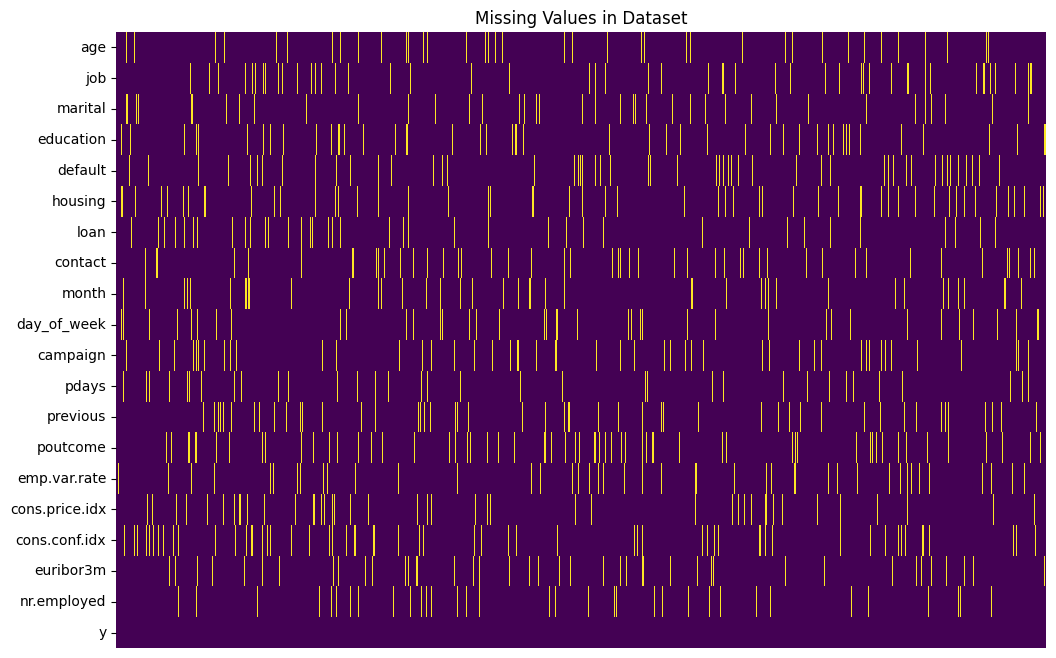

In [4464]:
# Visualize missing values as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull().T, cbar=False, cmap='viridis', xticklabels=False, yticklabels=True)
plt.title('Missing Values in Dataset')
plt.show()

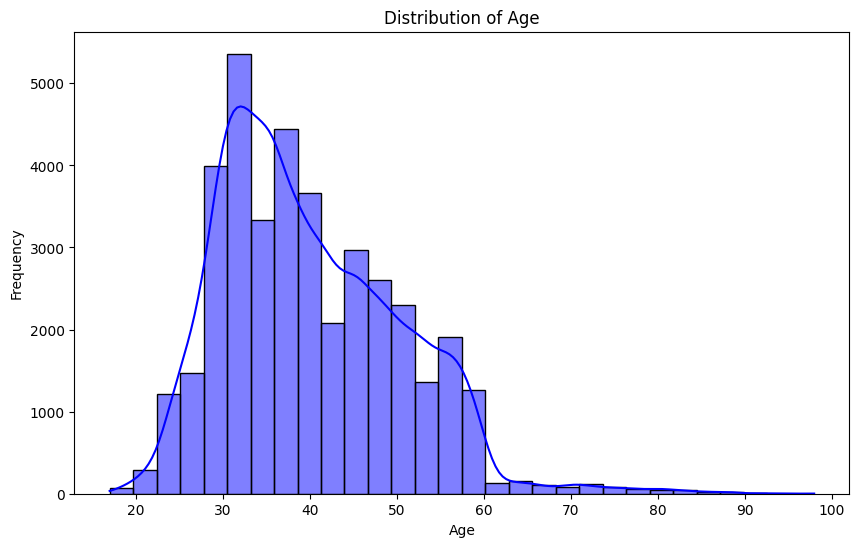

In [4465]:
# Plot distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


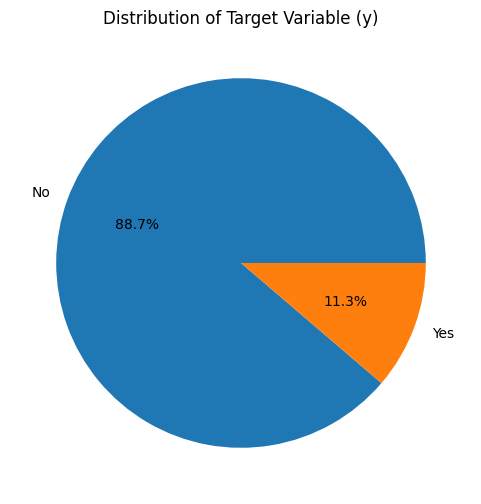

In [4466]:
# Plot distribution of Target Variable (y)
plt.figure(figsize=(6, 6))
df['y'].value_counts().plot.pie(autopct='%1.1f%%', labels=['No', 'Yes'])
plt.title('Distribution of Target Variable (y)')
plt.ylabel('')
plt.show()

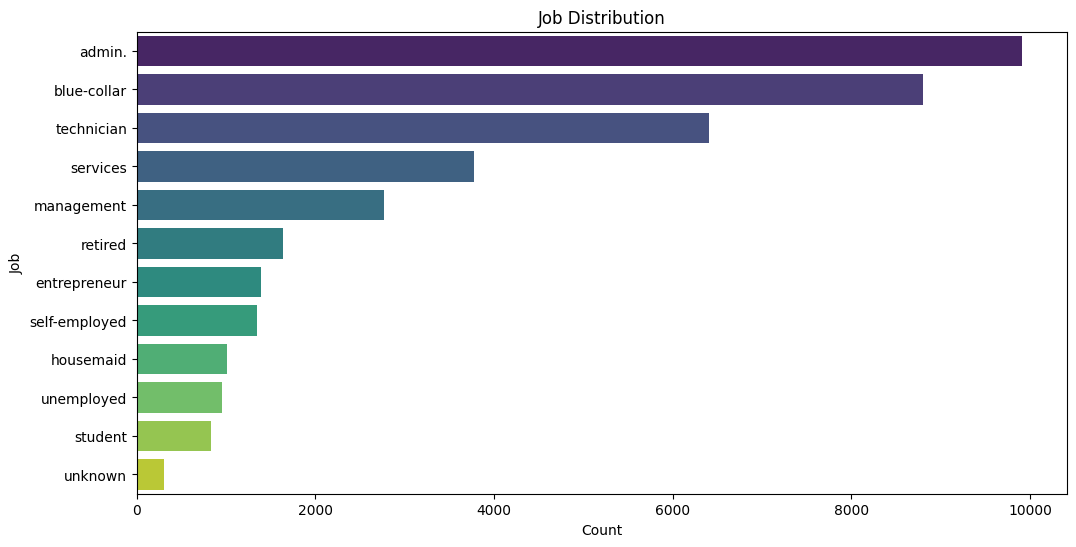

In [4467]:
# Plot job distribution 
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='job', order=df['job'].value_counts().index, palette='viridis')
plt.title('Job Distribution')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()


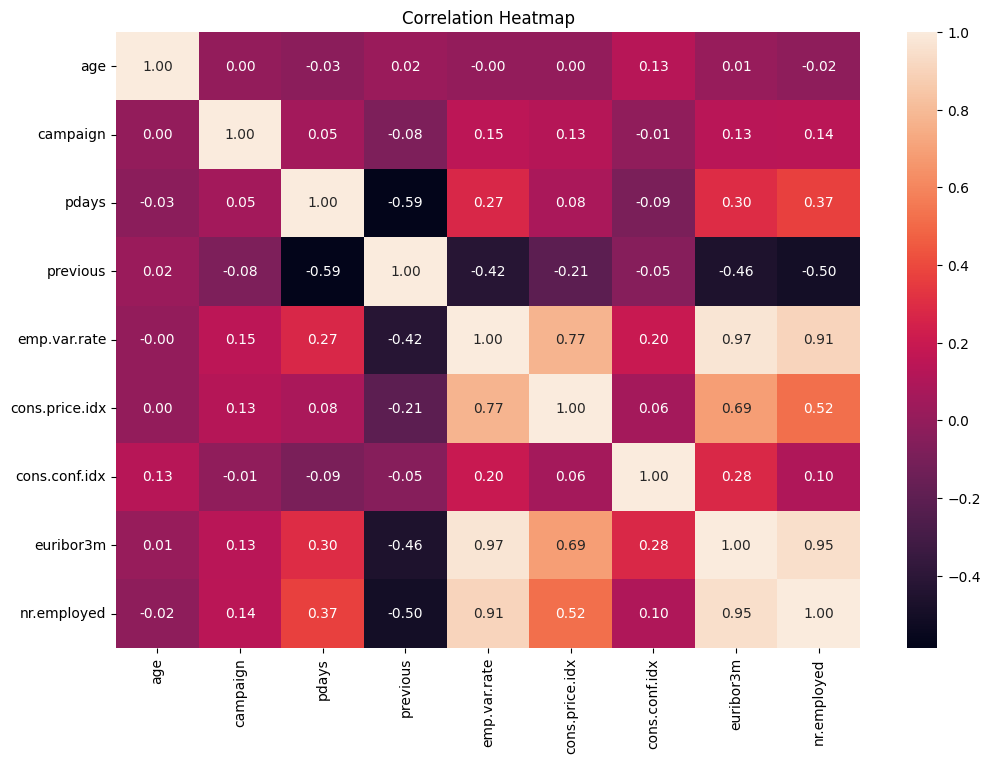

In [4468]:
# Correlation Heatmap for Numerical features
plt.figure(figsize=(12, 8))
numerical_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

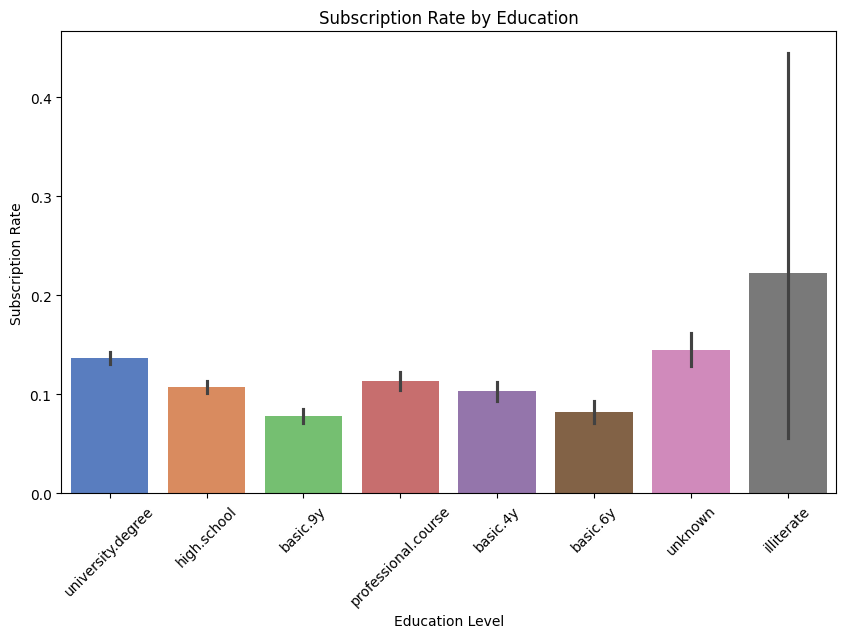

In [4469]:
# Plot the subscription rate by education Level
plt.figure(figsize=(10, 6))
education_order = df['education'].value_counts().index
sns.barplot(data=df, x='education', y=df['y'].apply(lambda x: 1 if x == 'yes' else 0), order=education_order, palette='muted')
plt.title('Subscription Rate by Education')
plt.xlabel('Education Level')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)
plt.show()

# Dataset Preprocessing

Methodology:
- Rename columns
- Variable Encoding (Categorical Handling)
- Null Handling (Median, Mode, KNN, K-means and K-modes Imputations)
- Discretization and Outlier Handling (Numeric Handling)
- Duplicate Handling
- Convert Datatypes (float64 -> categorical)
- Feature selection ( Filter and Embedded methods )
- Resampling (Majority undersampling, minority oversamplimg)
- Normalize / Scalers __(Used in pipeline in 'Model Training and Evaluation' Section)__

### __Rename Columns__

Renaming the columns into something more descriptive of what they represent for easier readability later on

In [4470]:
# Renaming columns for better readability
df.rename(columns={
    'age': 'Age',
    'job': 'Job_Type',
    'marital': 'Marital',
    'education': 'Education',
    'default': 'Default',
    'housing': 'Housing_Loan',
    'loan': 'Personal_Loan',
    'contact': 'Contact_Type',
    'month': 'Last_Contact_Month',
    'day_of_week': 'Last_Contact_Day',
    'campaign': 'Campaign_Contacts',
    'pdays': 'Days_Since_Prev_Contact',
    'previous': 'Prev_Contacts',
    'poutcome': 'Prev_Campaign_Outcome',
    'emp.var.rate': 'Employment_Var_Rate',
    'cons.price.idx': 'Consumer_Price_Index',
    'cons.conf.idx': 'Consumer_Confidence_Index',
    'euribor3m': 'Euribor_3M_Rate',
    'nr.employed': 'Num_Employees',
    'y': 'y'
}, inplace=True)

In [4471]:
# Print renamed columns
print(df.columns)

Index(['Age', 'Job_Type', 'Marital', 'Education', 'Default', 'Housing_Loan',
       'Personal_Loan', 'Contact_Type', 'Last_Contact_Month',
       'Last_Contact_Day', 'Campaign_Contacts', 'Days_Since_Prev_Contact',
       'Prev_Contacts', 'Prev_Campaign_Outcome', 'Employment_Var_Rate',
       'Consumer_Price_Index', 'Consumer_Confidence_Index', 'Euribor_3M_Rate',
       'Num_Employees', 'y'],
      dtype='object')


### __Variable Encoding__ (Categorical Handling)

Encoding all categorical columns to streamline and simplify the process moving forward. We begin by first seperating the df into categorical and non-categorical columns.

In [4472]:
# Pick categorical columns
req_columns = ['object','category']
df_categorical = df.select_dtypes(include=req_columns)
df_non_categorical = df.select_dtypes(exclude=req_columns)

In [4473]:
# Check what are the categorical columns
df_categorical.columns

Index(['Job_Type', 'Marital', 'Education', 'Default', 'Housing_Loan',
       'Personal_Loan', 'Contact_Type', 'Last_Contact_Month',
       'Last_Contact_Day', 'Prev_Campaign_Outcome', 'y'],
      dtype='object')

Let's take a look at the unique values for each column

In [4474]:
# Print unique values per column
for i in range(df_categorical.shape[1]):
    print(f'{df_categorical.columns[i]}: {df_categorical[df_categorical.columns[i]].unique()}')

Job_Type: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' nan 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Marital: ['married' 'single' 'divorced' nan 'unknown']
Education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' nan 'university.degree' 'illiterate']
Default: ['no' 'unknown' nan 'yes']
Housing_Loan: ['no' 'yes' 'unknown' nan]
Personal_Loan: ['no' 'yes' nan 'unknown']
Contact_Type: ['telephone' nan 'cellular']
Last_Contact_Month: ['may' nan 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Last_Contact_Day: ['mon' nan 'tue' 'wed' 'thu' 'fri']
Prev_Campaign_Outcome: ['nonexistent' nan 'failure' 'success']
y: ['no' 'yes']


Encode every unique value of each categorical column stating from 0

In [4475]:
"""
Loop over each column. Get unique values for each column. 
Loop over each unique value and replace it with a number corresonding to its position. 
Repeat for each uniquer value.
"""
for column in df_categorical.columns:
    unique_values = df_categorical[column].unique()
    for j in range(len(unique_values)):
        if pd.isna(unique_values[j]):
            continue
        print(unique_values[j])
        df_categorical[column] = df_categorical[column].replace({unique_values[j]: j})
        print(column, df_categorical[column].unique()[j])
    df_categorical[column] = df_categorical[column].astype('object')

housemaid
Job_Type 0
services
Job_Type 1
admin.
Job_Type 2
blue-collar
Job_Type 3
technician
Job_Type 4
retired
Job_Type 6
management
Job_Type 7
unemployed
Job_Type 8
self-employed
Job_Type 9
unknown
Job_Type 10
entrepreneur
Job_Type 11
student
Job_Type 12.0
married
Marital 0
single
Marital 1
divorced
Marital 2
unknown
Marital 4.0
basic.4y
Education 0
high.school
Education 1
basic.6y
Education 2
basic.9y
Education 3
professional.course
Education 4
unknown
Education 5
university.degree
Education 7
illiterate
Education 8.0
no
Default 0
unknown
Default 1
yes
Default 3.0
no
Housing_Loan 0
yes
Housing_Loan 1
unknown
Housing_Loan 2.0
no
Personal_Loan 0
yes
Personal_Loan 1
unknown
Personal_Loan 3.0
telephone
Contact_Type 0
cellular
Contact_Type 2.0
may
Last_Contact_Month 0
jun
Last_Contact_Month 2
jul
Last_Contact_Month 3
aug
Last_Contact_Month 4
oct
Last_Contact_Month 5
nov
Last_Contact_Month 6
dec
Last_Contact_Month 7
mar
Last_Contact_Month 8
apr
Last_Contact_Month 9
sep
Last_Contact_Month 

In [4476]:
# Check for successfully encoding
for column in df_categorical.columns:
    print(f'{column}: {df_categorical[column].unique()}')

Job_Type: [0.0 1.0 2.0 3.0 4.0 nan 6.0 7.0 8.0 9.0 10.0 11.0 12.0]
Marital: [0.0 1.0 2.0 nan 4.0]
Education: [0.0 1.0 2.0 3.0 4.0 5.0 nan 7.0 8.0]
Default: [0.0 1.0 nan 3.0]
Housing_Loan: [0.0 1.0 2.0 nan]
Personal_Loan: [0.0 1.0 nan 3.0]
Contact_Type: [0.0 nan 2.0]
Last_Contact_Month: [0.0 nan 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0]
Last_Contact_Day: [0.0 nan 2.0 3.0 4.0 5.0]
Prev_Campaign_Outcome: [0.0 nan 2.0 3.0]
y: [0 1]


Lastly, we update the encoded_df with the encoded representations for each categorical column

In [4477]:
# uPDATE endcoded_Df for each categorical column
encoded_df = df.copy()
encoded_df[df_categorical.columns] = df_categorical
encoded_df[df_non_categorical.columns] = df_non_categorical

In [4478]:
print("After concatenation:", encoded_df.columns)

After concatenation: Index(['Age', 'Job_Type', 'Marital', 'Education', 'Default', 'Housing_Loan',
       'Personal_Loan', 'Contact_Type', 'Last_Contact_Month',
       'Last_Contact_Day', 'Campaign_Contacts', 'Days_Since_Prev_Contact',
       'Prev_Contacts', 'Prev_Campaign_Outcome', 'Employment_Var_Rate',
       'Consumer_Price_Index', 'Consumer_Confidence_Index', 'Euribor_3M_Rate',
       'Num_Employees', 'y'],
      dtype='object')


Minor manual change for the target column changing class '2' to '1' because it causes errors when plotting ROC curves later

In [4479]:
encoded_df['y'] = encoded_df['y'].replace({2:1})
encoded_df['y'].unique()

array([0, 1])

In [4480]:
encoded_df.head(25)


Age Job_Type Marital Education Default Housing_Loan Personal_Loan  \
0   56.0      0.0     0.0       0.0     0.0          0.0           0.0   
1   57.0      1.0     0.0       1.0     1.0          0.0           0.0   
2   37.0      1.0     0.0       1.0     0.0          1.0           0.0   
3   40.0      2.0     0.0       2.0     0.0          0.0           0.0   
4    NaN      1.0     0.0       1.0     0.0          0.0           1.0   
5   45.0      1.0     0.0       3.0     1.0          0.0           0.0   
6   59.0      2.0     0.0       4.0     0.0          0.0           0.0   
7   41.0      3.0     0.0       5.0     1.0          0.0           0.0   
8   24.0      4.0     1.0       4.0     0.0          1.0           0.0   
9   25.0      NaN     1.0       1.0     0.0          1.0           0.0   
10  41.0      3.0     0.0       5.0     1.0          0.0           0.0   
11  25.0      1.0     1.0       1.0     0.0          1.0           0.0   
12  29.0      3.0     1.0       1.0     0.0          0.0           1.0   
13   NaN      0.0     2.0       0.0     0.0          1.0           0.0   
14  35.0      3.0     0.0       NaN     0.0          1.0           0.0   
15  54.0      6.0     0.0       3.0     1.0          1.0           1.0   
16  35.0      3.0     0.0       NaN     0.0          1.0           0.0   
17  46.0      3.0     0.0       2.0     1.0          1.0           1.0   
18   NaN      3.0     0.0       3.0     0.0          1.0           1.0   
19  39.0      7.0     1.0       3.0     1.0          0.0           0.0   
20  30.0      8.0     0.0       1.0     0.0          0.0           0.0   
21  55.0      3.0     0.0       0.0     1.0          1.0           0.0   
22  55.0      6.0     1.0       1.0     NaN          1.0           0.0   
23  41.0      4.0     1.0       1.0     0.0          1.0           0.0   
24  37.0      2.0     0.0       1.0     0.0          1.0           0.0   

   Contact_Type Last_Contact_Month Last_Contact_Day  Campaign_Contacts  \
0           0.0                0.0              0.0                1.0   
1           0.0                0.0              0.0                1.0   
2           0.0                0.0              0.0                1.0   
3           0.0                0.0              0.0                1.0   
4           0.0                0.0              0.0                1.0   
5           0.0                NaN              0.0                1.0   
6           0.0                0.0              0.0                1.0   
7           0.0                0.0              0.0                1.0   
8           0.0                0.0              0.0                1.0   
9           NaN                0.0              0.0                1.0   
10          0.0                0.0              0.0                1.0   
11          0.0                0.0              0.0                1.0   
12          0.0                0.0              0.0                1.0   
13          0.0                0.0              0.0                1.0   
14          0.0                0.0              0.0                1.0   
15          0.0                0.0              0.0                1.0   
16          0.0                0.0              0.0                1.0   
17          0.0                0.0              0.0                1.0   
18          0.0                0.0              0.0                1.0   
19          0.0                NaN              0.0                1.0   
20          0.0                0.0              0.0                1.0   
21          NaN                0.0              NaN                1.0   
22          0.0                0.0              0.0                NaN   
23          0.0                0.0              0.0                1.0   
24          0.0                0.0              0.0                1.0   

    Days_Since_Prev_Contact  Prev_Contacts Prev_Campaign_Outcome  \
0                       NaN            0.0                   0.0   
1                  

### __Null Handling__

As seen earlier, there are plenty of nulls all across the columns. The way said nulls will be handled will depend on the the target class as well as the column datatype.

The staregy is as follows:
1. Divide the dataset into two subset, each representing the a class in the target (0 and 1)
2. Further divide each subset based on numerical and categorical columns

Since the minority class only represents 11% of the data, we employ the use of methods that are sensitive to preserve data integrity and avoid a case of overfitting.
1. For numerical columns:
    - KNN imputation
    - K-means clustering
    - Median imputation
2. For categorical columns:
    - Mode imputation
    - K-mode imputation

As for the majority class, since we are going to undersample it anyways, the way to deal with the nulls doesn't have to be as sophisticated. As such
1. For numerical columns:
    - Median imputation
    - Drop nulls
2. For categorical columns:
    - Mode imputation
    - K-mode imputation
    - Drop nulls

This will all be fed in a giant loop that tests and evaluates which combination of these methods yields the greatest results among all of these and automatically concatantes the resultant dataframe.

#### Initial Steps

In this section we perform the division of the datatsets and their respective columns.

In [4481]:
# Split dataframe into target classes 0 and 1
df_class_yes = encoded_df[encoded_df['y'] == 1]
df_class_no = encoded_df[encoded_df['y'] == 0]

In [4482]:
# Define columns by which the dataframe will be split next
num_cols = ['float64', 'int64']

In [4483]:
# Split dataframe of class 1 into numerical and categorical columns
numerical_columns_yes = df_class_yes.select_dtypes(include=num_cols).columns
categorical_columns_yes = df_class_yes.select_dtypes(exclude=num_cols).columns

In [4484]:
#  Split dataframe of class 0 into numerical and categorical columns
numerical_columns_no = df_class_no.select_dtypes(include=num_cols).columns
categorical_columns_no = df_class_no.select_dtypes(exclude=num_cols).columns

#### Numerical Imputation

In [4485]:
# =========== Method 1: KNN Imputation =========== 
def knn_imputation(df, numerical_columns):
    imputer = KNNImputer(n_neighbors=5)
    df[numerical_columns] = imputer.fit_transform(df[numerical_columns])
    return df

In [4486]:
# =========== Method 2: K-means Imputation ===========
def kmeans_imputation(df, numerical_columns):
    """
    Loop over each numerical column. Split the dataframe to get nonnull values and indices of null values.
    Apply K-means on nonnull values. Use the fitted K-means to predict for locations with null values.
    Lastly, update said location with the new imputed value.
    """
    for col in numerical_columns:
        non_null_values = df[[col]].dropna()
        null_indices = df[df[col].isnull()].index

        if not null_indices.empty:
            kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
            kmeans.fit(non_null_values)
            
            cluster_centers = kmeans.cluster_centers_.flatten()
            temp_fill = df.loc[null_indices, [col]].fillna(0)
            predicted_clusters = kmeans.predict(temp_fill)
            
            for i, index_loc in enumerate(null_indices):
                cluster_index = predicted_clusters[i]
                imputed_value = cluster_centers[cluster_index]
                df.loc[index_loc, col] = imputed_value

    return df

In [4487]:
# =========== Method 3: Meadian Imputation =========== 
def median_imputation(df, numerical_columns):
    for column in numerical_columns:
        df[column] = df[column].fillna(df[column].median())
    return df

#### Categorical Imputation

In [4488]:
# =========== Method 1: Mode Imputation =========== 
def mode_imputation(df, categorical_columns):
    for column in categorical_columns:
        df[column] = df[column].fillna(df[column].mode()[0])
    return df

In [4489]:
# =========== Method 2: K-modes Imputation ===========
def kmodes_imputation(df, categorical_columns):
    """
    Loop over each numerical column. Split the dataframe to get nonnull values and indices of null values.
    Apply K-modes on nonnull values. Use the fitted K-modes to predict for locations with null values.
    Lastly, update said location with the new imputed value.
    """
    for col in categorical_columns:
        non_null_values = df[[col]].dropna()
        null_indices = df[df[col].isnull()].index

        if not null_indices.empty:
            kmodes = KModes(n_clusters=2, init='Huang', n_init=5, verbose=0)
            kmodes.fit(non_null_values)
            
            temp_fill = df.loc[null_indices, [col]].fillna(df[col].mode()[0])
            predicted_clusters = kmodes.predict(temp_fill)
            
            for i, index_loc in enumerate(null_indices):
                cluster_index = predicted_clusters[i]
                imputed_value = kmodes.cluster_centroids_[cluster_index, 0]
                df.loc[index_loc, col] = imputed_value

    return df

In [4490]:
# =========== Method 3: Drop Nulls =========== 
def drop_nulls(df, numerical_columns):
    df = df.dropna(subset=numerical_columns, axis=0)
    return df

#### Evaluation

Finally, we evaluate which method of handling nulls for the majority class yields the highest accuracy to proceed to the next step

In [4491]:
# Define the methods for each class and its respective column
numerical_imputations_class_0 = [
    ('Median', median_imputation),
    ('Dropped Nulls', drop_nulls)
]

categorical_imputations_class_0 = [
    ('Mode', mode_imputation),
    ('K-Modes', kmodes_imputation),
    ('Dropped Nulls', drop_nulls)
]

numerical_imputations_class_1 = [
    ('KNN', knn_imputation),
    ('KMeans', kmeans_imputation),
    ('Median', median_imputation)
]

categorical_imputations_class_1 = [
    ('Mode', mode_imputation),
    ('K-Modes', kmodes_imputation)
]

In [4492]:
# =========== Evaluate Imputation Method =========== 

accuracy_cleaned=0
df_null_handled = []
method_cleaned = ''

def evaluate_imputation(df_imputed, method):

    """
    Use Random Forest to quickly test for the accuracy of methods in handling the nulls.
    """

    global df_null_handled, accuracy_cleaned, method_cleaned
   
    x = df_imputed.drop(columns=['y'])
    y = df_imputed['y']
    

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    

    model = RandomForestClassifier(n_jobs=-1)
    model.fit(X_train, y_train)
    

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy for {method} imputation: {accuracy:.4f}")

    if (accuracy > accuracy_cleaned):
        df_null_handled = df_imputed
        accuracy_cleaned = accuracy
        method_cleaned = method

In [4493]:
# Loop over every method for every type of column for each of the target classes and evaluate it. Highest accuracy is saved to the 'df_null_handled' dataframe
for numerical_method_name_class_0, numerical_method in numerical_imputations_class_0:
    for categorical_method_name_class_0, categorical_method in categorical_imputations_class_0:
        
        df_class_no_copy = df_class_no.copy()
        df_class_no_numerical = numerical_method(df_class_no_copy, numerical_columns_no)
        df_class_no_imputed = categorical_method(df_class_no_numerical, categorical_columns_no)

        for numerical_method_name_class_1, numerical_method_yes in numerical_imputations_class_1:
            for categorical_method_name_class_1, categorical_method_yes in categorical_imputations_class_1:
                
                print(f"\nEvaluating combination:")
                print(f"  - Class 0: Numerical = {numerical_method_name_class_0}, Categorical = {categorical_method_name_class_0}")
                print(f"  - Class 1: Numerical = {numerical_method_name_class_1}, Categorical = {categorical_method_name_class_1}")
                
                df_class_yes_copy = df_class_yes.copy()
                df_class_yes_numerical = numerical_method_yes(df_class_yes_copy, numerical_columns_yes)
                df_class_yes_imputed = categorical_method_yes(df_class_yes_numerical, categorical_columns_yes)
                
                df_imputed = pd.concat([df_class_yes_imputed, df_class_no_imputed], axis=0)
                
                evaluate_imputation(
                    df_imputed, 
                    f"Class 0: {numerical_method_name_class_0} + {categorical_method_name_class_0} | Class 1: {numerical_method_name_class_1} + {categorical_method_name_class_1}"
                )

print(f"\nBest Accuracy: {accuracy_cleaned:.4f} for imputation: {method_cleaned}")


Evaluating combination:
  - Class 0: Numerical = Median, Categorical = Mode
  - Class 1: Numerical = KNN, Categorical = Mode
Accuracy for Class 0: Median + Mode | Class 1: KNN + Mode imputation: 0.8972

Evaluating combination:
  - Class 0: Numerical = Median, Categorical = Mode
  - Class 1: Numerical = KNN, Categorical = K-Modes
Accuracy for Class 0: Median + Mode | Class 1: KNN + K-Modes imputation: 0.8966

Evaluating combination:
  - Class 0: Numerical = Median, Categorical = Mode
  - Class 1: Numerical = KMeans, Categorical = Mode
Accuracy for Class 0: Median + Mode | Class 1: KMeans + Mode imputation: 0.9189

Evaluating combination:
  - Class 0: Numerical = Median, Categorical = Mode
  - Class 1: Numerical = KMeans, Categorical = K-Modes
Accuracy for Class 0: Median + Mode | Class 1: KMeans + K-Modes imputation: 0.9182

Evaluating combination:
  - Class 0: Numerical = Median, Categorical = Mode
  - Class 1: Numerical = Median, Categorical = Mode
Accuracy for Class 0: Median + Mode

In [4494]:
"""# Quick Filling ( best combination after testing )
df_class_no_copy = df_class_no.copy()
df_class_no_numerical = median_imputation(df_class_no_copy, numerical_columns_no)
df_class_no_imputed = kmodes_imputation(df_class_no_numerical, categorical_columns_no)

df_class_yes_copy = df_class_yes.copy()
df_class_yes_numerical = kmeans_imputation(df_class_yes_copy, numerical_columns_yes)
df_class_yes_imputed = mode_imputation(df_class_yes_numerical, categorical_columns_yes)

df_null_handled = pd.concat([df_class_yes_imputed, df_class_no_imputed], axis=0)"""

'# Quick Filling ( best combination after testing )\ndf_class_no_copy = df_class_no.copy()\ndf_class_no_numerical = median_imputation(df_class_no_copy, numerical_columns_no)\ndf_class_no_imputed = kmodes_imputation(df_class_no_numerical, categorical_columns_no)\n\ndf_class_yes_copy = df_class_yes.copy()\ndf_class_yes_numerical = kmeans_imputation(df_class_yes_copy, numerical_columns_yes)\ndf_class_yes_imputed = mode_imputation(df_class_yes_numerical, categorical_columns_yes)\n\ndf_null_handled = pd.concat([df_class_yes_imputed, df_class_no_imputed], axis=0)'

In [4495]:
print("Checking the total number of missing values after null-handling: ")
print(df_null_handled.isnull().sum().to_dict())

Checking the total number of missing values after null-handling: 
{'Age': 0, 'Job_Type': 0, 'Marital': 0, 'Education': 0, 'Default': 0, 'Housing_Loan': 0, 'Personal_Loan': 0, 'Contact_Type': 0, 'Last_Contact_Month': 0, 'Last_Contact_Day': 0, 'Campaign_Contacts': 0, 'Days_Since_Prev_Contact': 0, 'Prev_Contacts': 0, 'Prev_Campaign_Outcome': 0, 'Employment_Var_Rate': 0, 'Consumer_Price_Index': 0, 'Consumer_Confidence_Index': 0, 'Euribor_3M_Rate': 0, 'Num_Employees': 0, 'y': 0}


### __Discretization and Outlier Handling__ (Numeric Handling)

It's time to discretize some of our numerical columns to represent them in a more meaningful manner for our models. There are 9 Numerical columns in this dataset. Some of these are economic indicators such as: _Employment_Var_Rate, Consumer_Price_Index, Consumer_Confidence_Index and Euribor_3M_Rate._

As such, should remain continuous as their precise values are meaningful in a financial analysis context. Additionally, there _Num_Employees, Days_Since_Prev_Contact and Prev_Contacts_, but they too should be left alone as they already have a relatively fewer unique values and any further discretization would cause said features to lose too much information.

This leaves us with the following to be discretized:

- Age: it is more meaningful to group it into groups to reduce noise and improve representation.
- Campaign_Contacts: contacts could be grouped into meaningful ranges based on intensity.

In [4496]:
nunique_and_dtypes = pd.concat([df_null_handled.nunique(), df_null_handled.dtypes], axis=1)
nunique_and_dtypes.columns = ['unique values', 'data type']

print(nunique_and_dtypes)

                           unique values data type
Age                                   79   float64
Job_Type                              12    object
Marital                                4    object
Education                              8    object
Default                                3    object
Housing_Loan                           3    object
Personal_Loan                          3    object
Contact_Type                           2    object
Last_Contact_Month                    10    object
Last_Contact_Day                       5    object
Campaign_Contacts                     43   float64
Days_Since_Prev_Contact               28   float64
Prev_Contacts                          9   float64
Prev_Campaign_Outcome                  3    object
Employment_Var_Rate                   11   float64
Consumer_Price_Index                  27   float64
Consumer_Confidence_Index             27   float64
Euribor_3M_Rate                      317   float64
Num_Employees                  

In [4497]:
df_discretized = df_null_handled.copy()

#### Age

Let's first visualize what we have here

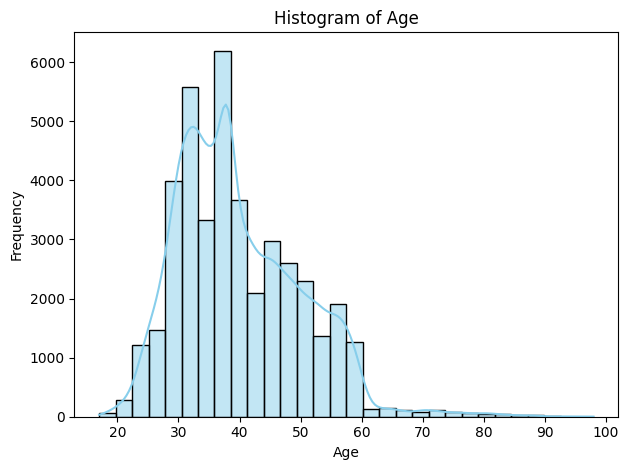

In [4498]:
# Plot Age Distribution
sns.histplot(df_discretized['Age'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

As we can see, there is a positive skew in our data. Discretizing this feature could help reduce the impact of the skewness as well as improve the representation of said feature for our model training later on.

In [4499]:
"""
- 0-24 years  -> Label: 0
- 25-34 years -> Label: 1
- 35-44 years -> Label: 2
- 45-54 years -> Label: 3
- 55-64 years -> Label: 4
- 65+ years   -> Label: 5
"""
# Age groups (tmm)
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = [0, 1, 2, 3, 4, 5]
df_discretized['Age'] = pd.cut(df_discretized['Age'], 
                            bins=age_bins, 
                            labels=age_labels, 
                            right=False)


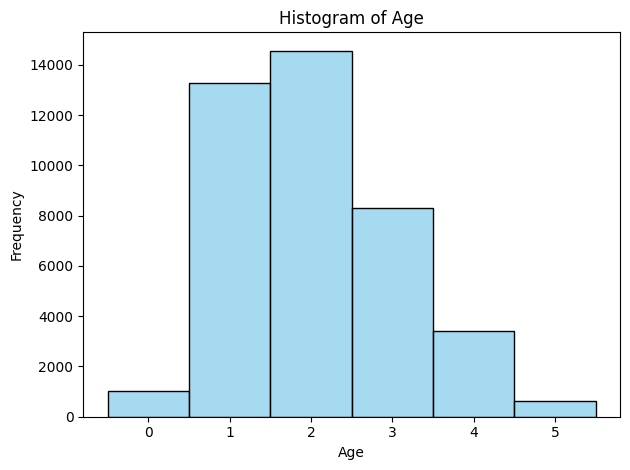

In [4500]:
# Plot Age Distribution (After Discretization)
sns.histplot(df_discretized['Age'], bins=30, kde=False, color='skyblue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Campaign Contacts

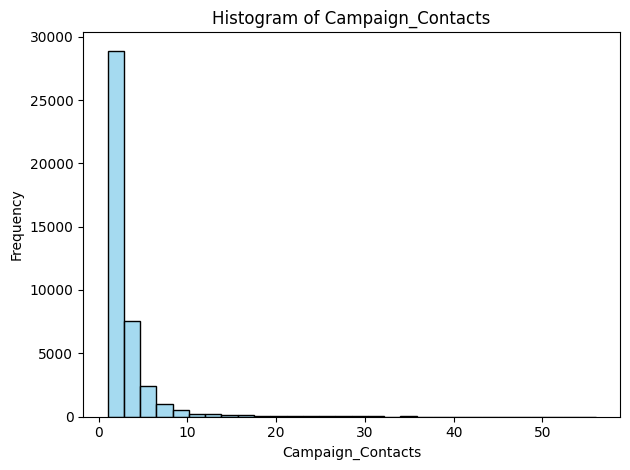

In [4501]:
# Plot Campaign_Contacts Distribution
sns.histplot(df_discretized['Campaign_Contacts'], bins=30, color='skyblue')
plt.title('Histogram of Campaign_Contacts')
plt.xlabel('Campaign_Contacts')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Seeing that the data has very high positive skew, we can try a multitude of ways to even the distribution.  Starting with normalization.

In [4502]:
df_test = df_discretized.copy()
c = df_test['Campaign_Contacts']
df_test['Normalized_Campaign_Contacts'] = (c - c.min()) / (c.max() - c.min())

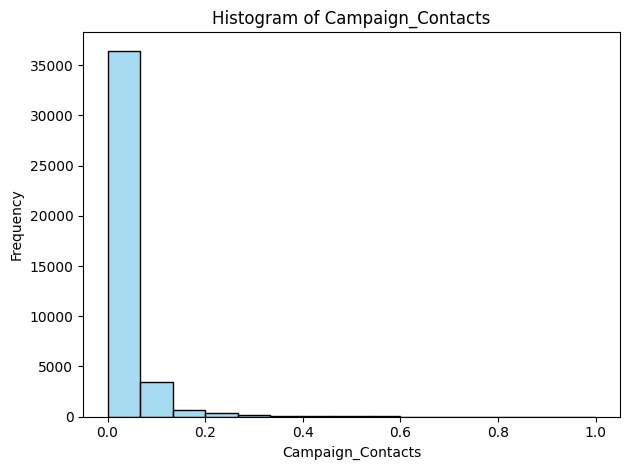

In [4503]:
# Plot Campaign_Contacts Distribution
sns.histplot(df_test['Normalized_Campaign_Contacts'], bins=15, color='skyblue')
plt.title('Histogram of Campaign_Contacts')
plt.xlabel('Campaign_Contacts')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

This made the skew even worse. Anothermethod we could try next is IQR for outlier handling.

In [4504]:
df_test = df_discretized.copy()
c = df_test['Campaign_Contacts']
Q1 = c.quantile(0.25)
Q3 = c.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df_test[(c >= lower_bound) & (c <= upper_bound)]



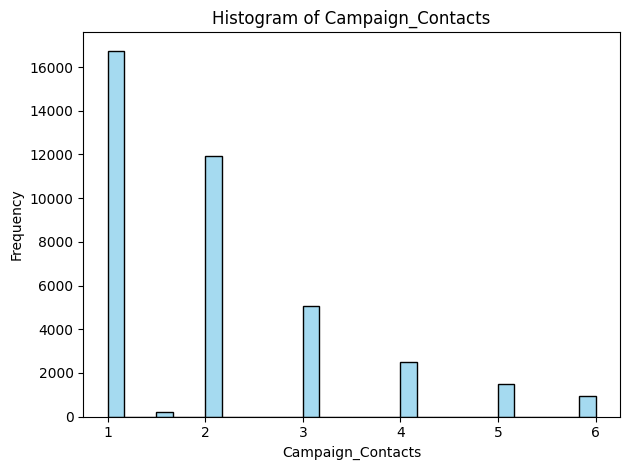

In [4505]:
# Plot Campaign_Contacts Distribution
sns.histplot(df_cleaned['Campaign_Contacts'], bins=30, color='skyblue')
plt.title('Histogram of Campaign_Contacts')
plt.xlabel('Campaign_Contacts')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [4506]:
"""
- 'Very Low (1-2)'  -> Label: 0
- 'Low (3-5)'       -> Label: 1
- 'Medium (6-10)'   -> Label: 2
- 'High (11-20)'    -> Label: 3
- 'Very High (20+)' -> Label: 4
"""

# Campaign contacts groups
campaign_bins = [0, 1, 2, 3, 5, 10, 15,20,30,40,60]
campaign_labels = [0, 1, 2, 3, 4, 5,6,7,8,9]
df_discretized['Campaign_Contacts'] = pd.cut(df_discretized['Campaign_Contacts'],
                                          bins=campaign_bins,
                                          labels=campaign_labels,
                                          right=False)


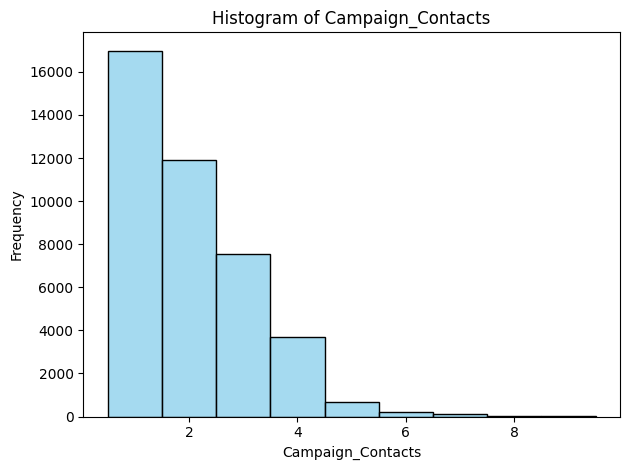

In [4507]:
# Plot Campaign_Contacts Distribution (After Discretization)
sns.histplot(df_discretized['Campaign_Contacts'], bins=30, color='skyblue')
plt.title('Histogram of Campaign_Contacts')
plt.xlabel('Campaign_Contacts')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### __Duplicate Handling__

Before proceeding to the next major steps, we should drop duplicates asthey pose a risk of overfitting in our data.

In [4508]:
df_cleaned = df_discretized.drop_duplicates()

In [4509]:
print(f"Number of rows after null and duplicate handling: {df_cleaned.shape[0]}")

Number of rows after null and duplicate handling: 38415


### __Convert Datatypes__

Quick conversions because the original datatypes causes errors for some models during training later on. Additionally, all columns must have their appropriate datatype to avoid mistaken one type with another during the __Resampling__ stage.

In [4510]:
object_columns = df_cleaned.select_dtypes(include=['object'])
df_cleaned[object_columns.columns] = object_columns.astype('category')

In [4511]:
df_cleaned['y'] = df_cleaned['y'].astype(int)

### __Feature Selection__

In this section we prepare the final dataset that will be used in out models by carefully selecting the appropriate features that best predict the outcome of a model without overfitting it.

To select our features we can try one of following strategies and their combined results and compare:
1. **Filter method:** Correlation-based Feature Selection (for numerical data)
2. **Filter method:** Chi-Squared Test (for categorical data)
3. **Embeded method:** Random Forest

#### __Filter Method__: Correlation-based Feature Selection (for numerical data)

For the filter-based methods, we split the feature selection to specifically deal with numerical data for Correlation-Based Feature Selection, while mainly utilizing Chi-Squared Test for categorical data. In this section, we specifically focus on columns with the highest correlations with several other columns and manually dropping them accordingly.

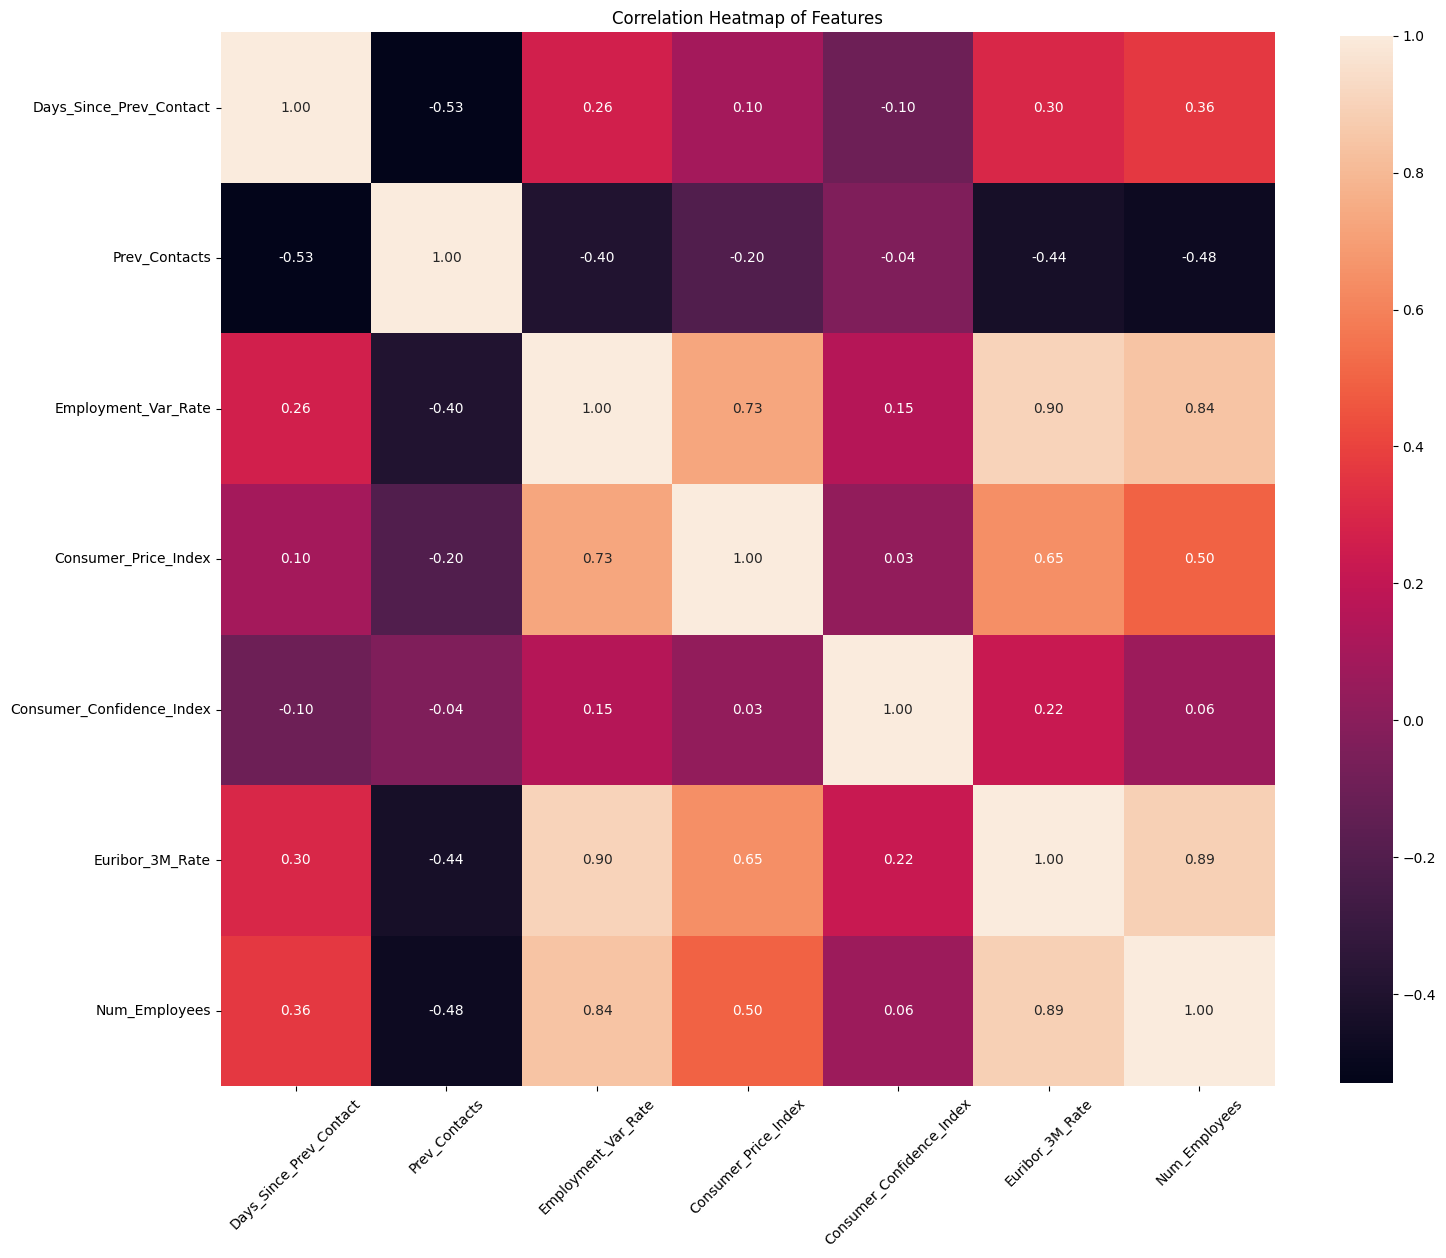

In [4512]:
# Calculate and visualize the correlation matrix
correlation_matrix = df_cleaned.select_dtypes(include=['float64']).corr()

plt.figure(figsize=(17, 17))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

From the heatmap, we can see that __'Num_Employees'__, __'Euribor_3M_Rate'__, and __'Employment_Var_Rate'__ tend to have the highest correlations with other columns with 'Num_Employees' having + correlation of 0.85 with 'Prev_Campaign_Outcome' and 0.92 with 'Euribor_3M_Rate'.
Additionally, 'Euribor_3M_Rate' has + correlation of 0.93 with 'Employment_Var_Rate' as well as 0.92 with 'Num_Employees'.
Lastly, 'Employment_Var_Rate' has + correlation of 0.70, 0.93, and 0.85 with 'Consumer_Price_Index',  'Euribor_3M_Rate', and 'Num_Employees' respectively.

As such, we drop said numerical columns.

In [4513]:
numerical_cols = df_cleaned.select_dtypes(include=['float64'])
numerical_features = numerical_cols.drop(['Num_Employees', 'Euribor_3M_Rate', 'Employment_Var_Rate'], axis=1)
numerical_features = numerical_features.columns.tolist()

#### __Filter Method__: Chi-Squared Test (for categorical data)

In [4514]:
# =========== Chi-Squared Feature Selection ===========

"""
The chi-squared test computes a measure of association between each feature and the target variable. 
It judges whether a given feature is independent of the target classes.

The chi-squared score informs how deviated the observed distribution of feature values from its expected distribution. 
The higher it is, the better it will be as a feature to predict.

The p-value indicates whether the relationship is statistically significant. Probability it is a coincedence.
"""
categorical_cols = df_cleaned.select_dtypes(exclude=['float64']).columns
categorical_df = df_cleaned[categorical_cols]

x = categorical_df.drop(columns=['y'])
y = categorical_df['y']
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(x, y)


SelectKBest(k='all', score_func=<function chi2 at 0x0000018A1DCCDA80>)

In [4515]:
# Get Chi-Squared scores and p-values
chi2_scores = chi2_selector.scores_
p_values = chi2_selector.pvalues_

chi2_results = pd.DataFrame({'Feature': x.columns, 'Chi2 Score': chi2_scores, 'P-Value': p_values})
chi2_results = chi2_results.sort_values(by='Chi2 Score', ascending=False)

print(chi2_results)

                  Feature   Chi2 Score        P-Value
11  Prev_Campaign_Outcome  4190.239362   0.000000e+00
8      Last_Contact_Month  3163.027378   0.000000e+00
7            Contact_Type   555.464173  8.153068e-123
4                 Default   333.337951   1.802138e-74
10      Campaign_Contacts   201.913258   7.985935e-46
1                Job_Type   201.117093   1.191408e-45
3               Education   173.515916   1.262700e-39
9        Last_Contact_Day    97.079555   6.659701e-23
2                 Marital    20.140516   7.195616e-06
6           Personal_Loan     7.172720   7.402046e-03
5            Housing_Loan     1.613314   2.040266e-01
0                     Age     0.483865   4.866769e-01


In [4516]:
# Select top k features
top_k = 20
categorical_features = chi2_results.head(top_k)['Feature'].values.tolist()
print(f"Final {top_k} Selected Features:\n", categorical_features)


Final 20 Selected Features:
 ['Prev_Campaign_Outcome', 'Last_Contact_Month', 'Contact_Type', 'Default', 'Campaign_Contacts', 'Job_Type', 'Education', 'Last_Contact_Day', 'Marital', 'Personal_Loan', 'Housing_Loan', 'Age']


In [4517]:
# Concatenate numerical and categorical features and remove duplicates
correlated_chi_features = numerical_features + categorical_features
correlated_chi_features = list(set(correlated_chi_features))
final_selected_df = df_cleaned[correlated_chi_features]

print(f"Selected Features: {correlated_chi_features}")


Selected Features: ['Education', 'Last_Contact_Month', 'Consumer_Confidence_Index', 'Contact_Type', 'Job_Type', 'Marital', 'Personal_Loan', 'Days_Since_Prev_Contact', 'Consumer_Price_Index', 'Age', 'Prev_Campaign_Outcome', 'Housing_Loan', 'Last_Contact_Day', 'Prev_Contacts', 'Default', 'Campaign_Contacts']


#### __Embeded Method__: Random Forest


In [4518]:
# =========== Random Forest Feature Selection ===========

x = df_cleaned.drop(columns=['y'])
y = df_cleaned['y']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [4519]:
# Get feature importances from Random Forest

feature_importances = model.feature_importances_
importances = pd.DataFrame({'Feature': x.columns, 'RF Importance': feature_importances})
importances = importances.sort_values(by='RF Importance', ascending=False)
print("Random Forest Feature Importances:\n", importances)

Random Forest Feature Importances:
                       Feature  RF Importance
17            Euribor_3M_Rate       0.166026
18              Num_Employees       0.088719
1                    Job_Type       0.084084
11    Days_Since_Prev_Contact       0.079084
3                   Education       0.065219
9            Last_Contact_Day       0.059629
16  Consumer_Confidence_Index       0.059165
0                         Age       0.058021
10          Campaign_Contacts       0.057127
15       Consumer_Price_Index       0.047342
14        Employment_Var_Rate       0.042177
2                     Marital       0.038213
5                Housing_Loan       0.034720
13      Prev_Campaign_Outcome       0.029309
8          Last_Contact_Month       0.023839
6               Personal_Loan       0.023323
12              Prev_Contacts       0.017485
7                Contact_Type       0.013944
4                     Default       0.012573


In [4520]:
# Select top k features
top_k = 17
top_rf_features = importances.head(top_k)['Feature'].values
print(f"Final {top_k} Selected Features:\n", top_rf_features)

Final 17 Selected Features:
 ['Euribor_3M_Rate' 'Num_Employees' 'Job_Type' 'Days_Since_Prev_Contact'
 'Education' 'Last_Contact_Day' 'Consumer_Confidence_Index' 'Age'
 'Campaign_Contacts' 'Consumer_Price_Index' 'Employment_Var_Rate'
 'Marital' 'Housing_Loan' 'Prev_Campaign_Outcome' 'Last_Contact_Month'
 'Personal_Loan' 'Prev_Contacts']


#### __Combined Features__

In [4521]:
# =========== Combine Common Features from All Methods ===========
common_features = set(correlated_chi_features) & set(top_rf_features)
print("Final Selected Common Features:\n", common_features)


Final Selected Common Features:
 {'Education', 'Last_Contact_Month', 'Consumer_Confidence_Index', 'Job_Type', 'Marital', 'Personal_Loan', 'Days_Since_Prev_Contact', 'Consumer_Price_Index', 'Age', 'Prev_Campaign_Outcome', 'Housing_Loan', 'Last_Contact_Day', 'Prev_Contacts', 'Campaign_Contacts'}


### __Resampling__

Now for the most crucial step for this dataset - resampling.
Since we only have 2 classes, we'll undersample the majority class and oversample the minority to halfway point of the dataset size to ensure equal representation during the trianing phases.


#### Undersampling only

In [4522]:
# =========== Undersampling Majority Class  =========== 

majority_class = df_cleaned[df_cleaned['y'] == 0]
minority_class = df_cleaned[df_cleaned['y'] == 1]

# Undersample majority class down exactly to minority class
undersample_size =  int(len(minority_class))
undersampled_majority_class = majority_class.sample(n=undersample_size, random_state=42)

undersampled_df = pd.concat([undersampled_majority_class, minority_class], ignore_index=True)


In [4523]:
# =========== Train/test split =========== 
x = undersampled_df.drop(columns=['y'])
y = undersampled_df['y']
x_train_undersampled, x_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)


#### Undersampling and SMOTENC Oversampling

In [4524]:
# =========== Undersampling Majority Class  =========== 

majority_class = df_cleaned[df_cleaned['y'] == 0]
minority_class = df_cleaned[df_cleaned['y'] == 1]

undersample_size =  int(len(minority_class) * 2)
undersampled_majority_class = majority_class.sample(n=undersample_size, random_state=42)

balanced_df = pd.concat([undersampled_majority_class, minority_class], ignore_index=True)


In [4525]:
print(f"Undersampled number of rows: {balanced_df.shape[0]}")

Undersampled number of rows: 13827


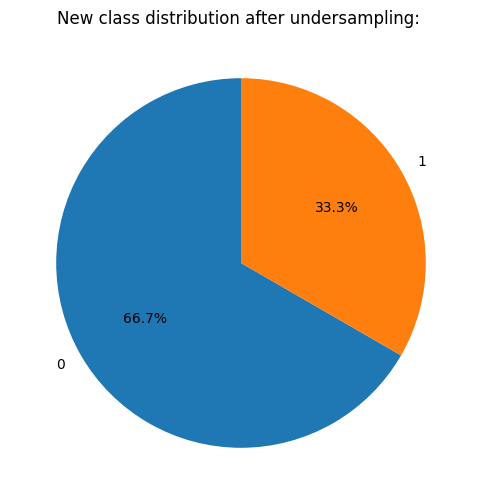

In [4526]:
# Plot updated class distribution
class_distribution = balanced_df['y'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title("New class distribution after undersampling: ")
plt.show()


In [4527]:
# =========== Train/test split =========== 
x = balanced_df.drop(columns=['y'])
y = balanced_df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [4528]:
print(x_train.shape)
print(y_train.shape)

(9678, 19)
(9678,)


In [4529]:
# =========== Oversampling Minority Classes  =========== 

"""
Originally, SMOTE was utilized for the oversampling process. However, two things became apparent:
    1. SMOTE works well with continous (numerical) classes only
    2. I forgot to check for the dtypes of my features, and might or might've not spent 2 days optimizing models on wrong synthetic data.

As a result, SMOTENC was used for its ability to deal with categorical features as well as numerical ones.
"""

# Extract the categorical indices from the dataframe
categorical_columns = x.select_dtypes(include=['object', 'category']).columns
indices = [x.columns.get_loc(col) for col in categorical_columns]

# Apply SMOTENC
smote_nc = SMOTENC(categorical_features=indices, random_state=42)
x_train_resampled, y_train_resampled = smote_nc.fit_resample(x_train, y_train)


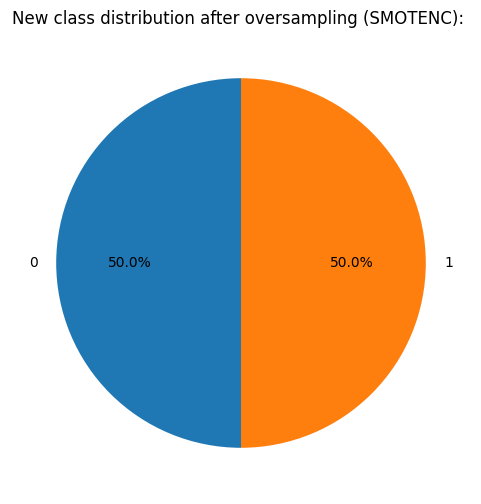

In [4530]:
# Plot updated class distribution
class_distribution = y_train_resampled.value_counts()

plt.figure(figsize=(6,6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title("New class distribution after oversampling (SMOTENC): ")
plt.show()


In [4531]:
print(f"Number of rows (After Resampling): {y_train_resampled.shape[0]}")

Number of rows (After Resampling): 12904


In [4532]:
print(x_train_resampled.shape)
print(y_train_resampled.shape)

(12904, 19)
(12904,)


#### Class Weights

Class weights will be defined in the comaprison section to have opposite ratios of the current imbalance of df_cleaned dataframe

In [4533]:
# =========== Train/test split =========== 
x = df_cleaned.drop(columns=['y'])
y = df_cleaned['y']
x_train_cw, x_test_cw, y_train_cw, y_test_cw = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)


#### Comparison

In [4534]:
# Plot Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, class_names=['Class 0', 'Class 1']):
    plt.figure(figsize=(10, 7))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

In [4535]:
# Plot ROC Curves
def plot_roc_curves(clfs, x_train, y_train, x_test, y_test):
    
    plt.figure(figsize=(8, 6))
    for j, clf in enumerate(clfs):
        clf.fit(x_train, y_train)
        
        # Get the ROC curve for the class 1
        fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(x_test)[:, 1])
        plt.plot(fpr, tpr, label=f'{j} (AUC = {auc(fpr, tpr):0.2f})')


    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.title('ROC Curve Comparison')
    plt.show()

In [4536]:
# Compare the approaches with a simple random forest model
comparison_models={}
def compare_methods(model_name, x_train, y_train, x_test, y_test):

    default_pipeline = Pipeline([
        ('model', RandomForestClassifier(n_jobs=-1, random_state=42))
        ])
    
    if model_name == "Class Weights":
        default_pipeline = Pipeline([
        ('model', RandomForestClassifier(n_jobs=-1, class_weight={0:1,1:9}))
        ])
        
    # Model Fitting
    default_pipeline.fit(x_train, y_train)
    # Evaluate Model
    y_pred = default_pipeline.predict(x_test)

    # Define metrics
    comparison_models[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1_score': f1_score(y_test, y_pred, average='weighted')
    }
    
    # Display Results
    print(f"Metrics for {model_name}:")
    for metric, value in comparison_models[model_name].items():
        print(f"{metric.capitalize()}: {value:.4f}")

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    print(f"Confusion Matrix: {model_name}")
    plot_confusion_matrix(y_test, y_pred)

    print(f"ROC Curves: {model_name}")
    plot_roc_curves(default_pipeline, x_train, y_train, x_test, y_test)
 
    

Metrics for Undersampling Only:
Accuracy: 0.7946
Precision: 0.7964
Recall: 0.7946
F1_score: 0.7943

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80      1383
           1       0.82      0.76      0.79      1383

    accuracy                           0.79      2766
   macro avg       0.80      0.79      0.79      2766
weighted avg       0.80      0.79      0.79      2766

Confusion Matrix: Undersampling Only


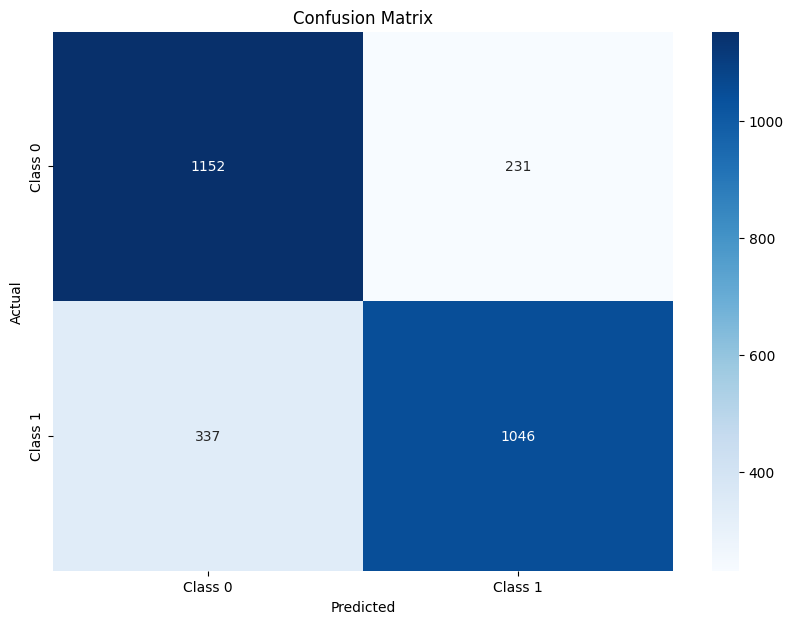

ROC Curves: Undersampling Only


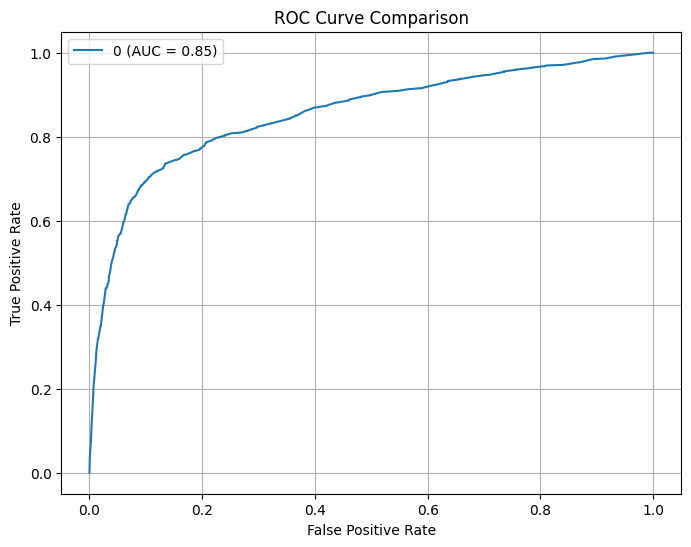

Metrics for Undersampling and SMOTENC Oversampling:
Accuracy: 0.8214
Precision: 0.8198
Recall: 0.8214
F1_score: 0.8204

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      2766
           1       0.74      0.71      0.73      1383

    accuracy                           0.82      4149
   macro avg       0.80      0.79      0.80      4149
weighted avg       0.82      0.82      0.82      4149

Confusion Matrix: Undersampling and SMOTENC Oversampling


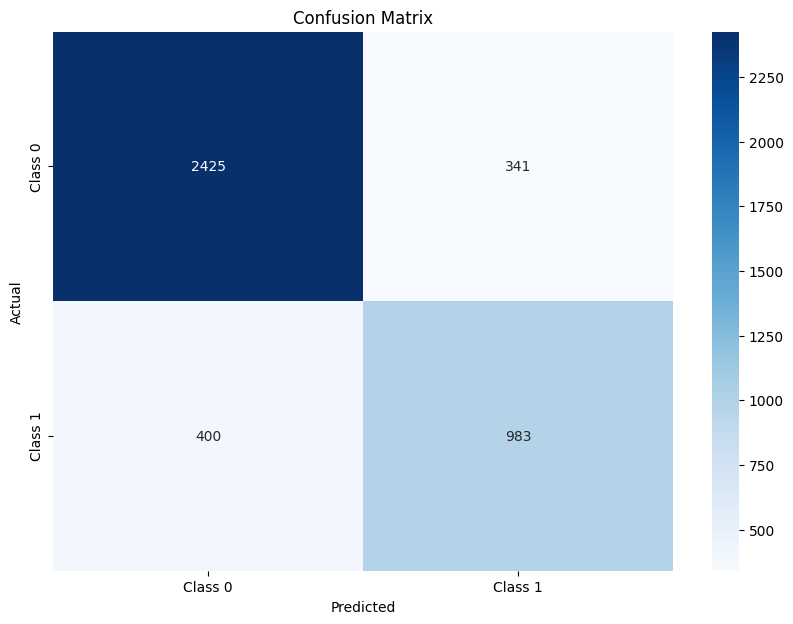

ROC Curves: Undersampling and SMOTENC Oversampling


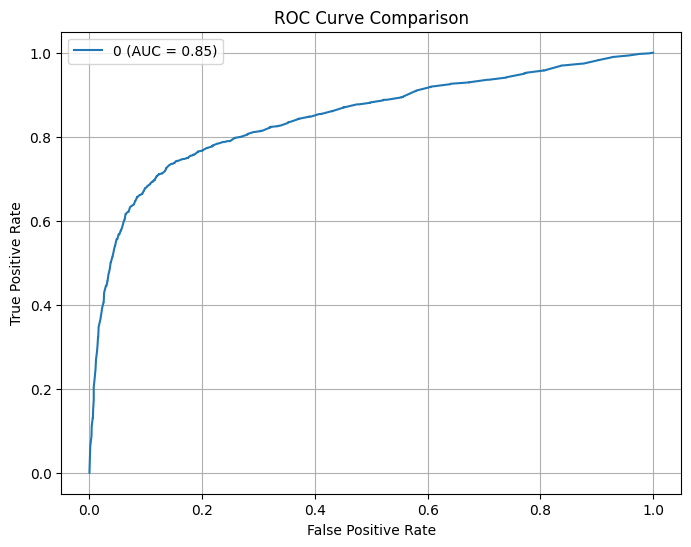

Metrics for Class Weights:
Accuracy: 0.9116
Precision: 0.9019
Recall: 0.9116
F1_score: 0.9029

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10142
           1       0.71      0.45      0.55      1383

    accuracy                           0.91     11525
   macro avg       0.82      0.71      0.75     11525
weighted avg       0.90      0.91      0.90     11525

Confusion Matrix: Class Weights


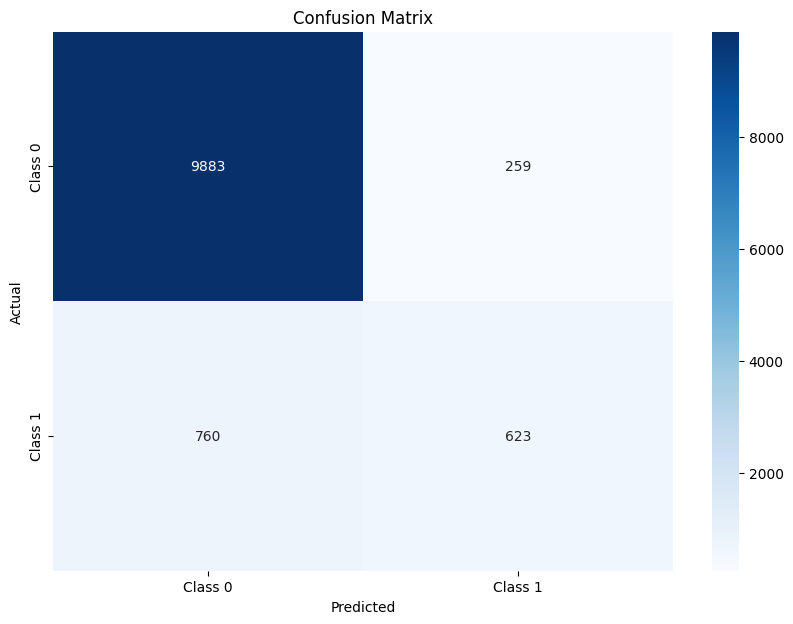

ROC Curves: Class Weights


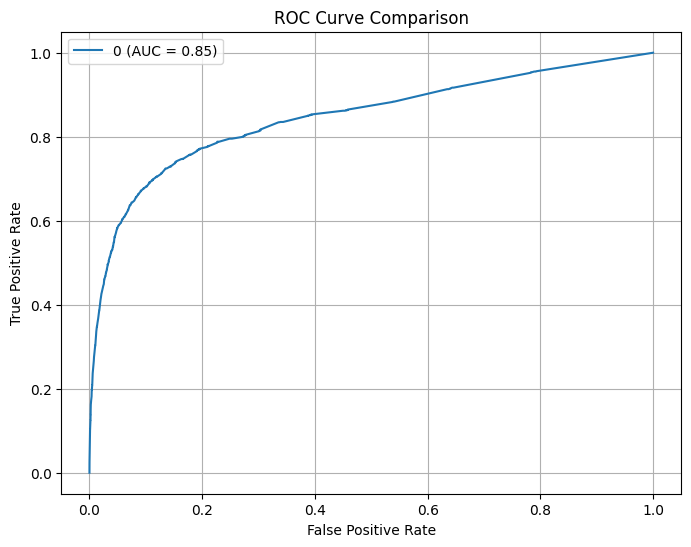

In [4537]:
compare_methods("Undersampling Only", x_train_undersampled, y_train_undersampled, x_test_undersampled, y_test_undersampled)
compare_methods("Undersampling and SMOTENC Oversampling", x_train_resampled, y_train_resampled, x_test, y_test)
compare_methods("Class Weights", x_train_cw, y_train_cw, x_test_cw, y_test_cw)

The metrics shown above offer mixed results. On one hand there is undersampling only, which offers a decent balance between both classes, however causes the majority class to lose a lot of information and thus result in a lower f1 score. Then there is class weights, which had reaaly high f1 score for the majority class, but doesn't seem to have influenced the minority class as it has a measle 0.55 accuracy. Lastly, there is the mixed approach. On one hand it retains some of the high f1 score for the majority class, on the other hand it has higher f1 score than the class weights approach, but not higher than the undersampling only approach. From this, one could conclude that, stability-wise, the mixed approach offers the best of both worlds, espcially considering that this data will be used against a variety of other models.

# Model Training and Evaluation

Since the domain of this dataset is a financial, the goal is to make the most of this data and provide the highest possible accuracy. And because accuracy as a metric tends to be misleading, the goal of this training is to **increase the f1 score** for classes 0 and 1, and more specifically try to make both values reach comparable levels.

Methodology:

- Implement 3 individuaL models (KNN, Decision Tree, Logistic Regression)

- Implement 3 ensemble models (Random Forest, LightGBM, XGBoost)

- Hyperparameter Tuning ( Perform random search for hyperparameter optimization )

- Display Learning Curve for each to illustrate bias/variance

- Generate 3 versions of each model to show performance change
    - Without feature selection and hyperparameters
    - Without feature selection, but with hyperparameters
    - With feature selection and Hyperparameters

- Evaluate performance: accuracy, precision, recall, F1-score, and ROC-AUC

- Confusion Matrix

### Helper Functions and Variables

In [4538]:
# Store metrics for each model as well as target name
models={}
target_name = 'y'
legend_dict = {
        'WHP': 'Without Feature Selection and Hyperparameters',
        'WFS': 'Without Feature Selection, With Hyperparameters',
        '_FS': 'With Feature Selection and Hyperparameters'
        }

In [4539]:
# Train/Test Split With Feature Selection
x_train_wfs =  x_train_resampled[list(common_features)]
x_test_wfs =  x_test[list(common_features)]

In [4540]:
# Plot learning curve
def plot_learning_curve(pipeline, x, y, title):
    # Using stratified k-fold to avoid errors when running logistic regression
    stratified_kfold = StratifiedKFold(n_splits=5)

    train_sizes, train_scores, test_scores = learning_curve(
        pipeline, x, y, cv=stratified_kfold, scoring='accuracy', n_jobs=-1,
        train_sizes=[0.2, 0.4, 0.6, 0.8, 1]
    )

    train_accuracy_mean = np.mean(train_scores, axis=1)
    test_accuracy_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_accuracy_mean, marker='o', linestyle='-', color='royalblue',
             linewidth=2, markersize=8, label='Training Accuracy')
    plt.plot(train_sizes, test_accuracy_mean, marker='s', linestyle='--', color='orange',
             linewidth=2, markersize=8, label='Validation Accuracy')

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Training Sizes', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [4541]:
# Print results and store metrics for each model in a dictionary for later comparison
def evaluate_model(model_name, y_test, y_pred,):
    # Define metrics
    models[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1_score': f1_score(y_test, y_pred, average='weighted')
    }
    
    # Display Results
    print(f"Metrics for {model_name}:")
    for metric, value in models[model_name].items():
        print(f"{metric.capitalize()}: {value:.4f}")

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [4542]:
# Plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, class_names=['Class 0', 'Class 1']):
    plt.figure(figsize=(10, 7))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

In [4543]:
# Plot ROC curves
def plot_roc_curves(clfs):
    
    plt.figure(figsize=(8, 6))
    for j, clf in enumerate(clfs):
        clf.fit(x_train_resampled, y_train_resampled)
        
        # Get the ROC curve for the class 1
        fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(x_test)[:, 1])
        plt.plot(fpr, tpr, label=f'{j}.{type(clf.named_steps['model']).__name__} (AUC = {auc(fpr, tpr):0.2f})')


    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.title('ROC Curve Comparison')


In [4544]:
# Conduct hyperparameter-tuning for each given param_dist and pipeline
def hyperparameter_tuning(pipeline, param_dist, X_train, y_train, 
                         n_iter=100, scoring='accuracy', cv=5, n_jobs=-1, random_state=42):

    random_search = RandomizedSearchCV(
        estimator=pipeline, 
        param_distributions=param_dist, 
        n_iter=n_iter, 
        scoring=scoring, 
        cv=cv, 
        n_jobs=n_jobs, 
        random_state=random_state
    )
    
    random_search.fit(X_train, y_train)
    
    best_params = random_search.best_params_
    print("Best Parameters:", best_params)
    
    return best_params, random_search

In [4545]:
# Generate abbreviation of each model name for plotting purposes
def model_abrev(model_name):
    pattern = r'[A-Z]'
    found_list = re.findall(pattern,model_name)
    return ''.join(found_list)

## Individual Model 1: KNN

### KNN ( Without Feature Selection and Hyperparameters)


In [4546]:
# Model Setup
default_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])
model_name = type(default_pipeline.named_steps['model']).__name__
model_abreviation = model_abrev(model_name=model_name)
legend_dict.setdefault(model_abreviation, model_name)
print(f"Model name: {model_name}.\nAbreviation: {model_abreviation}")

Model name: KNeighborsClassifier.
Abreviation: KNC


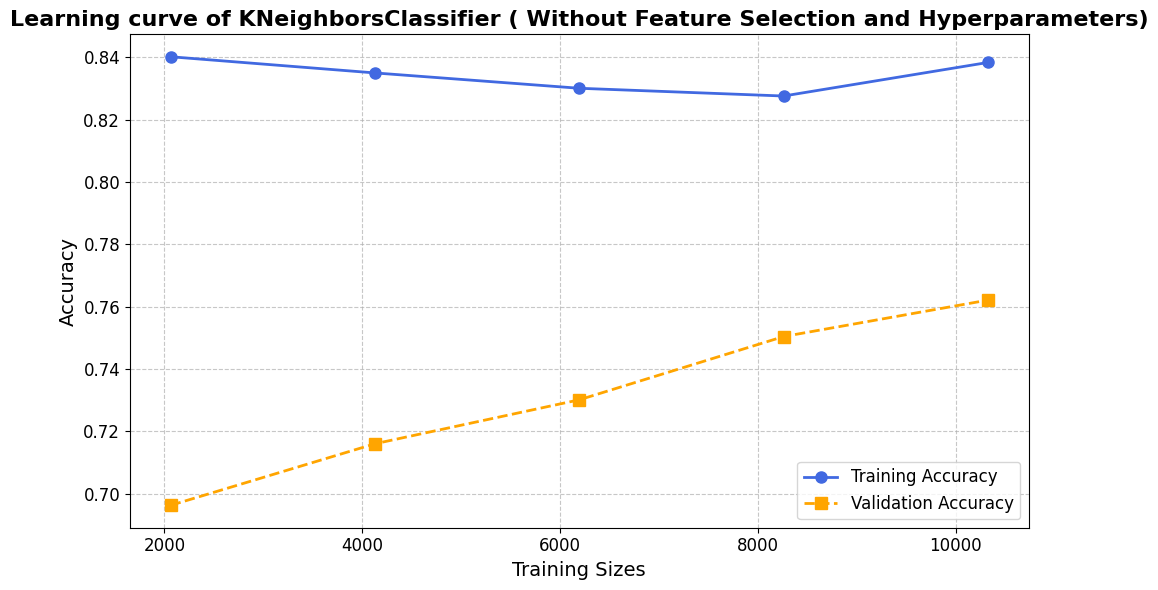

In [4547]:
# Learning Curve
plot_learning_curve(default_pipeline, x_train_resampled, y_train_resampled, title= f"Learning curve of {model_name} ( Without Feature Selection and Hyperparameters)")

In [4548]:
# Model Fitting
default_pipeline.fit(x_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())])

In [4549]:
# Evaluate Model
y_pred = default_pipeline.predict(x_test)
evaluate_model(f"{model_abreviation}_WFS_WHP", y_test,y_pred)

Metrics for KNC_WFS_WHP:
Accuracy: 0.7192
Precision: 0.7337
Recall: 0.7192
F1_score: 0.7241

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78      2766
           1       0.57      0.67      0.61      1383

    accuracy                           0.72      4149
   macro avg       0.69      0.71      0.70      4149
weighted avg       0.73      0.72      0.72      4149



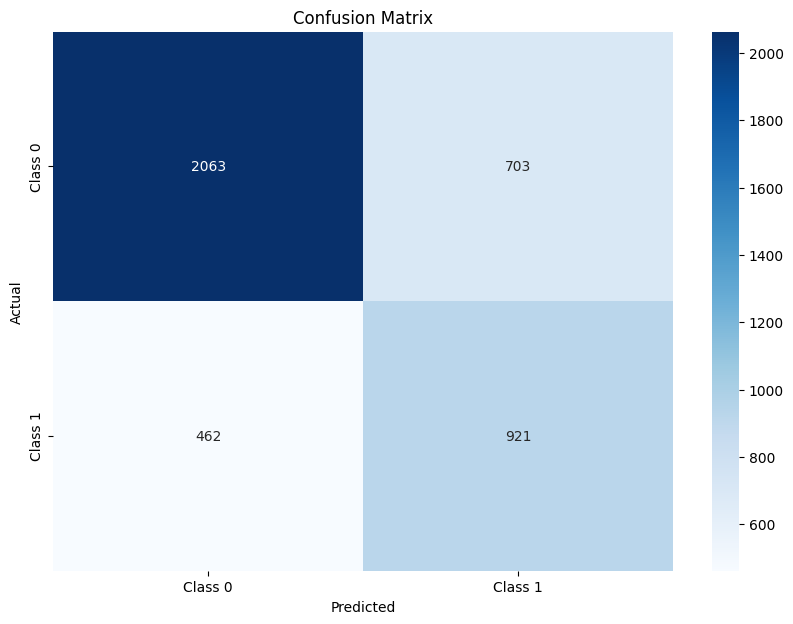

In [4550]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### KNN ( Without feature selection, but with hyperparameters )


In [4551]:
# Model Setup
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(
    weights='distance',
    p=1,
    n_neighbors=11,
    metric='manhattan',
    leaf_size=20,
    algorithm='ball_tree'
))
])
model_name = type(pipeline.named_steps['model']).__name__
model_abreviation = model_abrev(model_name=model_name)
legend_dict.setdefault(model_abreviation, model_name)
print(f"Model name: {model_name}.\nAbreviation: {model_abreviation}")

Model name: KNeighborsClassifier.
Abreviation: KNC


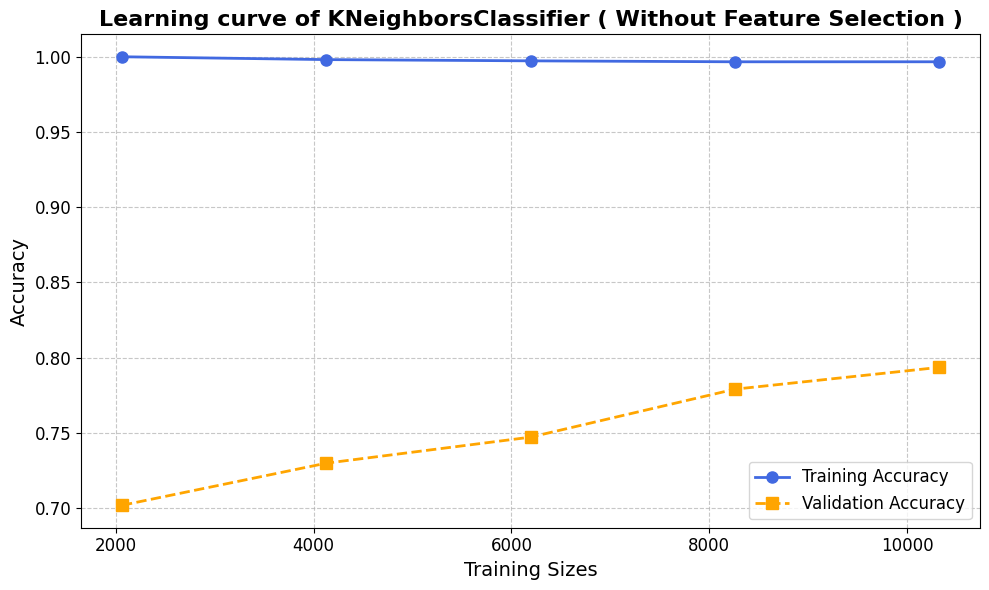

In [4552]:
# Learning Curve
plot_learning_curve(pipeline, x_train_resampled, y_train_resampled, title=f"Learning curve of {model_name} ( Without Feature Selection )")

In [4553]:
# Model Fitting
pipeline.fit(x_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', leaf_size=20,
                                      metric='manhattan', n_neighbors=11, p=1,
                                      weights='distance'))])

In [4554]:
"""# Hyperparameter Tuning

param_dist = {
    'model__n_neighbors': [3, 5, 7, 9, 11, 15, 20],
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'model__leaf_size': [10, 20, 30, 40, 50],
    'model__p': [1, 2, 3],
    'model__metric': ['minkowski', 'manhattan', 'euclidean', 'chebyshev']
}

best_params, search = hyperparameter_tuning(
    pipeline=default_pipeline, 
    param_dist=param_dist, 
    X_train=x_train_resampled,
    y_train= y_train_resampled,
    n_iter=100, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1, 
    random_state=42
)
"""

"# Hyperparameter Tuning\n\nparam_dist = {\n    'model__n_neighbors': [3, 5, 7, 9, 11, 15, 20],\n    'model__weights': ['uniform', 'distance'],\n    'model__algorithm': ['auto', 'ball_tree', 'kd_tree'],\n    'model__leaf_size': [10, 20, 30, 40, 50],\n    'model__p': [1, 2, 3],\n    'model__metric': ['minkowski', 'manhattan', 'euclidean', 'chebyshev']\n}\n\nbest_params, search = hyperparameter_tuning(\n    pipeline=default_pipeline, \n    param_dist=param_dist, \n    X_train=x_train_resampled,\n    y_train= y_train_resampled,\n    n_iter=100, \n    scoring='f1', \n    cv=5, \n    n_jobs=-1, \n    random_state=42\n)\n"

In [4555]:
# Evaluate Model
y_pred = pipeline.predict(x_test)
evaluate_model(f"{model_abreviation}_WFS", y_test,y_pred)

Metrics for KNC_WFS:
Accuracy: 0.7276
Precision: 0.7423
Recall: 0.7276
F1_score: 0.7324

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79      2766
           1       0.58      0.68      0.62      1383

    accuracy                           0.73      4149
   macro avg       0.70      0.72      0.71      4149
weighted avg       0.74      0.73      0.73      4149



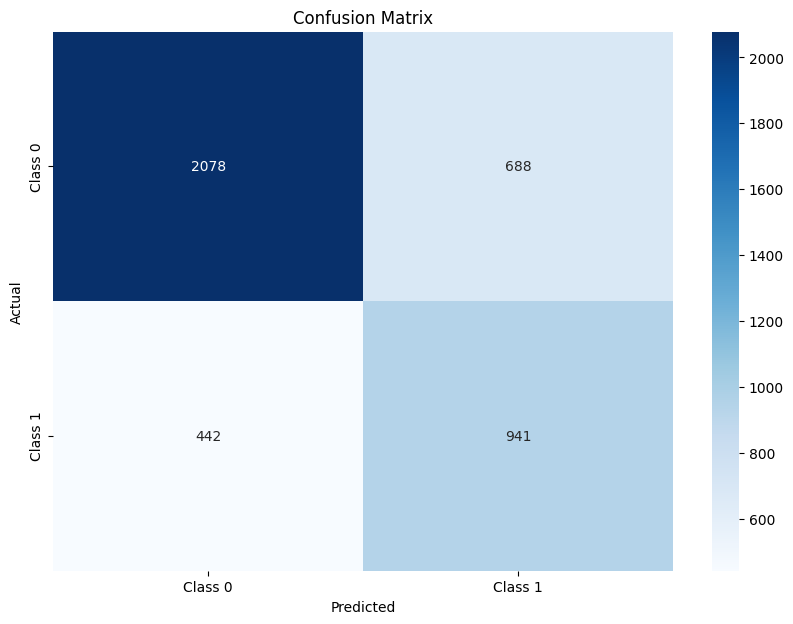

In [4556]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### KNN ( With feature selection and Hyperparameters )


In [4557]:
# Model Setup
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(
    weights='distance',
    p=1,
    n_neighbors=11,
    metric='manhattan',
    leaf_size=20,
    algorithm='ball_tree'
))
])
model_name = type(pipeline.named_steps['model']).__name__
model_abreviation = model_abrev(model_name=model_name)
legend_dict.setdefault(model_abreviation, model_name)
print(f"Model name: {model_name}.\nAbreviation: {model_abreviation}")

Model name: KNeighborsClassifier.
Abreviation: KNC


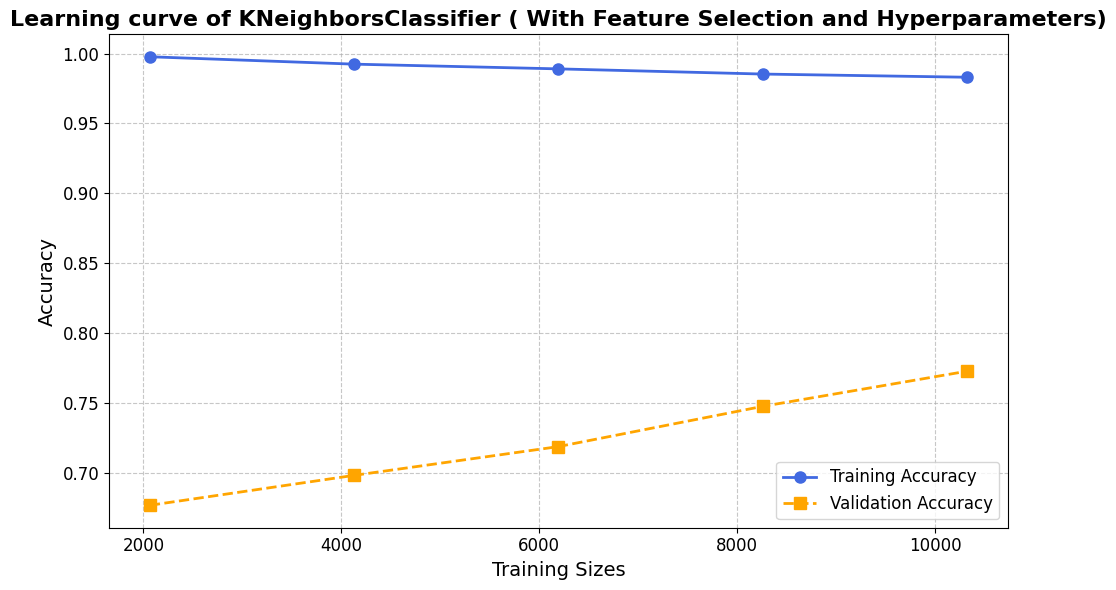

In [4558]:
# Learning Curve
plot_learning_curve(pipeline, x_train_wfs, y_train_resampled, title=f"Learning curve of {model_name} ( With Feature Selection and Hyperparameters)")

In [4559]:
# Model Fitting
pipeline.fit(x_train_wfs, y_train_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', leaf_size=20,
                                      metric='manhattan', n_neighbors=11, p=1,
                                      weights='distance'))])

In [4560]:
# Evaluate Model
y_pred = pipeline.predict(x_test_wfs)
evaluate_model(f"{model_abreviation}_FS", y_test,y_pred)

Metrics for KNC_FS:
Accuracy: 0.7166
Precision: 0.7219
Recall: 0.7166
F1_score: 0.7189

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78      2766
           1       0.57      0.61      0.59      1383

    accuracy                           0.72      4149
   macro avg       0.68      0.69      0.69      4149
weighted avg       0.72      0.72      0.72      4149



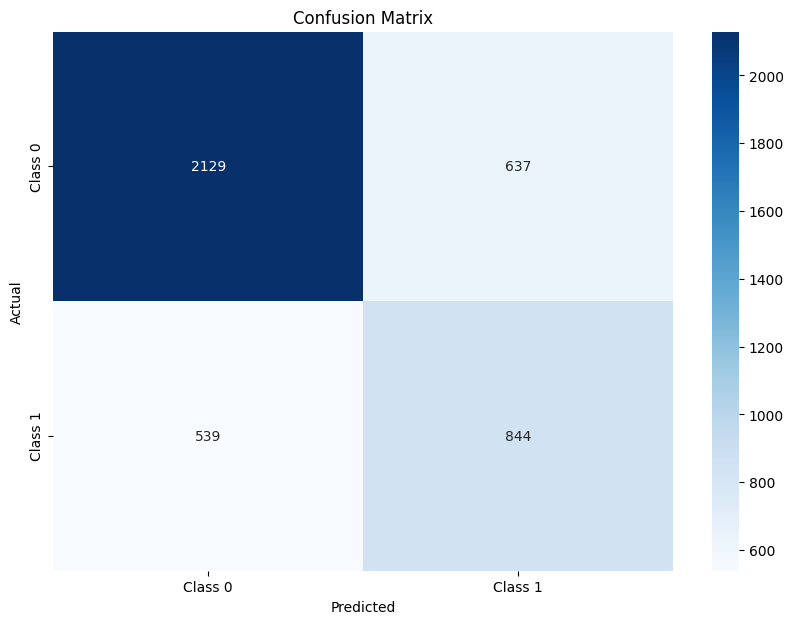

In [4561]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### KNN ROC Curves


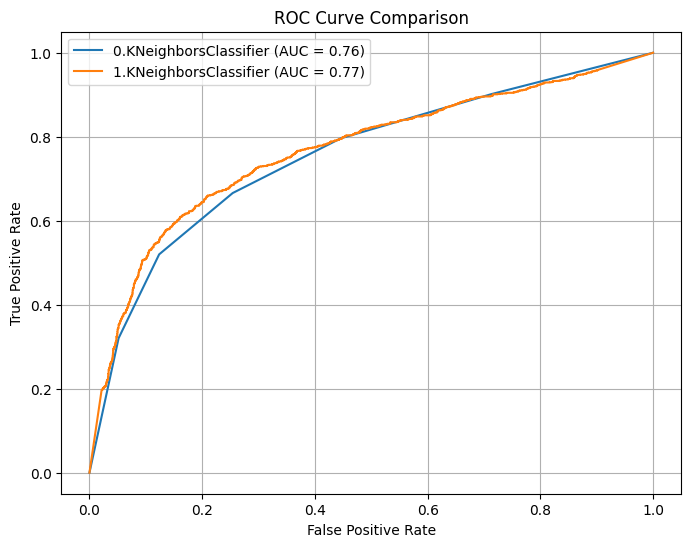

In [4562]:
# Plot ROC curves with and without hyperparameters
clfs = [
    default_pipeline,
    pipeline,
    ]
plot_roc_curves(clfs)


## Individual Model 2: DecisionTree

### Decision Tree ( Without Feature Selection and Hyperparameters)


In [4563]:
# Model Setup
default_pipeline = Pipeline([
    ('model', DecisionTreeClassifier())
])
model_name = type(default_pipeline.named_steps['model']).__name__
model_abreviation = model_abrev(model_name=model_name)
legend_dict.setdefault(model_abreviation, model_name)
print(f"Model name: {model_name}.\nAbreviation: {model_abreviation}")

Model name: DecisionTreeClassifier.
Abreviation: DTC


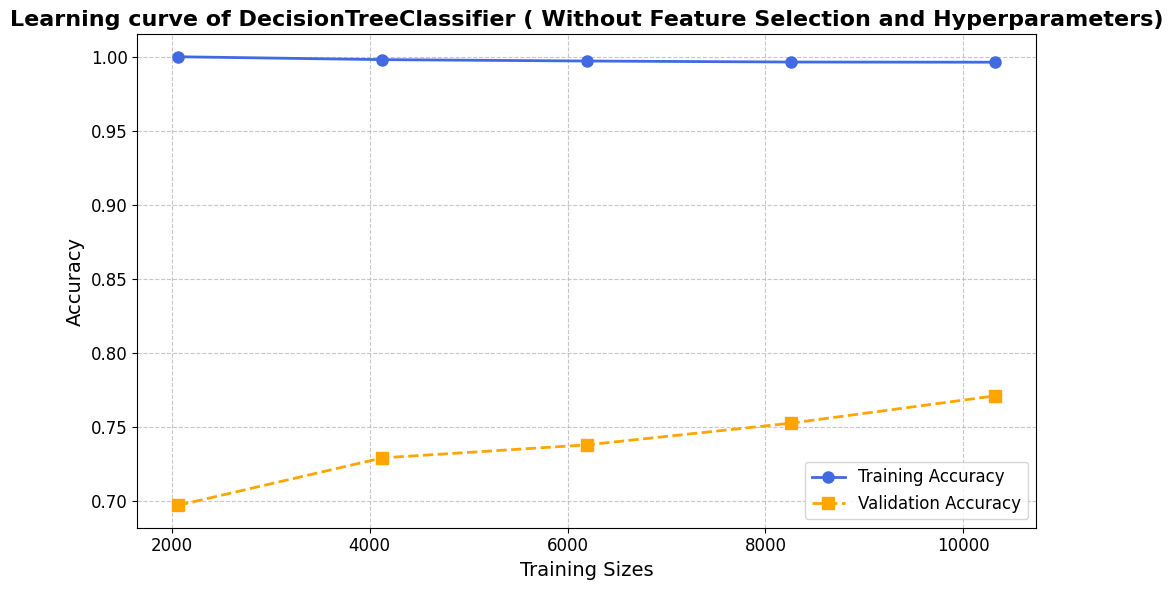

In [4564]:
# Learning Curve
plot_learning_curve(default_pipeline, x_train_resampled, y_train_resampled, title= f"Learning curve of {model_name} ( Without Feature Selection and Hyperparameters)")

In [4565]:
# Model Fitting
default_pipeline.fit(x_train_resampled, y_train_resampled)

Pipeline(steps=[('model', DecisionTreeClassifier())])

In [4566]:
# Evaluate Model
y_pred = default_pipeline.predict(x_test)
evaluate_model(f"{model_abreviation}_WFS_WHP", y_test,y_pred)

Metrics for DTC_WFS_WHP:
Accuracy: 0.7221
Precision: 0.7291
Recall: 0.7221
F1_score: 0.7249

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      2766
           1       0.58      0.63      0.60      1383

    accuracy                           0.72      4149
   macro avg       0.69      0.70      0.69      4149
weighted avg       0.73      0.72      0.72      4149



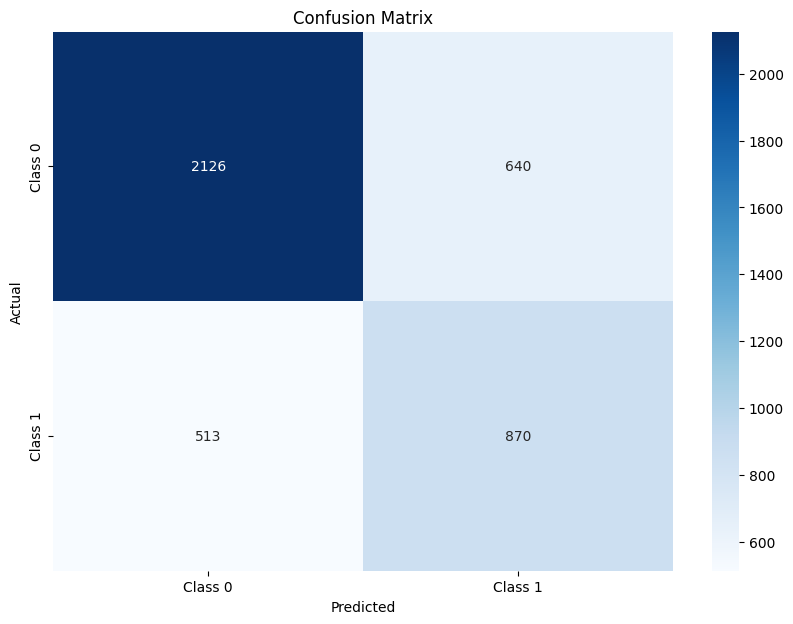

In [4567]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### Decision Tree ( Without feature selection, but with hyperparameters )


In [4568]:
# Model Setup
pipeline = Pipeline([
    ('model', DecisionTreeClassifier(
        random_state=42,
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=2,
        max_leaf_nodes=100,
        max_features='log2',
        ccp_alpha=0.0,
        class_weight='balanced'
    ))
])
model_name = type(pipeline.named_steps['model']).__name__
model_abreviation = model_abrev(model_name=model_name)
legend_dict.setdefault(model_abreviation, model_name)
print(f"Model name: {model_name}.\nAbreviation: {model_abreviation}")

Model name: DecisionTreeClassifier.
Abreviation: DTC


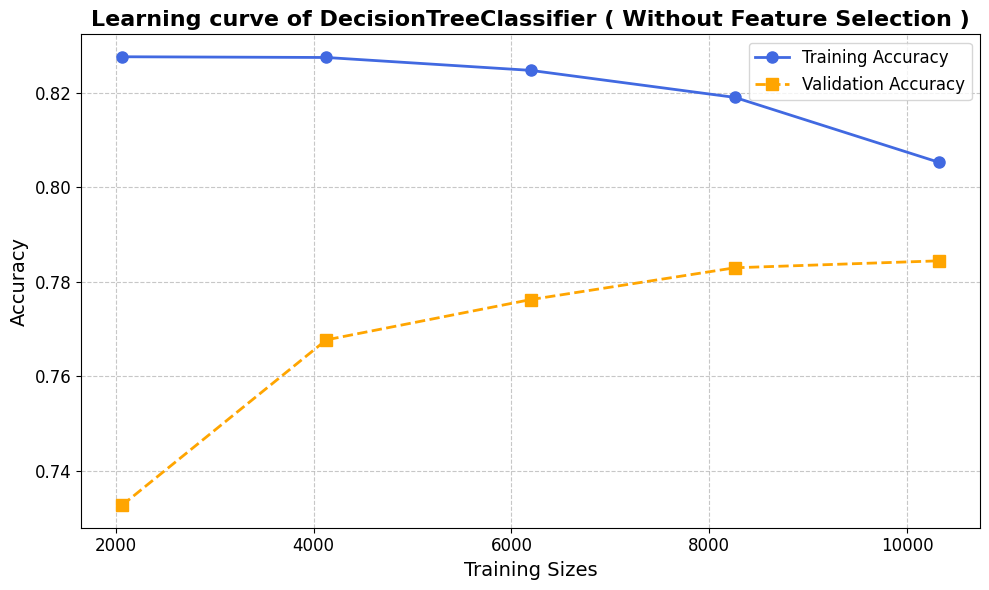

In [4569]:
# Learning Curve
plot_learning_curve(pipeline, x_train_resampled, y_train_resampled, title=f"Learning curve of {model_name} ( Without Feature Selection )")

In [4570]:
# Model Fitting
pipeline.fit(x_train_resampled, y_train_resampled)

Pipeline(steps=[('model',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                                        max_features='log2', max_leaf_nodes=100,
                                        min_samples_leaf=2,
                                        min_samples_split=10,
                                        random_state=42))])

In [4571]:
# Hyperparameter Tuning

param_dist = {
    'model__max_depth': [20, 30, 50], 
    'model__min_samples_split': [2, 5, 10, 20], 
    'model__min_samples_leaf': [1, 2, 5, 10], 
    'model__max_features': ['sqrt', 'log2'],
    'model__ccp_alpha': [0.0, 0.01, 0.05, 0.1],
    'model__max_leaf_nodes': [10, 20, 50, 100],
    'model__class_weight': ['balanced', None]  
}

best_params, search = hyperparameter_tuning(
    pipeline=default_pipeline, 
    param_dist=param_dist, 
    X_train=x_train_resampled,
    y_train= y_train_resampled,
    n_iter=100, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1, 
    random_state=42
)

Best Parameters: {'model__min_samples_split': 10, 'model__min_samples_leaf': 2, 'model__max_leaf_nodes': 100, 'model__max_features': 'log2', 'model__max_depth': 30, 'model__class_weight': 'balanced', 'model__ccp_alpha': 0.0}


In [4572]:
# Evaluate Model
y_pred = pipeline.predict(x_test)
evaluate_model(f"{model_abreviation}_WFS", y_test,y_pred)

Metrics for DTC_WFS:
Accuracy: 0.7975
Precision: 0.7961
Recall: 0.7975
F1_score: 0.7967

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      2766
           1       0.70      0.68      0.69      1383

    accuracy                           0.80      4149
   macro avg       0.77      0.77      0.77      4149
weighted avg       0.80      0.80      0.80      4149



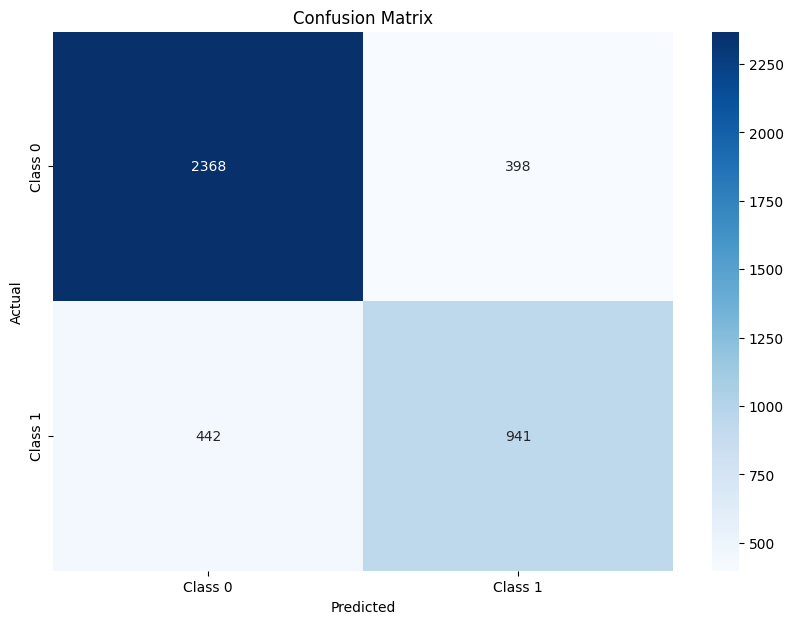

In [4573]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### Decision Tree ( With feature selection and Hyperparameters )


In [4574]:
# Model Setup
pipeline = Pipeline([
    ('model', DecisionTreeClassifier(
        random_state=42,
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=2,
        max_leaf_nodes=100,
        max_features='log2',
        ccp_alpha=0.0,
        class_weight='balanced'
    ))
])
model_name = type(pipeline.named_steps['model']).__name__
model_abreviation = model_abrev(model_name=model_name)
legend_dict.setdefault(model_abreviation, model_name)
print(f"Model name: {model_name}.\nAbreviation: {model_abreviation}")

Model name: DecisionTreeClassifier.
Abreviation: DTC


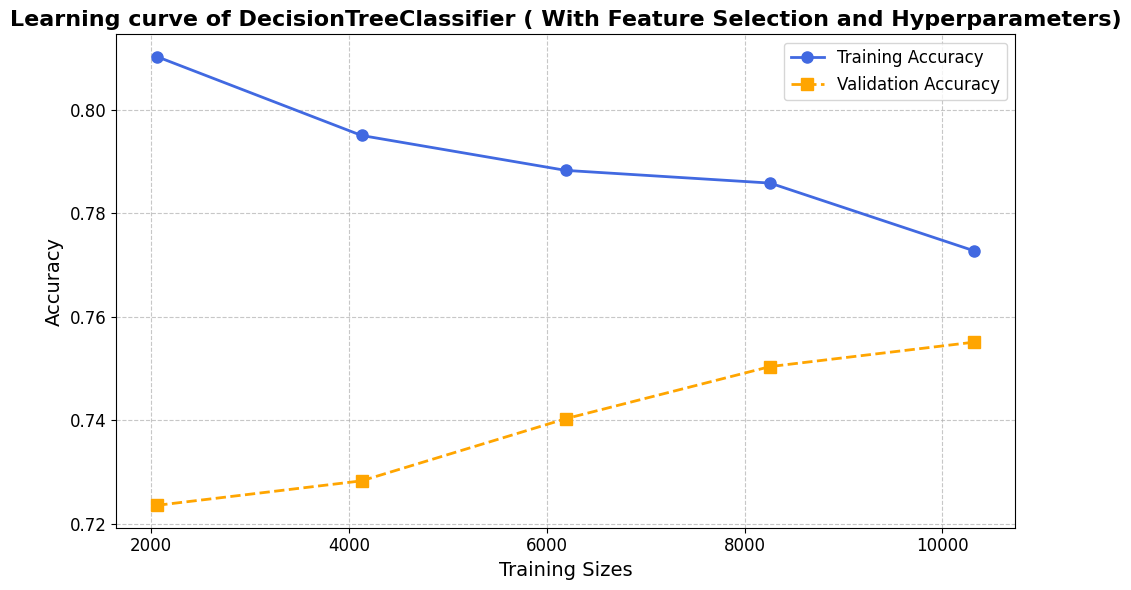

In [4575]:
# Learning Curve
plot_learning_curve(pipeline, x_train_wfs, y_train_resampled, title=f"Learning curve of {model_name} ( With Feature Selection and Hyperparameters)")

In [4576]:
# Model Fitting
pipeline.fit(x_train_wfs, y_train_resampled)

Pipeline(steps=[('model',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                                        max_features='log2', max_leaf_nodes=100,
                                        min_samples_leaf=2,
                                        min_samples_split=10,
                                        random_state=42))])

In [4577]:
# Evaluate Model
y_pred = pipeline.predict(x_test_wfs)
evaluate_model(f"{model_abreviation}_FS", y_test,y_pred)

Metrics for DTC_FS:
Accuracy: 0.7698
Precision: 0.7677
Recall: 0.7698
F1_score: 0.7686

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      2766
           1       0.66      0.63      0.65      1383

    accuracy                           0.77      4149
   macro avg       0.74      0.74      0.74      4149
weighted avg       0.77      0.77      0.77      4149



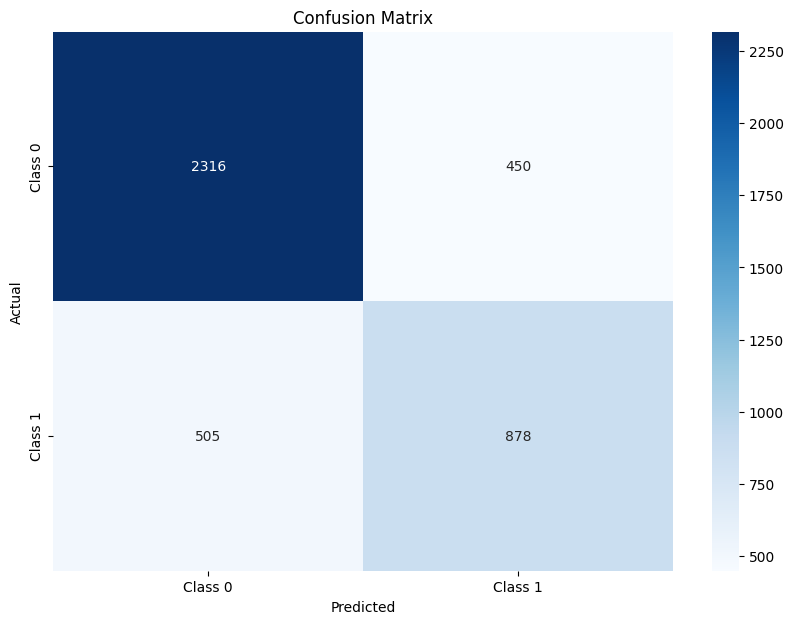

In [4578]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### Decision Tree ROC Curves


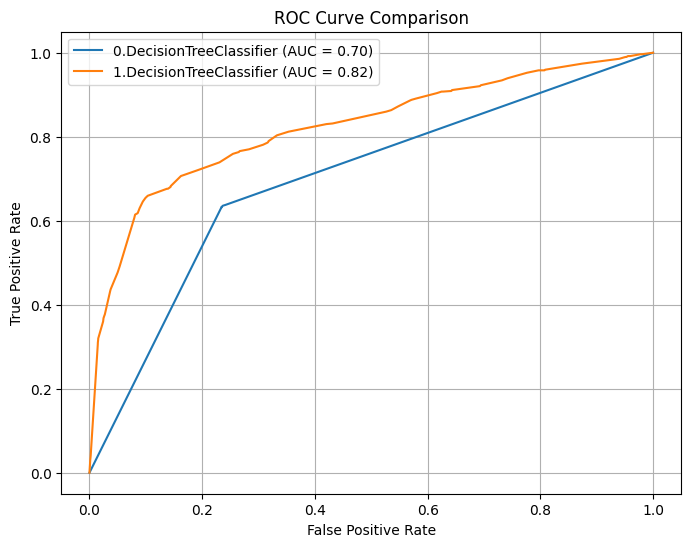

In [4579]:
# Plot ROC curves with and without hyperparameters
clfs = [
    default_pipeline,
    pipeline,
    ]
plot_roc_curves(clfs)

## Individual Model 3: Logistic Regression

### Logistic Regression ( Without Feature Selection and Hyperparameters)

In [4580]:
# Model Setup
default_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])
model_name = type(default_pipeline.named_steps['model']).__name__
model_abreviation = model_abrev(model_name=model_name)
legend_dict.setdefault(model_abreviation, model_name)
print(f"Model name: {model_name}.\nAbreviation: {model_abreviation}")

Model name: LogisticRegression.
Abreviation: LR


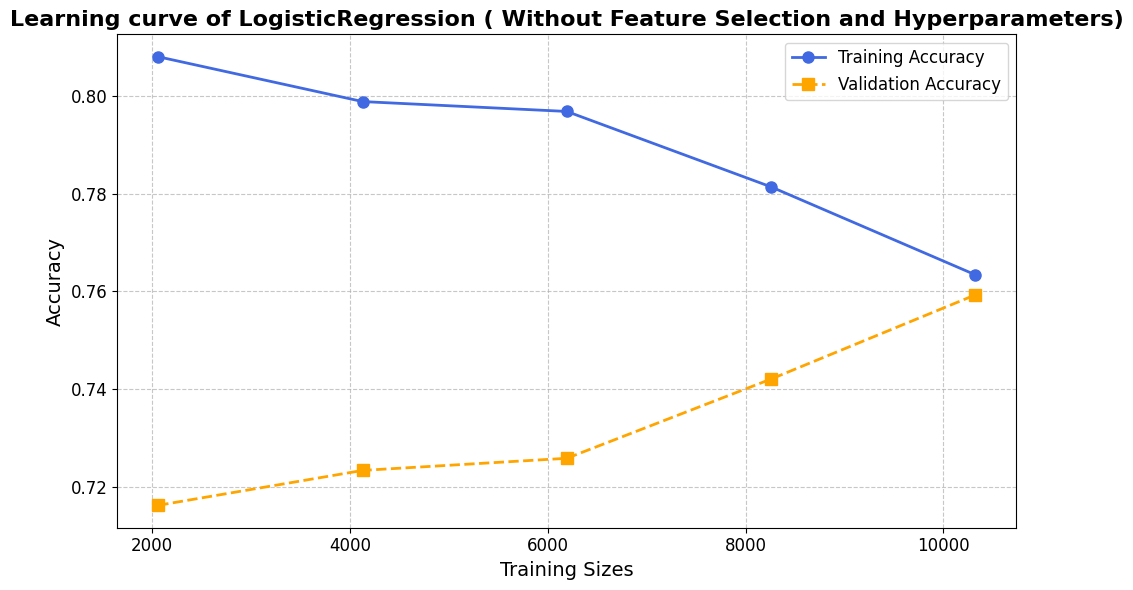

In [4581]:
# Learning Curve
plot_learning_curve(default_pipeline, x_train_resampled, y_train_resampled, title= f"Learning curve of {model_name} ( Without Feature Selection and Hyperparameters)")

In [4582]:
# Model Fitting
default_pipeline.fit(x_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [4583]:
# Evaluate Model
y_pred = default_pipeline.predict(x_test)
evaluate_model(f"{model_abreviation}_WFS_WHP", y_test,y_pred)

Metrics for LR_WFS_WHP:
Accuracy: 0.7790
Precision: 0.7811
Recall: 0.7790
F1_score: 0.7799

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      2766
           1       0.66      0.69      0.67      1383

    accuracy                           0.78      4149
   macro avg       0.75      0.76      0.75      4149
weighted avg       0.78      0.78      0.78      4149



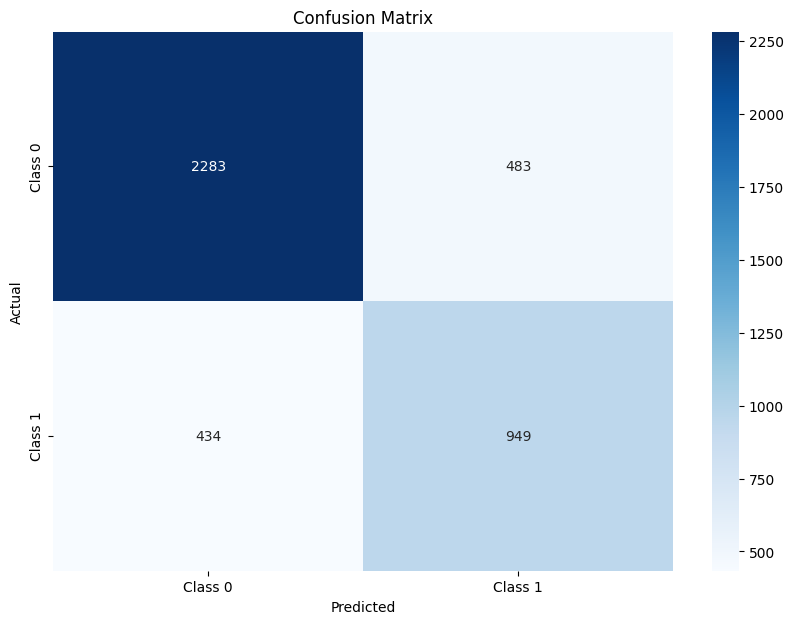

In [4584]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### Logistic Regression ( Without feature selection, but with hyperparameters )


In [4585]:
# Model Setup
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        solver='lbfgs', 
        penalty='l2',
        C=0.01,
        class_weight='balanced'
    ))
])

model_name = type(pipeline.named_steps['model']).__name__
model_abreviation = model_abrev(model_name=model_name)
legend_dict.setdefault(model_abreviation, model_name)
print(f"Model name: {model_name}.\nAbreviation: {model_abreviation}")

Model name: LogisticRegression.
Abreviation: LR


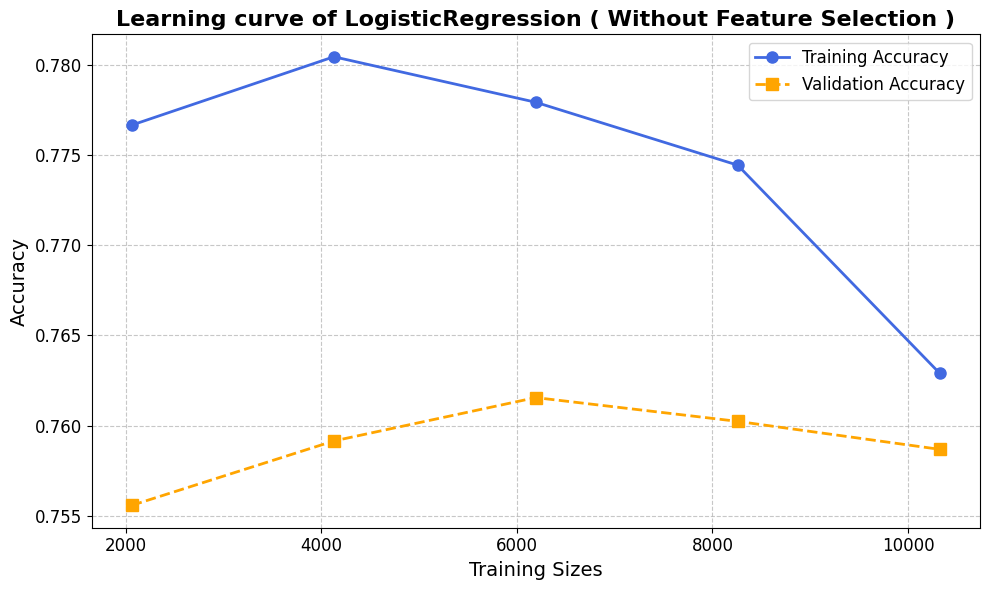

In [4586]:
# Learning Curve
plot_learning_curve(pipeline, x_train_resampled, y_train_resampled, title=f"Learning curve of {model_name} ( Without Feature Selection )")

In [4587]:
# Model Fitting
pipeline.fit(x_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(C=0.01, class_weight='balanced'))])

In [4588]:
# Hyperparameter Tuning

param_dist = {
    'model__solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg'],
    'model__penalty': ['l2', 'l1', 'none'],
    'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

best_params, search = hyperparameter_tuning(
    pipeline=default_pipeline, 
    param_dist=param_dist, 
    X_train=x_train_resampled,
    y_train= y_train_resampled,
    n_iter=300, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1, 
    random_state=42
)



Best Parameters: {'model__solver': 'saga', 'model__penalty': 'l1', 'model__C': 0.1}


In [4589]:
# Evaluate Model
y_pred = pipeline.predict(x_test)
evaluate_model(f"{model_abreviation}_WFS", y_test,y_pred)

Metrics for LR_WFS:
Accuracy: 0.7746
Precision: 0.7776
Recall: 0.7746
F1_score: 0.7759

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      2766
           1       0.65      0.69      0.67      1383

    accuracy                           0.77      4149
   macro avg       0.75      0.75      0.75      4149
weighted avg       0.78      0.77      0.78      4149



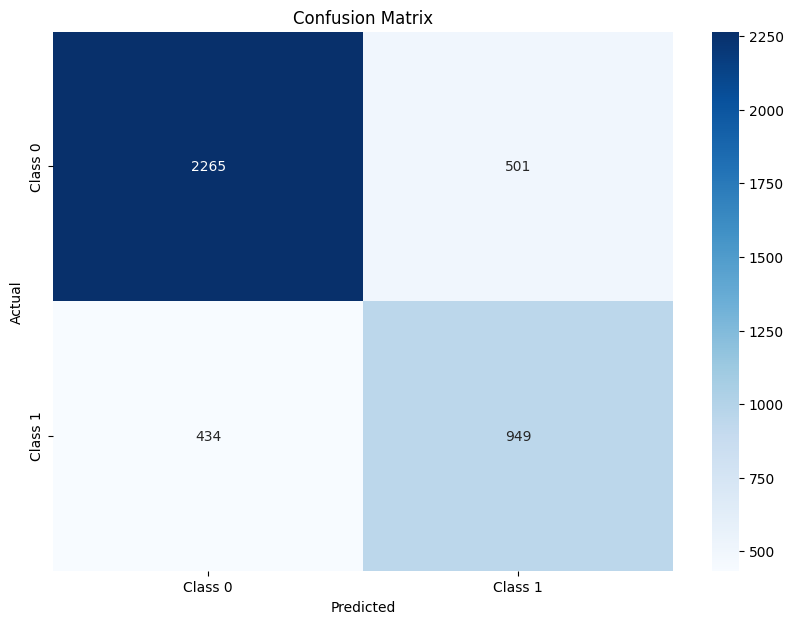

In [4590]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### Logistic Regression ( With feature selection and Hyperparameters )


In [4591]:
# Model Setup
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        solver='lbfgs', 
        penalty='l2',
        C=0.01,
        class_weight='balanced'
    ))
])

model_name = type(pipeline.named_steps['model']).__name__
model_abreviation = model_abrev(model_name=model_name)
legend_dict.setdefault(model_abreviation, model_name)
print(f"Model name: {model_name}.\nAbreviation: {model_abreviation}")

Model name: LogisticRegression.
Abreviation: LR


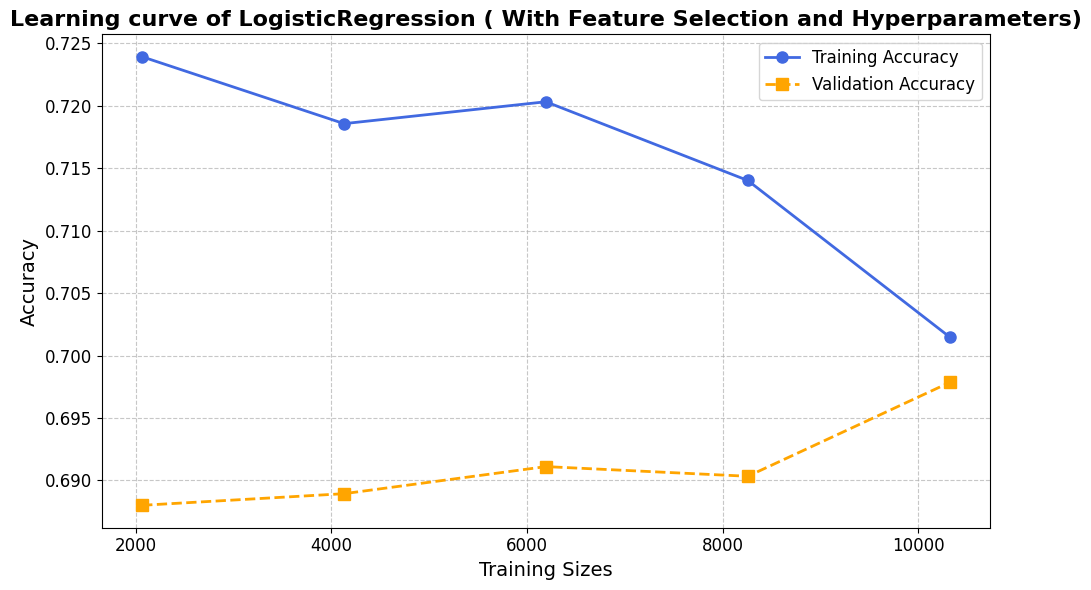

In [4592]:
# Learning Curve
plot_learning_curve(pipeline, x_train_wfs, y_train_resampled, title=f"Learning curve of {model_name} ( With Feature Selection and Hyperparameters)")

In [4593]:
# Model Fitting
pipeline.fit(x_train_wfs, y_train_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(C=0.01, class_weight='balanced'))])

In [4594]:
# Evaluate Model
y_pred = pipeline.predict(x_test_wfs)
evaluate_model(f"{model_abreviation}_FS", y_test,y_pred)

Metrics for LR_FS:
Accuracy: 0.7197
Precision: 0.7241
Recall: 0.7197
F1_score: 0.7216

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      2766
           1       0.58      0.61      0.59      1383

    accuracy                           0.72      4149
   macro avg       0.69      0.69      0.69      4149
weighted avg       0.72      0.72      0.72      4149



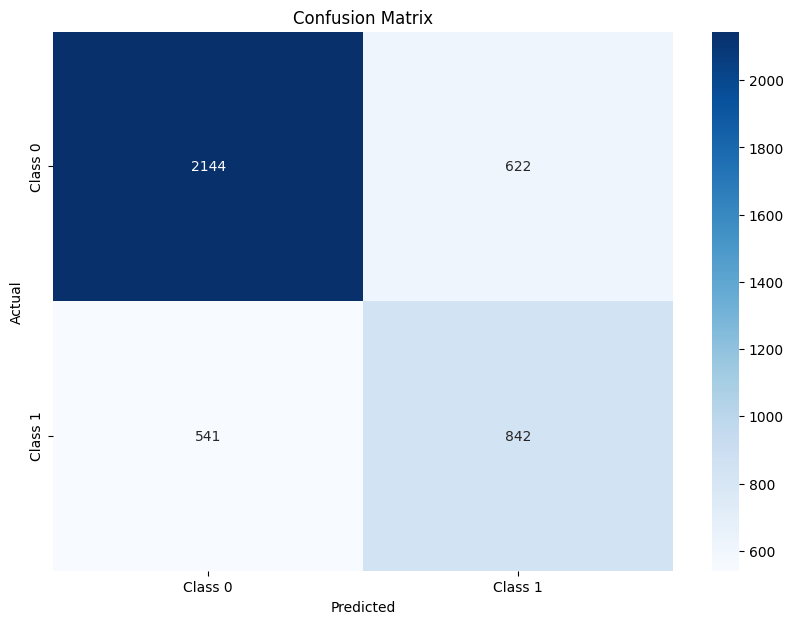

In [4595]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### Logistic Regression ROC Curves


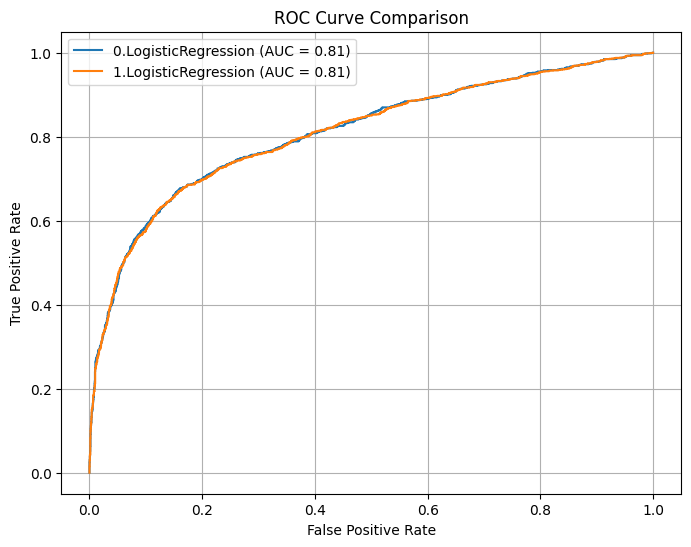

In [4596]:
# Plot ROC curves with and without hyperparameters
clfs = [
    default_pipeline,
    pipeline,
    ]
plot_roc_curves(clfs)

## Ensemble Model 1: Random Forest (Bagging)

### Random Forest ( Without Feature Selection and Hyperparameters)


In [4597]:
# Model Setup
default_pipeline = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1))
])
model_name = type(default_pipeline.named_steps['model']).__name__
model_abreviation = model_abrev(model_name=model_name)
legend_dict.setdefault(model_abreviation, model_name)
print(f"Model name: {model_name}.\nAbreviation: {model_abreviation}")

Model name: RandomForestClassifier.
Abreviation: RFC


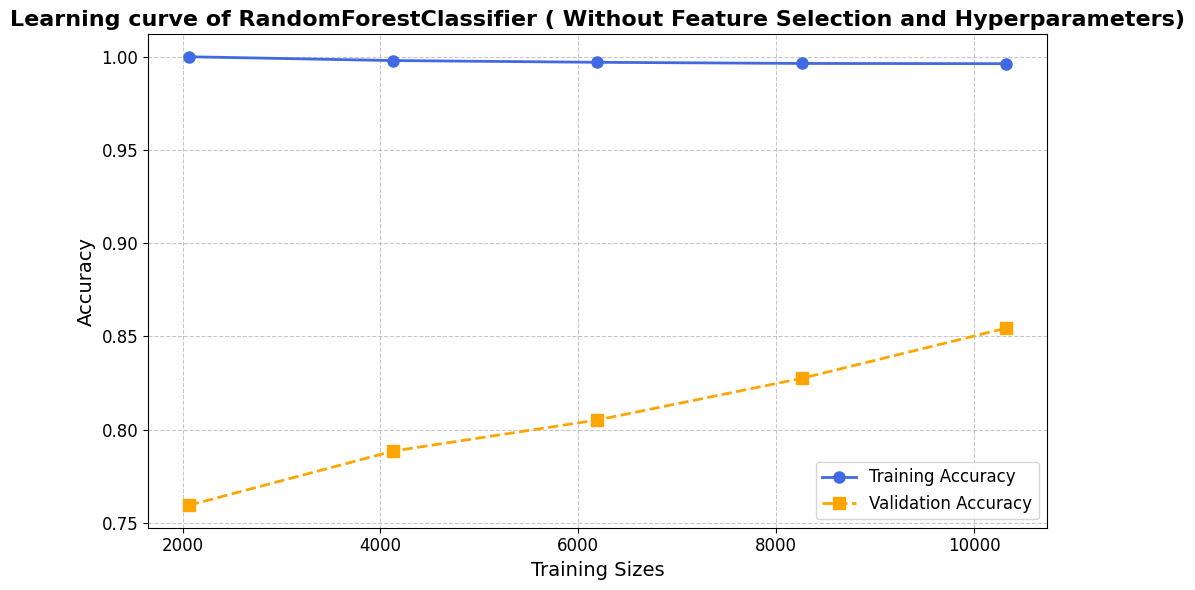

In [4598]:
# Learning Curve
plot_learning_curve(default_pipeline, x_train_resampled, y_train_resampled, title= f"Learning curve of {model_name} ( Without Feature Selection and Hyperparameters)")

In [4599]:
# Model Fitting
default_pipeline.fit(x_train_resampled, y_train_resampled)

Pipeline(steps=[('model', RandomForestClassifier(n_jobs=-1))])

In [4600]:
# Evaluate Model
y_pred = default_pipeline.predict(x_test)
evaluate_model(f"{model_abreviation}_WFS_WHP", y_test,y_pred)

Metrics for RFC_WFS_WHP:
Accuracy: 0.8209
Precision: 0.8192
Recall: 0.8209
F1_score: 0.8199

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      2766
           1       0.74      0.71      0.73      1383

    accuracy                           0.82      4149
   macro avg       0.80      0.79      0.80      4149
weighted avg       0.82      0.82      0.82      4149



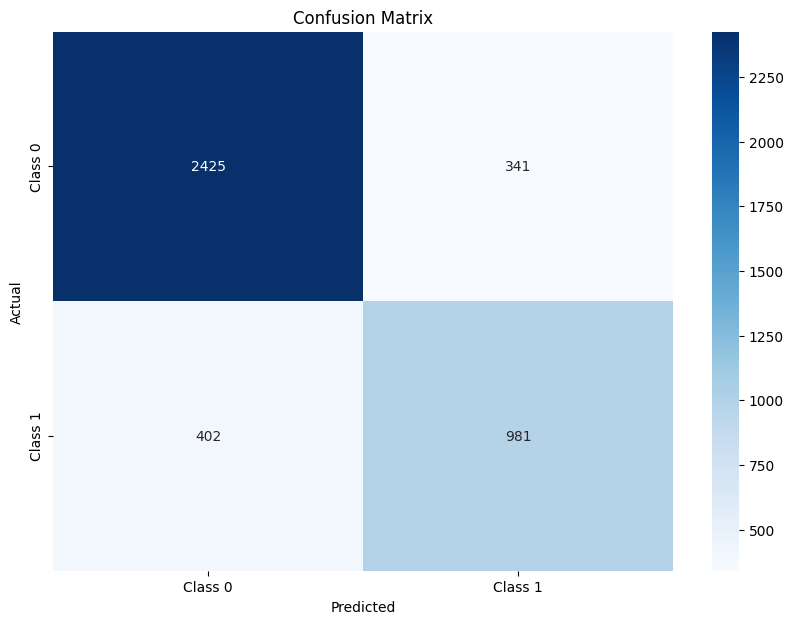

In [4601]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### Random Forest ( Without feature selection, but with hyperparameters )


In [4602]:
# Model Setup
"""
Parameters were chosen mostly by grid search, however, because learning curve showed signs of overfitting
setting depth to low value as well as larger leaf size and max_features adds diversity and more
generalization going forward
"""
pipeline = Pipeline([
    ('model', RandomForestClassifier(
        random_state=42,
        max_depth=10, 
        min_samples_split=5, 
        min_samples_leaf=1, 
        max_features='sqrt', 
        n_estimators=10, 
        n_jobs=-1, 
        class_weight='balanced'
    ))
])

model_name = type(pipeline.named_steps['model']).__name__
model_abreviation = model_abrev(model_name=model_name)
legend_dict.setdefault(model_abreviation, model_name)
print(f"Model name: {model_name}.\nAbreviation: {model_abreviation}")

Model name: RandomForestClassifier.
Abreviation: RFC


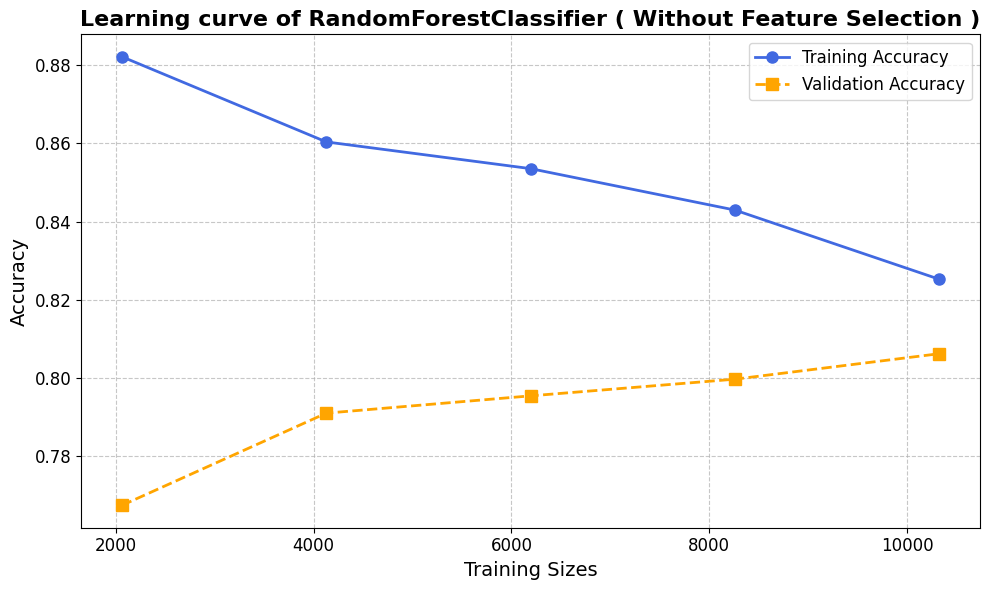

In [4603]:
# Learning Curve
plot_learning_curve(pipeline, x_train_resampled, y_train_resampled, title=f"Learning curve of {model_name} ( Without Feature Selection )")

In [4604]:
# Model Fitting
pipeline.fit(x_train_resampled, y_train_resampled)

Pipeline(steps=[('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_split=5, n_estimators=10,
                                        n_jobs=-1, random_state=42))])

In [4605]:
"""# Hyperparameter Tuning

param_dist = {
    'model__n_estimators': [100, 150, 200, 300],
    'model__max_depth': [20, 30, 50, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4, 8],
    'model__max_features': ['sqrt', 'log2', None],
    'model__class_weight': ['balanced', 'balanced_subsample', None]
}

best_params, search = hyperparameter_tuning(
    pipeline=default_pipeline, 
    param_dist=param_dist, 
    X_train=x_train_resampled,
    y_train= y_train_resampled,
    n_iter=100, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1, 
    random_state=42
)
"""

"# Hyperparameter Tuning\n\nparam_dist = {\n    'model__n_estimators': [100, 150, 200, 300],\n    'model__max_depth': [20, 30, 50, None],\n    'model__min_samples_split': [2, 5, 10],\n    'model__min_samples_leaf': [1, 2, 4, 8],\n    'model__max_features': ['sqrt', 'log2', None],\n    'model__class_weight': ['balanced', 'balanced_subsample', None]\n}\n\nbest_params, search = hyperparameter_tuning(\n    pipeline=default_pipeline, \n    param_dist=param_dist, \n    X_train=x_train_resampled,\n    y_train= y_train_resampled,\n    n_iter=100, \n    scoring='f1', \n    cv=5, \n    n_jobs=-1, \n    random_state=42\n)\n"

In [4606]:
# Evaluate Model
y_pred = pipeline.predict(x_test)
evaluate_model(f"{model_abreviation}_WFS", y_test,y_pred)

Metrics for RFC_WFS:
Accuracy: 0.8412
Precision: 0.8387
Recall: 0.8412
F1_score: 0.8386

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      2766
           1       0.79      0.71      0.75      1383

    accuracy                           0.84      4149
   macro avg       0.83      0.81      0.82      4149
weighted avg       0.84      0.84      0.84      4149



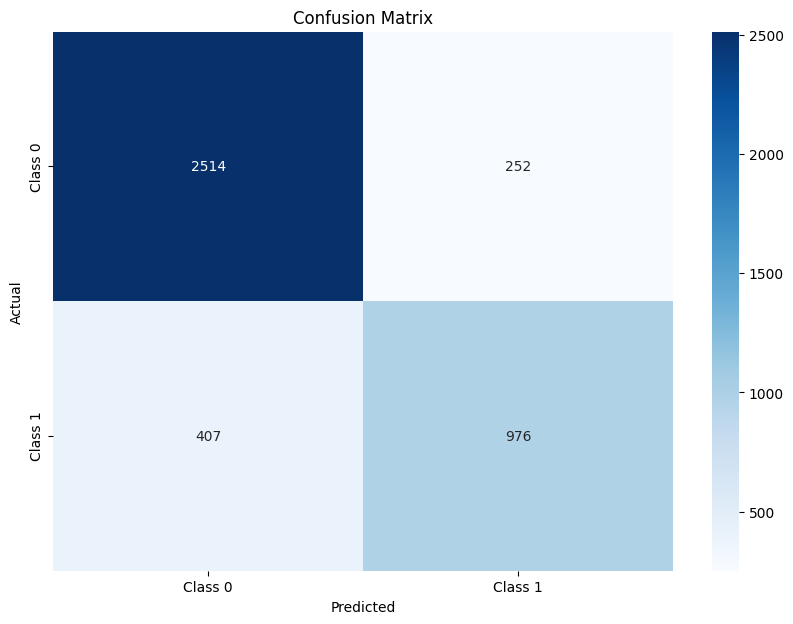

In [4607]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### Random Forest ( With feature selection and Hyperparameters )


In [4608]:
# Model Setup
"""
Parameters were chosen mostly by grid search, however, because learning curve showed signs of overfitting
setting depth to low value as well as larger leaf size and max_features adds diversity and more
generalization going forward
"""
pipeline = Pipeline([
    ('model', RandomForestClassifier(
        random_state=42,
        max_depth=10, 
        min_samples_split=5, 
        min_samples_leaf=1, 
        max_features='sqrt', 
        n_estimators=10, 
        n_jobs=-1, 
        class_weight='balanced'
    ))
])

model_name = type(pipeline.named_steps['model']).__name__
model_abreviation = model_abrev(model_name=model_name)
legend_dict.setdefault(model_abreviation, model_name)
print(f"Model name: {model_name}.\nAbreviation: {model_abreviation}")

Model name: RandomForestClassifier.
Abreviation: RFC


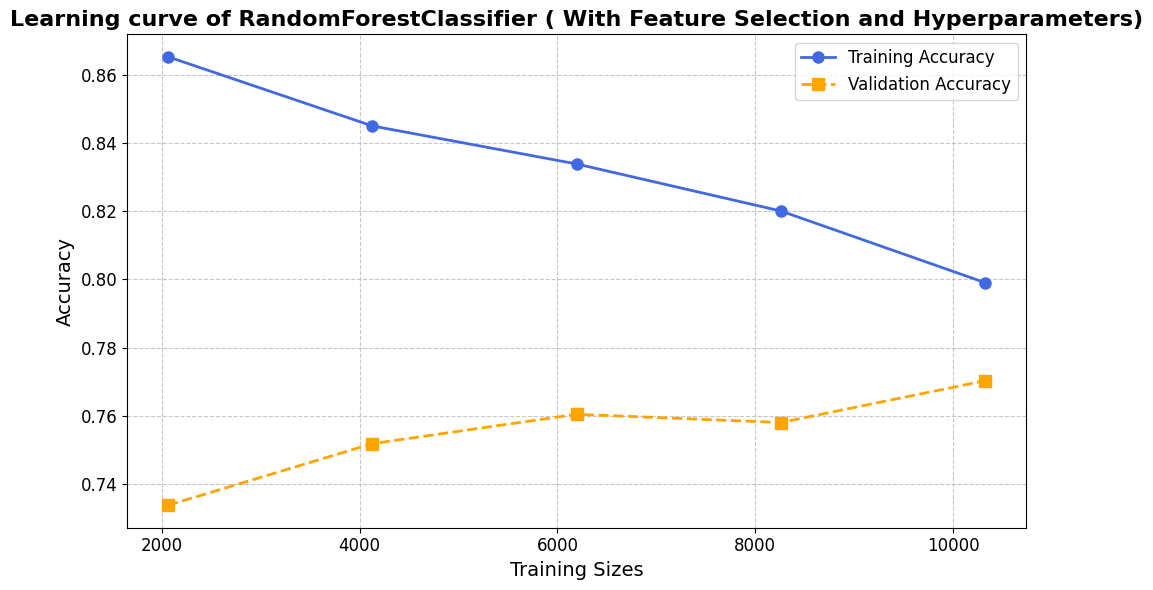

In [4609]:
# Learning Curve
plot_learning_curve(pipeline, x_train_wfs, y_train_resampled, title=f"Learning curve of {model_name} ( With Feature Selection and Hyperparameters)")

In [4610]:
# Model Fitting
pipeline.fit(x_train_wfs, y_train_resampled)

Pipeline(steps=[('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_split=5, n_estimators=10,
                                        n_jobs=-1, random_state=42))])

In [4611]:
# Evaluate Model
y_pred = pipeline.predict(x_test_wfs)
evaluate_model(f"{model_abreviation}_FS", y_test,y_pred)

Metrics for RFC_FS:
Accuracy: 0.8062
Precision: 0.8022
Recall: 0.8062
F1_score: 0.8025

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      2766
           1       0.74      0.64      0.69      1383

    accuracy                           0.81      4149
   macro avg       0.79      0.77      0.77      4149
weighted avg       0.80      0.81      0.80      4149



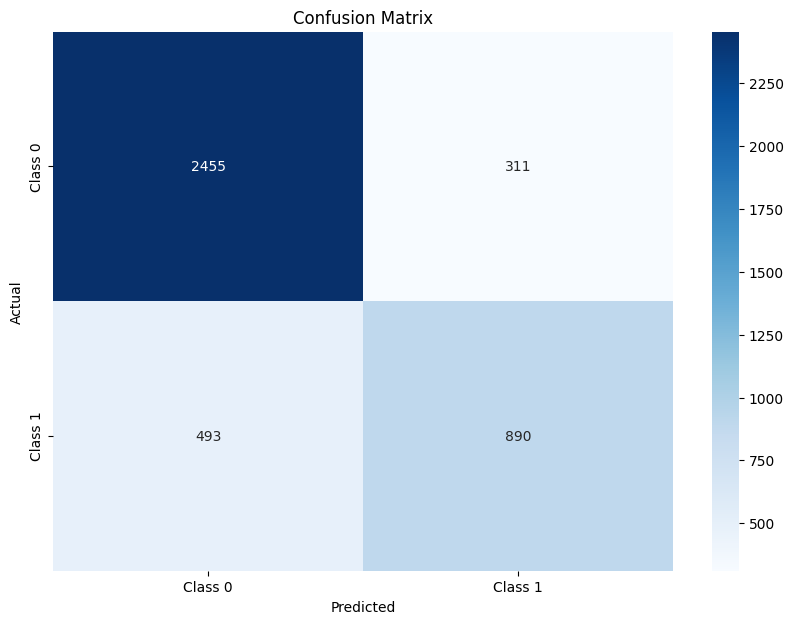

In [4612]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### Random Forest ROC Curves

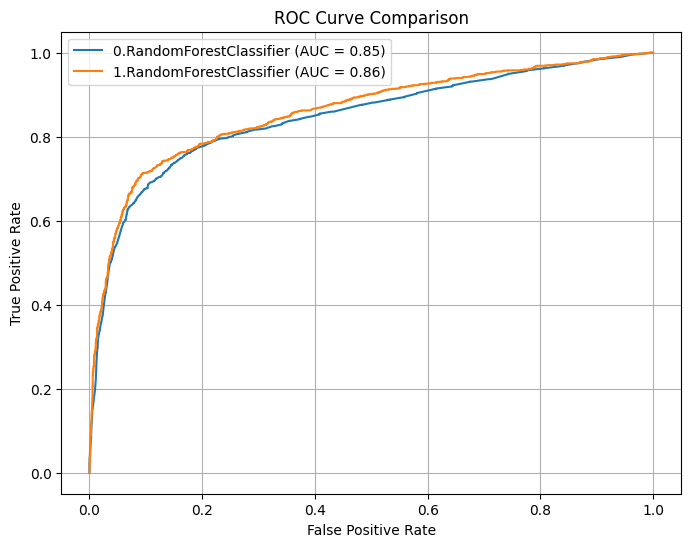

In [4613]:
# Plot ROC curves with and without hyperparameters
clfs = [
    default_pipeline,
    pipeline,
    ]
plot_roc_curves(clfs)

## Ensemble Model 2: LightGBM (Boosting)

### LightGBM ( Without Feature Selection and Hyperparameters)


In [4614]:
# Model Setup
default_pipeline = Pipeline([
    ('model', LGBMClassifier())
])
model_name = type(default_pipeline.named_steps['model']).__name__
model_abreviation = model_abrev(model_name=model_name)
legend_dict.setdefault(model_abreviation, model_name)
print(f"Model name: {model_name}.\nAbreviation: {model_abreviation}")

Model name: LGBMClassifier.
Abreviation: LGBMC


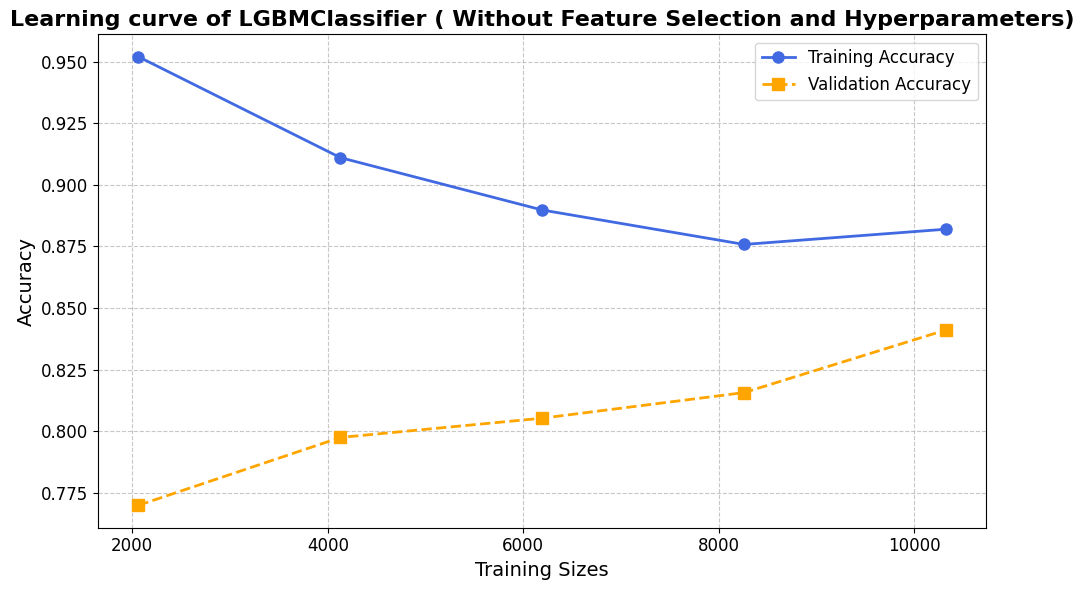

In [4615]:
# Learning Curve
plot_learning_curve(default_pipeline, x_train_resampled, y_train_resampled, title= f"Learning curve of {model_name} ( Without Feature Selection and Hyperparameters)")

In [4616]:
# Model Fitting
default_pipeline.fit(x_train_resampled, y_train_resampled)

[LightGBM] [Info] Number of positive: 6452, number of negative: 6452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 12904, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Pipeline(steps=[('model', LGBMClassifier())])

In [4617]:
# Evaluate Model
y_pred = default_pipeline.predict(x_test)
evaluate_model(f"{model_abreviation}_WFS_WHP", y_test,y_pred)

Metrics for LGBMC_WFS_WHP:
Accuracy: 0.8383
Precision: 0.8371
Recall: 0.8383
F1_score: 0.8376

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      2766
           1       0.77      0.74      0.75      1383

    accuracy                           0.84      4149
   macro avg       0.82      0.81      0.82      4149
weighted avg       0.84      0.84      0.84      4149



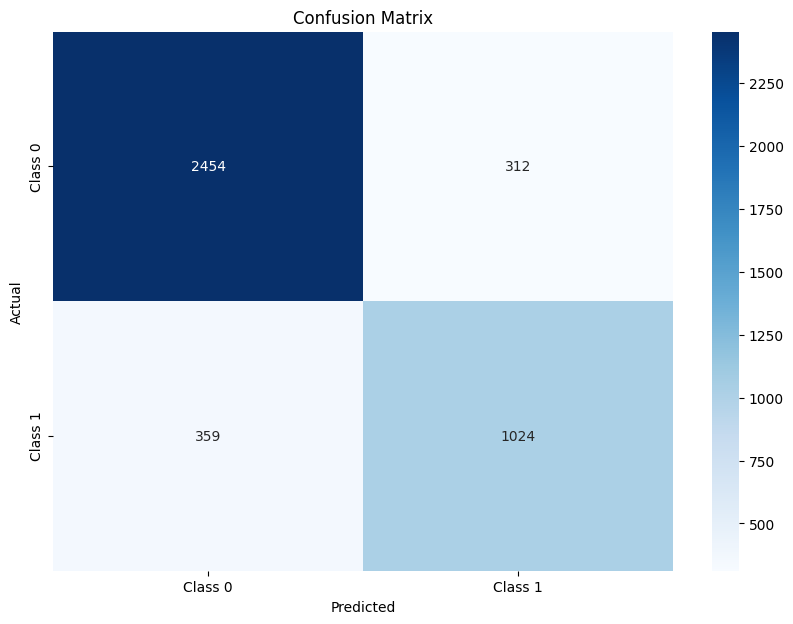

In [4618]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### LightGBM ( Without feature selection, but with hyperparameters )


In [4619]:
# Model Setup
pipeline = Pipeline([
    ('model', LGBMClassifier(
        random_state=42,
        scale_pos_weight=1,
        objective='binary',
        num_leaves=100,
        n_estimators=50,
        min_child_weight=1,
        min_child_samples=1,
        max_depth=7,
        learning_rate=0.1,
        lambda_l2=1,
        lambda_l1=1,
        boosting_type='dart'
    ))
])
model_name = type(pipeline.named_steps['model']).__name__
model_abreviation = model_abrev(model_name=model_name)
legend_dict.setdefault(model_abreviation, model_name)
print(f"Model name: {model_name}.\nAbreviation: {model_abreviation}")

Model name: LGBMClassifier.
Abreviation: LGBMC


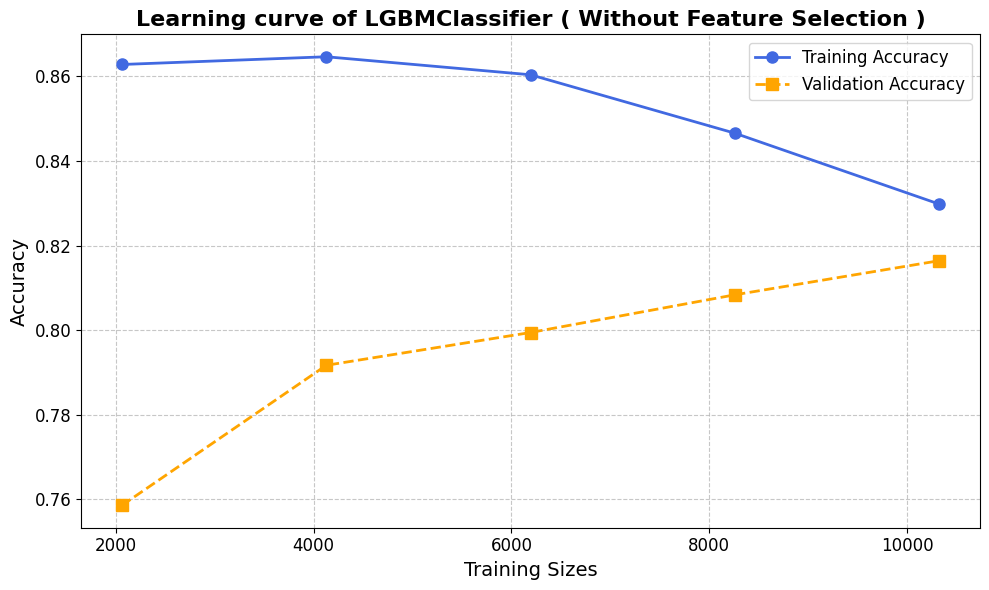

In [4620]:
# Learning Curve
plot_learning_curve(pipeline, x_train_resampled, y_train_resampled, title=f"Learning curve of {model_name} ( Without Feature Selection )")

In [4621]:
# Model Fitting
pipeline.fit(x_train_resampled, y_train_resampled)

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 6452, number of negative: 6452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 12904, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

Pipeline(steps=[('model',
                 LGBMClassifier(boosting_type='dart', lambda_l1=1, lambda_l2=1,
                                max_depth=7, min_child_samples=1,
                                min_child_weight=1, n_estimators=50,
                                num_leaves=100, objective='binary',
                                random_state=42, scale_pos_weight=1))])

In [4622]:
"""# Hyperparameter Tuning (15 mins)

param_dist = {
    'model__n_estimators': [50, 150, 300, 500],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2], 
    'model__objective': ['binary'], 
    'model__boosting_type': ['gbdt', 'dart', 'goss'],
    'model__max_depth': [10, 20, 30, 40, -1],
    'model__num_leaves': [31, 50, 100, 150, 200],
    'model__min_child_samples': [1, 5, 10, 20],
    'model__min_child_weight': [0.001, 0.1, 1],
    'model__lambda_l1': [0, 0.1, 0.5, 1],
    'model__lambda_l2': [0, 0.1, 0.5, 1],
    'model__scale_pos_weight': [1, 2, 5],
}
best_params, search = hyperparameter_tuning(
    pipeline=default_pipeline, 
    param_dist=param_dist, 
    X_train=x_train_resampled,
    y_train= y_train_resampled,
    n_iter=100, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1, 
    random_state=42
)

"""

"# Hyperparameter Tuning (15 mins)\n\nparam_dist = {\n    'model__n_estimators': [50, 150, 300, 500],\n    'model__learning_rate': [0.01, 0.05, 0.1, 0.2], \n    'model__objective': ['binary'], \n    'model__boosting_type': ['gbdt', 'dart', 'goss'],\n    'model__max_depth': [10, 20, 30, 40, -1],\n    'model__num_leaves': [31, 50, 100, 150, 200],\n    'model__min_child_samples': [1, 5, 10, 20],\n    'model__min_child_weight': [0.001, 0.1, 1],\n    'model__lambda_l1': [0, 0.1, 0.5, 1],\n    'model__lambda_l2': [0, 0.1, 0.5, 1],\n    'model__scale_pos_weight': [1, 2, 5],\n}\nbest_params, search = hyperparameter_tuning(\n    pipeline=default_pipeline, \n    param_dist=param_dist, \n    X_train=x_train_resampled,\n    y_train= y_train_resampled,\n    n_iter=100, \n    scoring='f1', \n    cv=5, \n    n_jobs=-1, \n    random_state=42\n)\n\n"

In [4623]:
# Evaluate Model
y_pred = pipeline.predict(x_test)
evaluate_model(f"{model_abreviation}_WFS", y_test,y_pred)

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
Metrics for LGBMC_WFS:
Accuracy: 0.8462
Precision: 0.8442
Recall: 0.8462
F1_score: 0.8446

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89      2766
           1       0.79      0.73      0.76      1383

    accuracy                           0.85      4149
   macro avg       0.83      0.82      0.82      4149
weighted avg       0.84      0.85      0.84      4149



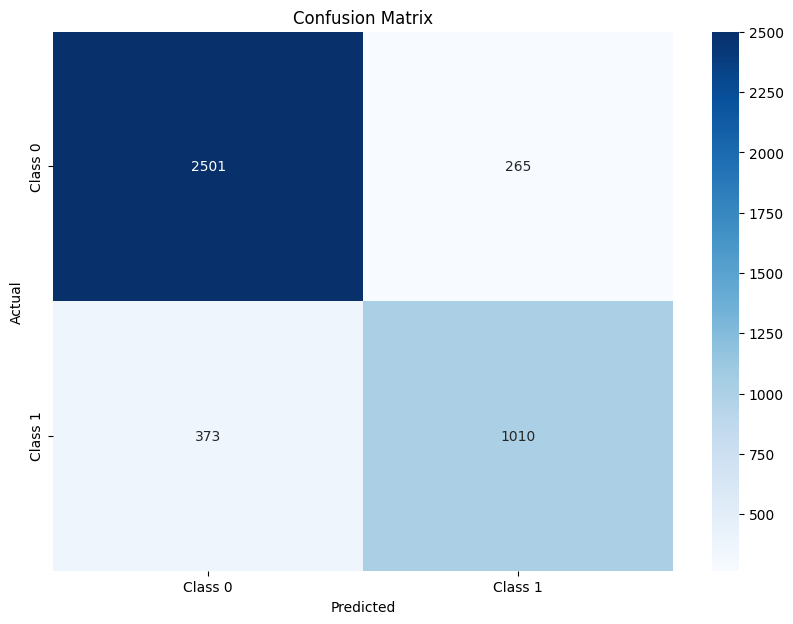

In [4624]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### LightGBM ( With feature selection and Hyperparameters )


In [4625]:
# Model Setup
pipeline = Pipeline([
    ('model', LGBMClassifier(
        random_state=42,
        scale_pos_weight=1,
        objective='binary',
        num_leaves=100,
        n_estimators=50,
        min_child_weight=1,
        min_child_samples=1,
        max_depth=7,
        learning_rate=0.1,
        lambda_l2=1,
        lambda_l1=1,
        boosting_type='dart'
    ))
])
model_name = type(pipeline.named_steps['model']).__name__
model_abreviation = model_abrev(model_name=model_name)
legend_dict.setdefault(model_abreviation, model_name)
print(f"Model name: {model_name}.\nAbreviation: {model_abreviation}")

Model name: LGBMClassifier.
Abreviation: LGBMC


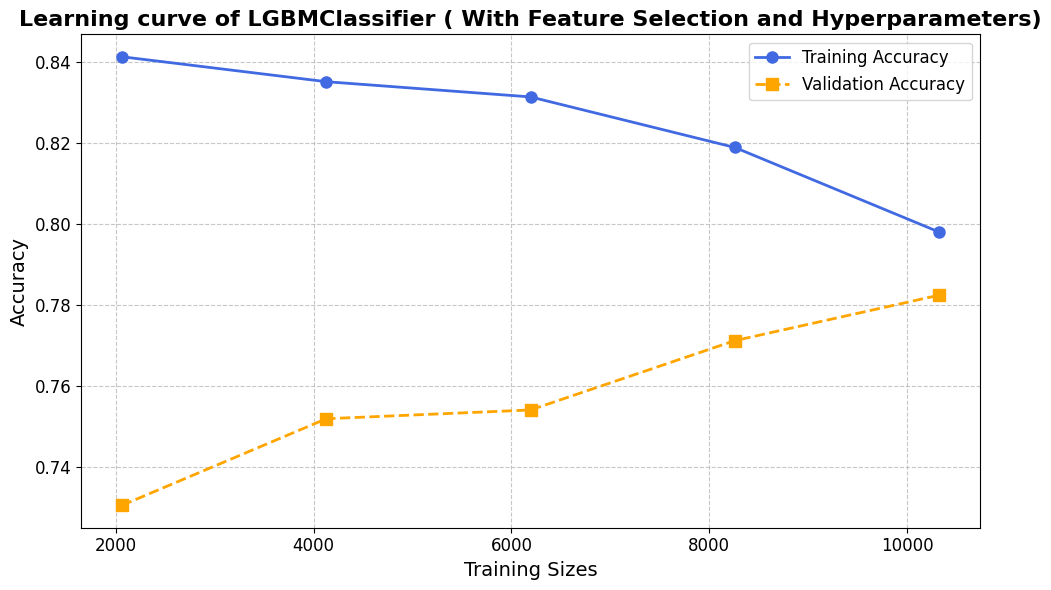

In [4626]:
# Learning Curve
plot_learning_curve(pipeline, x_train_wfs, y_train_resampled, title=f"Learning curve of {model_name} ( With Feature Selection and Hyperparameters)")

In [4627]:
# Model Fitting
pipeline.fit(x_train_wfs, y_train_resampled)

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 6452, number of negative: 6452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1009
[LightGBM] [Info] Number of data points in the train set: 12904, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

Pipeline(steps=[('model',
                 LGBMClassifier(boosting_type='dart', lambda_l1=1, lambda_l2=1,
                                max_depth=7, min_child_samples=1,
                                min_child_weight=1, n_estimators=50,
                                num_leaves=100, objective='binary',
                                random_state=42, scale_pos_weight=1))])

In [4628]:
# Evaluate Model
y_pred = pipeline.predict(x_test_wfs)
evaluate_model(f"{model_abreviation}_FS", y_test,y_pred)

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
Metrics for LGBMC_FS:
Accuracy: 0.8209
Precision: 0.8177
Recall: 0.8209
F1_score: 0.8180

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      2766
           1       0.76      0.67      0.71      1383

    accuracy                           0.82      4149
   macro avg       0.80      0.78      0.79      4149
weighted avg       0.82      0.82      0.82      4149



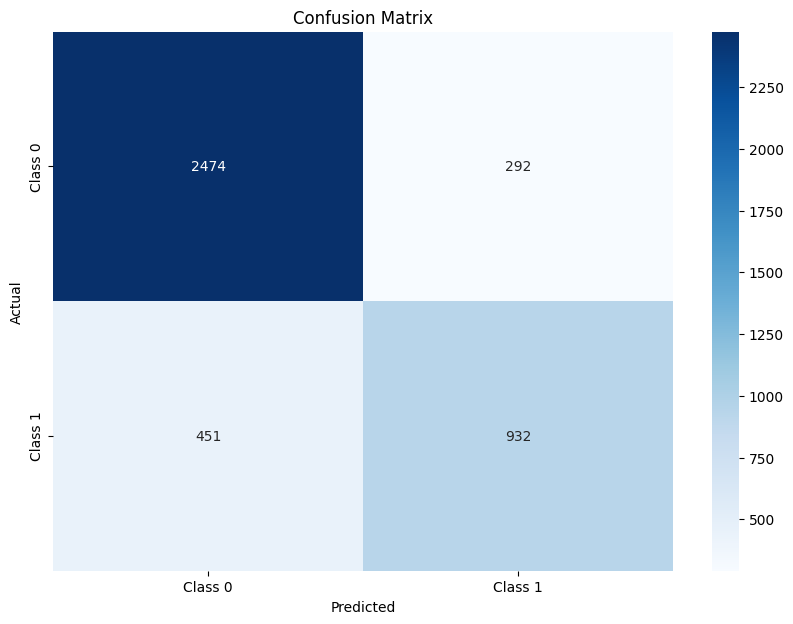

In [4629]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### LightGBM ROC Curves


[LightGBM] [Info] Number of positive: 6452, number of negative: 6452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 12904, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 6452, number of negative: 6452
[LightGBM] [Info] Auto-choosing 

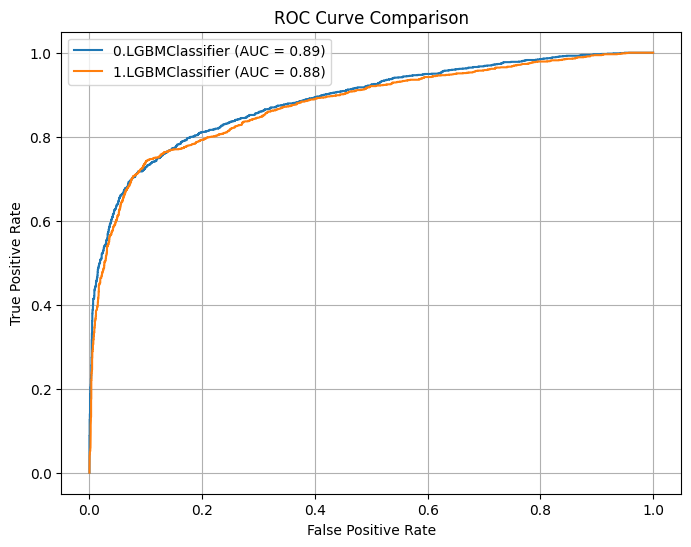

In [4630]:
# Plot ROC curves with and without hyperparameters
clfs = [
    default_pipeline,
    pipeline,
    ]
plot_roc_curves(clfs)

## Ensemble Model 3: XGBoost (Boosting)

### XGBoost ( Without Feature Selection and Hyperparameters)

In [4631]:
# Model Setup
default_pipeline = Pipeline([
    ('model', XGBClassifier(enable_categorical=True))
])
model_name = type(default_pipeline.named_steps['model']).__name__
model_abreviation = model_abrev(model_name=model_name)
legend_dict.setdefault(model_abreviation, model_name)
print(f"Model name: {model_name}.\nAbreviation: {model_abreviation}")

Model name: XGBClassifier.
Abreviation: XGBC


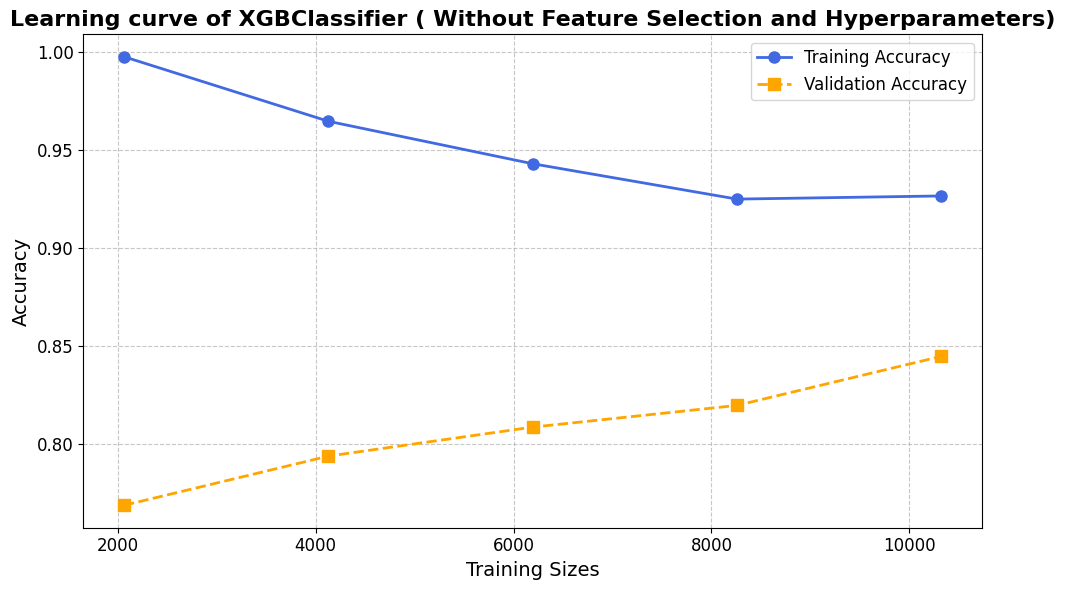

In [4632]:
# Learning Curve
plot_learning_curve(default_pipeline, x_train_resampled, y_train_resampled, title= f"Learning curve of {model_name} ( Without Feature Selection and Hyperparameters)")

In [4633]:
# Model Fitting
default_pipeline.fit(x_train_resampled, y_train_resampled)

Pipeline(steps=[('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=True, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [4634]:
# Evaluate Model
y_pred = default_pipeline.predict(x_test)
evaluate_model(f"{model_abreviation}_WFS_WHP", y_test,y_pred)

Metrics for XGBC_WFS_WHP:
Accuracy: 0.8315
Precision: 0.8304
Recall: 0.8315
F1_score: 0.8309

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      2766
           1       0.75      0.73      0.74      1383

    accuracy                           0.83      4149
   macro avg       0.81      0.81      0.81      4149
weighted avg       0.83      0.83      0.83      4149



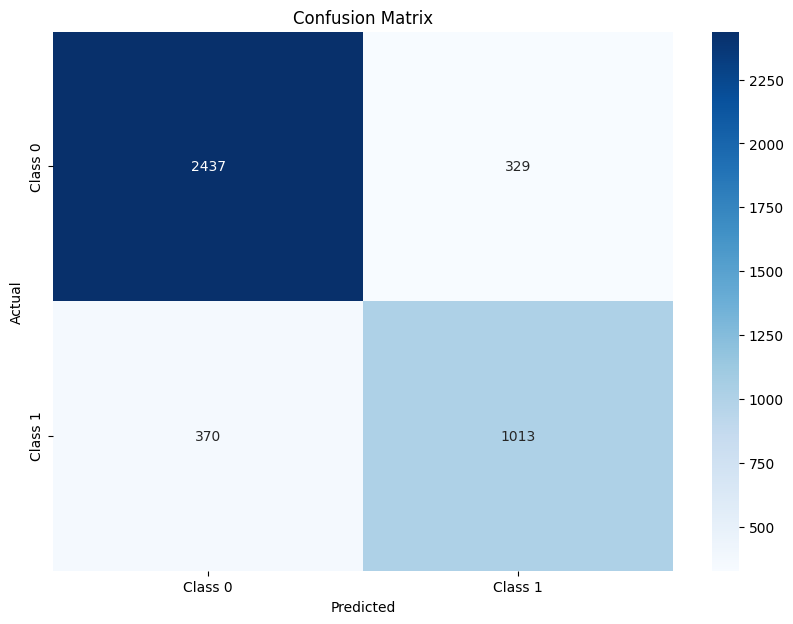

In [4635]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### XGBoost ( Without feature selection, but with hyperparameters )


In [4636]:
# Model Setup
pipeline = Pipeline([
    ('model', XGBClassifier(
        random_state=42,
        enable_categorical=True, 
        subsample=0.8,
        reg_lambda=5,
        reg_alpha=0.01,
        n_estimators=150,
        max_depth=5,
        min_child_weight= 1,
        learning_rate=0.1,
        gamma=0.2,
        colsample_bytree=0.8,
        objective='binary:logistic'
    ))
])

model_name = type(pipeline.named_steps['model']).__name__
model_abreviation = model_abrev(model_name=model_name)
legend_dict.setdefault(model_abreviation, model_name)
print(f"Model name: {model_name}.\nAbreviation: {model_abreviation}")

Model name: XGBClassifier.
Abreviation: XGBC


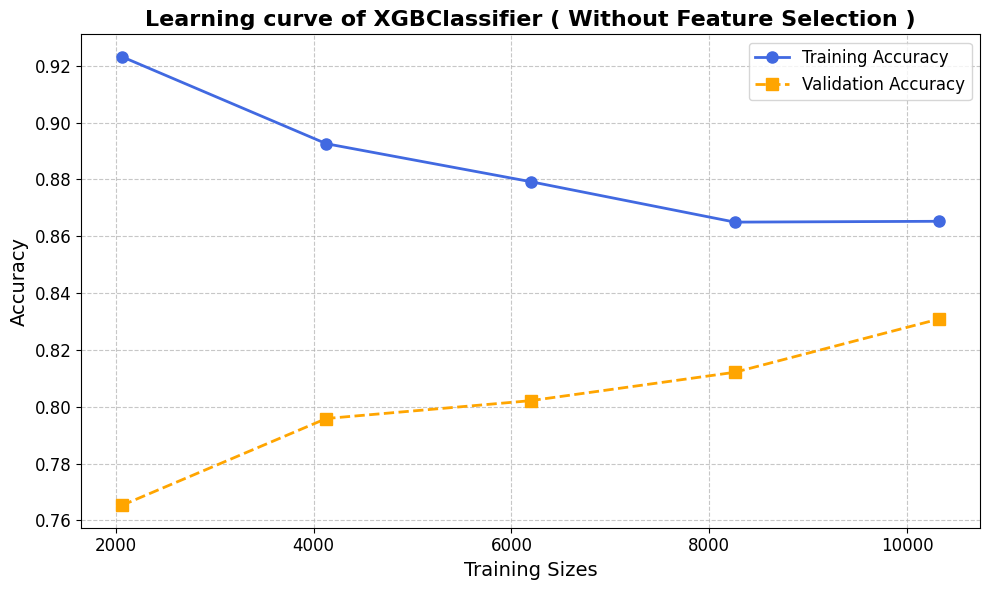

In [4637]:
# Learning Curve
plot_learning_curve(pipeline, x_train_resampled, y_train_resampled, title=f"Learning curve of {model_name} ( Without Feature Selection )")

In [4638]:
# Model Fitting
pipeline.fit(x_train_resampled, y_train_resampled)

Pipeline(steps=[('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=True, eval_metric=None,
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=150,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

In [4639]:
"""# Hyperparameter Tuning (2m)

param_dist = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [3, 6, 10],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.7, 0.8, 1.0],
    'model__colsample_bytree': [0.7, 0.8, 1.0],
    'model__reg_alpha': [0, 0.01, 0.1],
    'model__reg_lambda': [1, 5, 10],
    'model__min_child_weight': [1, 3, 5]
}
best_params, search = hyperparameter_tuning(
    pipeline=default_pipeline, 
    param_dist=param_dist, 
    X_train=x_train_resampled,
    y_train= y_train_resampled,
    n_iter=100, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1, 
    random_state=42
)
"""

"# Hyperparameter Tuning (2m)\n\nparam_dist = {\n    'model__n_estimators': [100, 200, 500],\n    'model__max_depth': [3, 6, 10],\n    'model__learning_rate': [0.01, 0.05, 0.1],\n    'model__subsample': [0.7, 0.8, 1.0],\n    'model__colsample_bytree': [0.7, 0.8, 1.0],\n    'model__reg_alpha': [0, 0.01, 0.1],\n    'model__reg_lambda': [1, 5, 10],\n    'model__min_child_weight': [1, 3, 5]\n}\nbest_params, search = hyperparameter_tuning(\n    pipeline=default_pipeline, \n    param_dist=param_dist, \n    X_train=x_train_resampled,\n    y_train= y_train_resampled,\n    n_iter=100, \n    scoring='f1', \n    cv=5, \n    n_jobs=-1, \n    random_state=42\n)\n"

In [4640]:
# Evaluate Model
y_pred = pipeline.predict(x_test)
evaluate_model(f"{model_abreviation}_WFS", y_test,y_pred)

Metrics for XGBC_WFS:
Accuracy: 0.8373
Precision: 0.8361
Recall: 0.8373
F1_score: 0.8366

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      2766
           1       0.76      0.74      0.75      1383

    accuracy                           0.84      4149
   macro avg       0.82      0.81      0.82      4149
weighted avg       0.84      0.84      0.84      4149



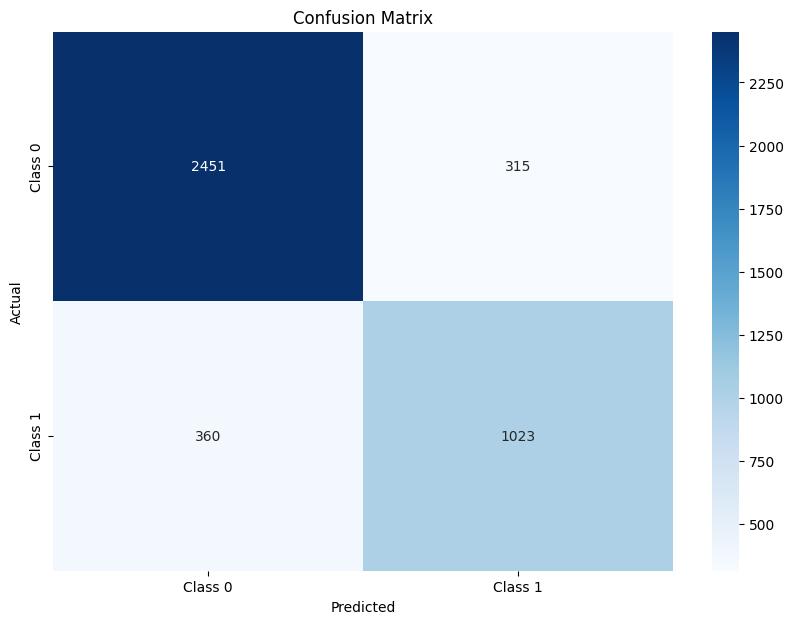

In [4641]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### XGBoost ( With feature selection and Hyperparameters )


In [4642]:
# Model Setup
pipeline = Pipeline([
    ('model', XGBClassifier(
        random_state=42,
        enable_categorical=True, 
        subsample=0.8,
        reg_lambda=5,
        reg_alpha=0.01,
        n_estimators=150,
        max_depth=5,
        min_child_weight= 1,
        learning_rate=0.1,
        gamma=0.2,
        colsample_bytree=0.8,
        objective='binary:logistic'
    ))
])

model_name = type(pipeline.named_steps['model']).__name__
model_abreviation = model_abrev(model_name=model_name)
legend_dict.setdefault(model_abreviation, model_name)
print(f"Model name: {model_name}.\nAbreviation: {model_abreviation}")

Model name: XGBClassifier.
Abreviation: XGBC


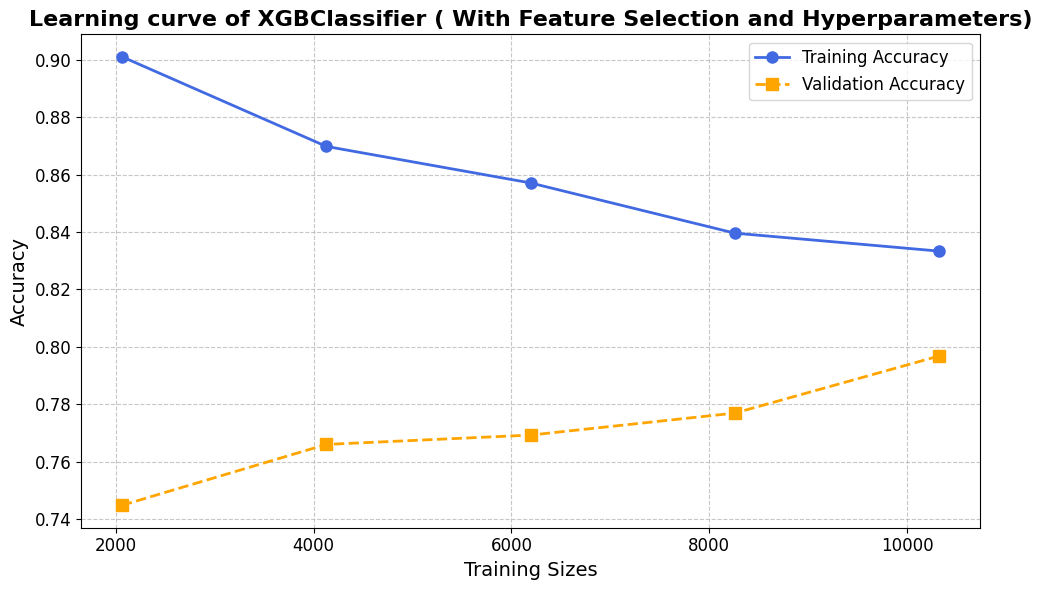

In [4643]:
# Learning Curve
plot_learning_curve(pipeline, x_train_wfs, y_train_resampled, title=f"Learning curve of {model_name} ( With Feature Selection and Hyperparameters)")

In [4644]:
# Model Fitting
pipeline.fit(x_train_wfs, y_train_resampled)

Pipeline(steps=[('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=True, eval_metric=None,
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=150,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

In [4645]:
# Evaluate Model
y_pred = pipeline.predict(x_test_wfs)
evaluate_model(f"{model_abreviation}_FS", y_test,y_pred)

Metrics for XGBC_FS:
Accuracy: 0.8038
Precision: 0.8019
Recall: 0.8038
F1_score: 0.8026

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      2766
           1       0.72      0.68      0.70      1383

    accuracy                           0.80      4149
   macro avg       0.78      0.77      0.78      4149
weighted avg       0.80      0.80      0.80      4149



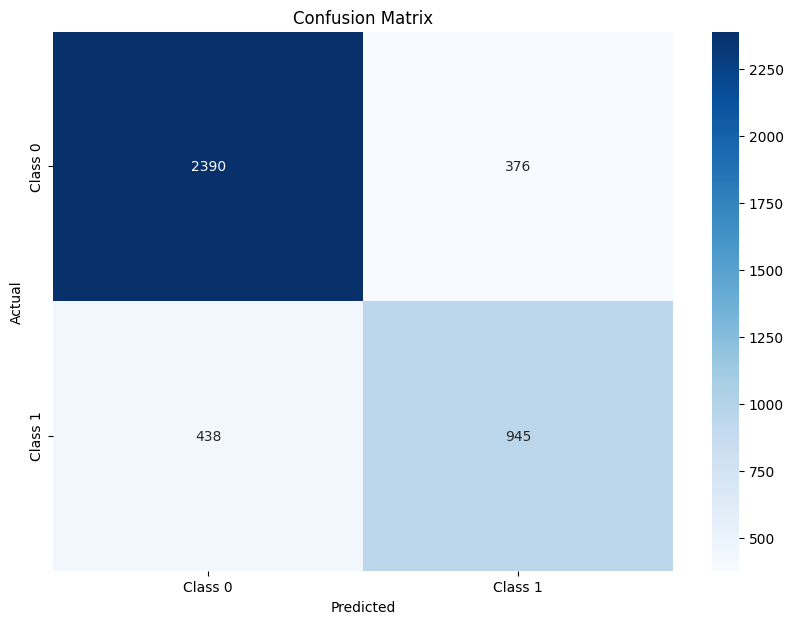

In [4646]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

### XGBoost ROC Curves


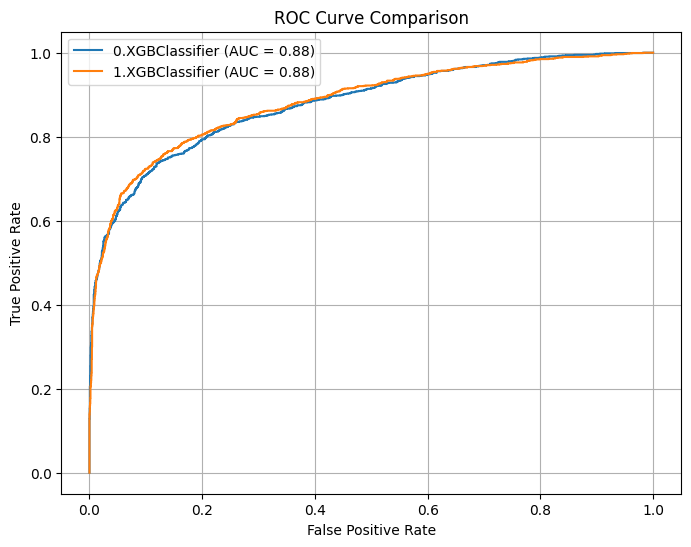

In [4647]:
# Plot ROC curves with and without hyperparameters
clfs = [
    default_pipeline,
    pipeline,
    ]
plot_roc_curves(clfs)

## All Models ROC Curves

In this section we will compare the ROC curves of the base models ( No Hyperparameters ), as well as all models with their respective hyperparameters

[LightGBM] [Info] Number of positive: 6452, number of negative: 6452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 12904, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


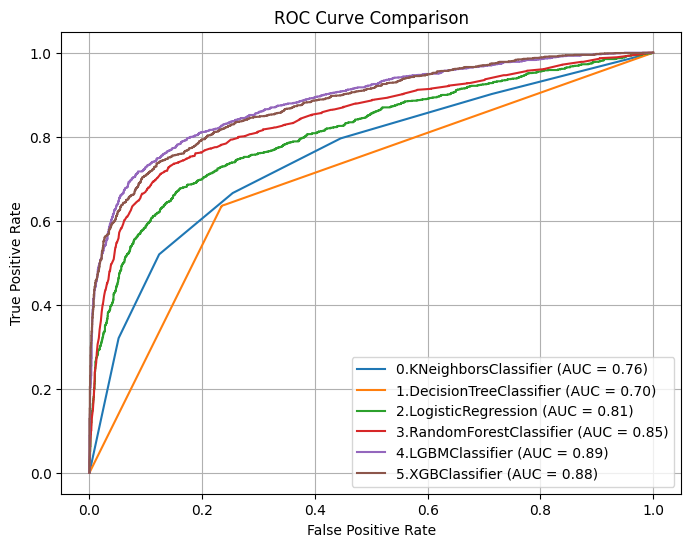

In [4648]:
# Plot ROC curves for all models ( without hyperparameters )
clfs = [
    Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsClassifier())
    ]),
    Pipeline([
        ('model', DecisionTreeClassifier())
    ]),
    Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression())
    ]),
    Pipeline([
        ('model', RandomForestClassifier(n_jobs=-1))
    ]),
    Pipeline([
        ('model', LGBMClassifier())
    ]),
    Pipeline([
        ('model', XGBClassifier(enable_categorical=True))
    ]),
]
plot_roc_curves(clfs)

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 6452, number of negative: 6452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 12904, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

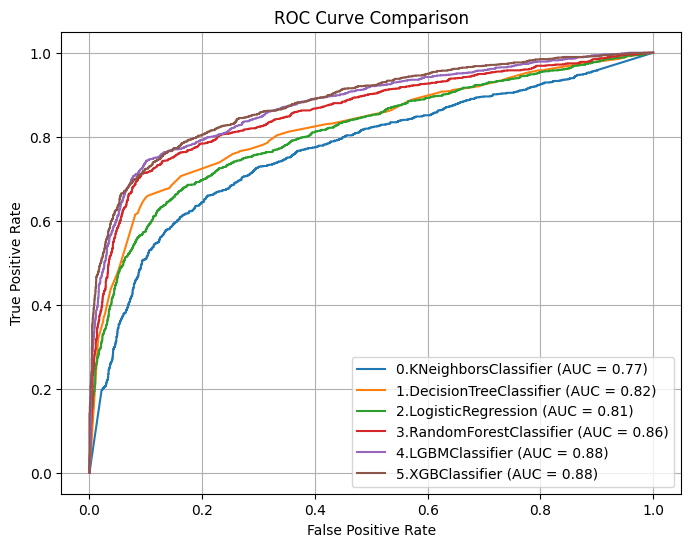

In [4649]:
# Plot ROC curves for all models ( with hyperparameters )
clfs = [
    Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsClassifier(
        weights='distance',
        p=1,
        n_neighbors=11,
        metric='manhattan',
        leaf_size=20,
        algorithm='ball_tree'
    ))
    ]),
    
    Pipeline([
        ('model', DecisionTreeClassifier(
            random_state=42,
            max_depth=30,
            min_samples_split=10,
            min_samples_leaf=2,
            max_leaf_nodes=100,
            max_features='log2',
            ccp_alpha=0.0,
            class_weight='balanced'
        ))
    ]),

    Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(
            solver='lbfgs', 
            penalty='l2',
            C=0.01,
            class_weight='balanced'
        ))
    ]),
    
    Pipeline([
        ('model', RandomForestClassifier(
            random_state=42,
            max_depth=10, 
            min_samples_split=5, 
            min_samples_leaf=1, 
            max_features='sqrt', 
            n_estimators=10, 
            n_jobs=-1, 
            class_weight='balanced'
        ))
    ]),

    Pipeline([
        ('model', LGBMClassifier(
            random_state=42,
            scale_pos_weight=1,
            objective='binary',
            num_leaves=100,
            n_estimators=50,
            min_child_weight=1,
            min_child_samples=1,
            max_depth=7,
            learning_rate=0.1,
            lambda_l2=1,
            lambda_l1=1,
            boosting_type='dart'
        ))
    ]),
    
    Pipeline([
        ('model', XGBClassifier(
            random_state=42,
            enable_categorical=True, 
            subsample=0.8,
            reg_lambda=5,
            reg_alpha=0.01,
            n_estimators=150,
            max_depth=5,
            min_child_weight= 1,
            learning_rate=0.1,
            gamma=0.2,
            colsample_bytree=0.8,
            objective='binary:logistic'
        ))
    ])
    ]
plot_roc_curves(clfs)

# Comparison

Lastly, after going through exploration, cleaning, resampling and training multiple models to their peak performance, we can make justifiable comparison between each of their performances and which yielded the best results

In [4650]:
# Legend that explains the meaning of a model name based on their prefix and suffix
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
for k, v in legend_dict.items():
    print(f'Key {k} = {v}')

Key WHP = Without Feature Selection and Hyperparameters
Key WFS = Without Feature Selection, With Hyperparameters
Key _FS = With Feature Selection and Hyperparameters
Key KNC = KNeighborsClassifier
Key DTC = DecisionTreeClassifier
Key LR = LogisticRegression
Key RFC = RandomForestClassifier
Key LGBMC = LGBMClassifier
Key XGBC = XGBClassifier


In [4651]:
# Plot the bar chart
def plot_metrics_comparison(models_list, metric_name, title):
    values = [models[model][metric_name] for model in models_list]
    plt.figure(figsize=(10, 6))
    bars = plt.barh(models_list, values, color='skyblue')
    plt.bar_label(bars, fmt='%.2f', padding=3)
    plt.xlabel(metric_name.capitalize())
    plt.title(title)
    plt.show()

In [4652]:
# Plot comparison between models ending with 'WHP', 'WFS', 'FS' and starting with 'RFC', 'DTC', 'LGBMC', 'LR', 'XGBC', 'KNC'

def plot_selected_models_comparison(location=None, comparison=None, title='All Models'):

    models_selected = models.keys()
 
    if location == 'ending':
        models_selected = [model for model in models.keys() if model.endswith(comparison)]
        title = f"Models ({legend_dict[comparison]})"

    elif location == "starting":
        models_selected = [model for model in models.keys() if model.startswith(comparison)]
        title = f"Models {legend_dict[comparison]}"


    for metric in metrics:
        plot_metrics_comparison(models_selected, metric, f'Comparison of {metric.capitalize()} for {title} ')


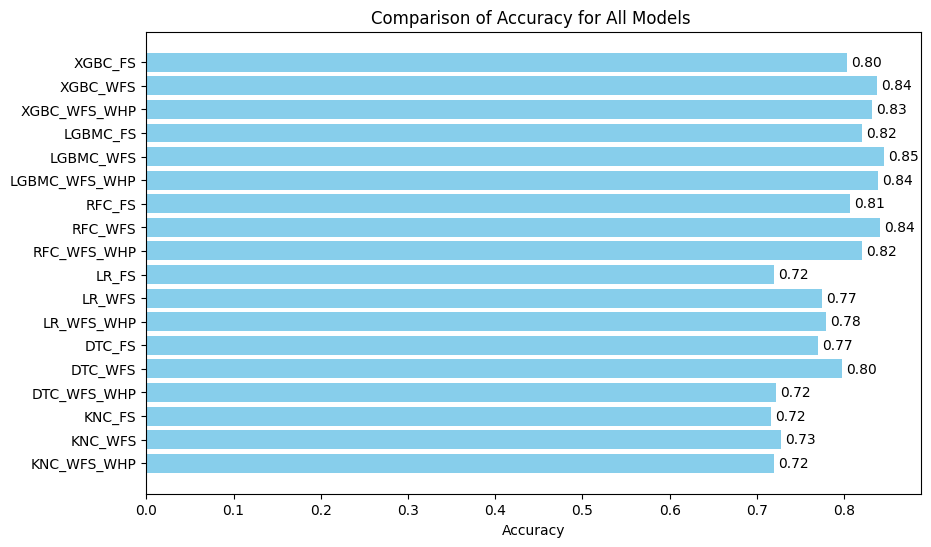

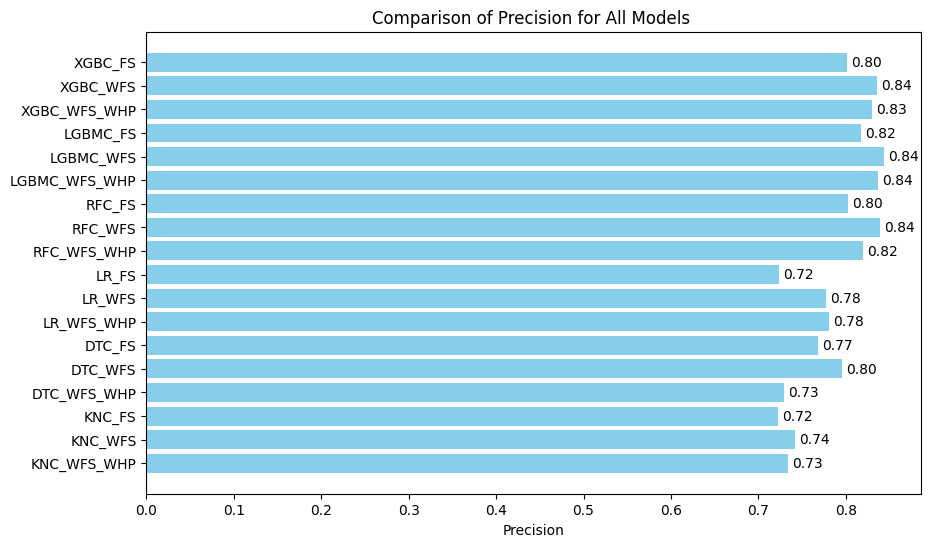

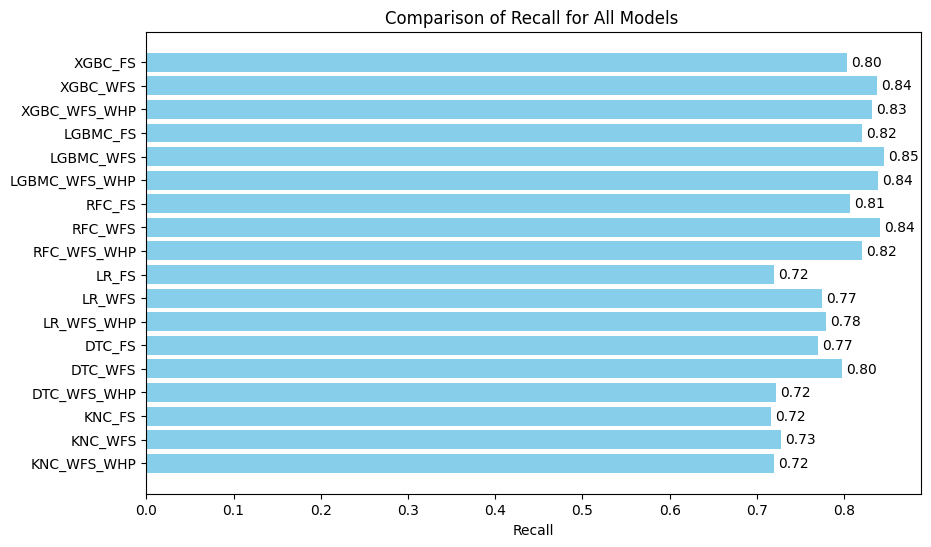

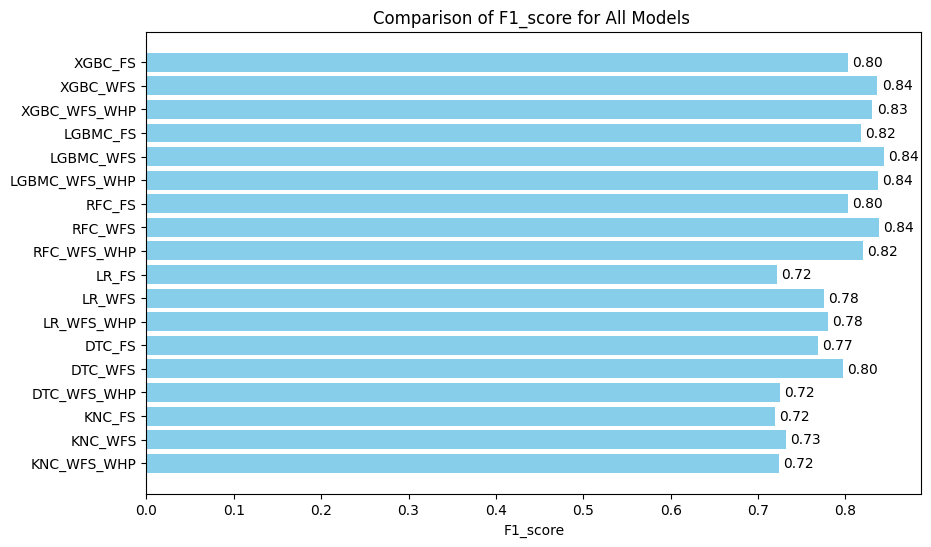

In [4653]:
# Compare all models based on 'accuracy', 'precision', 'recall', and 'f1_score'
plot_selected_models_comparison()

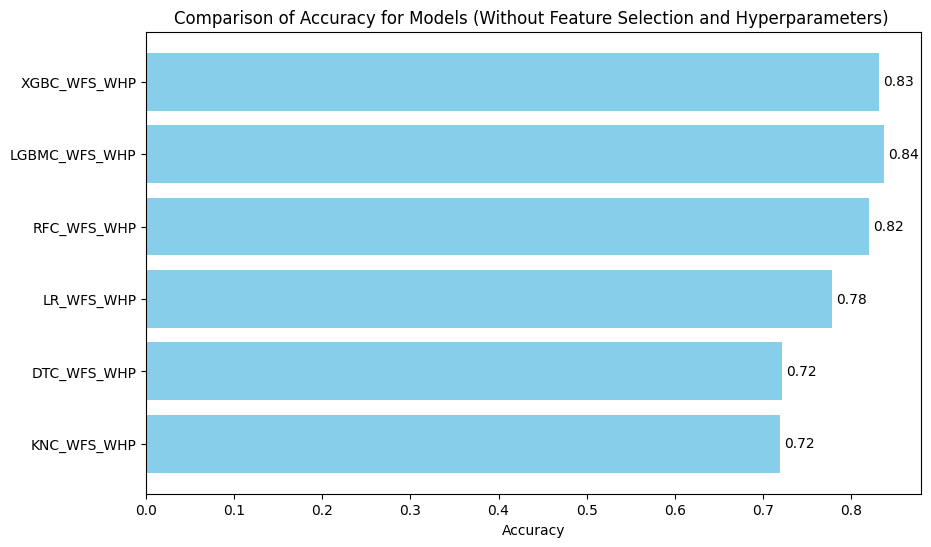

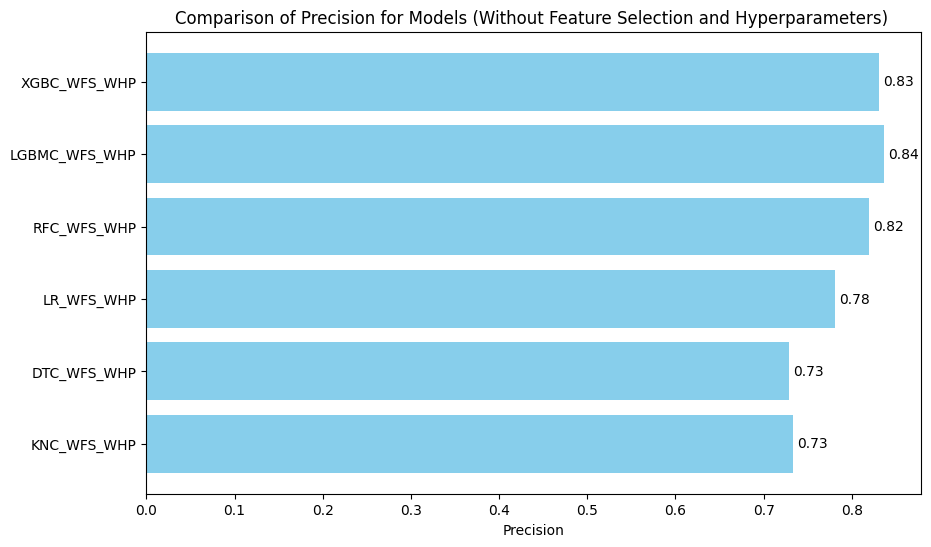

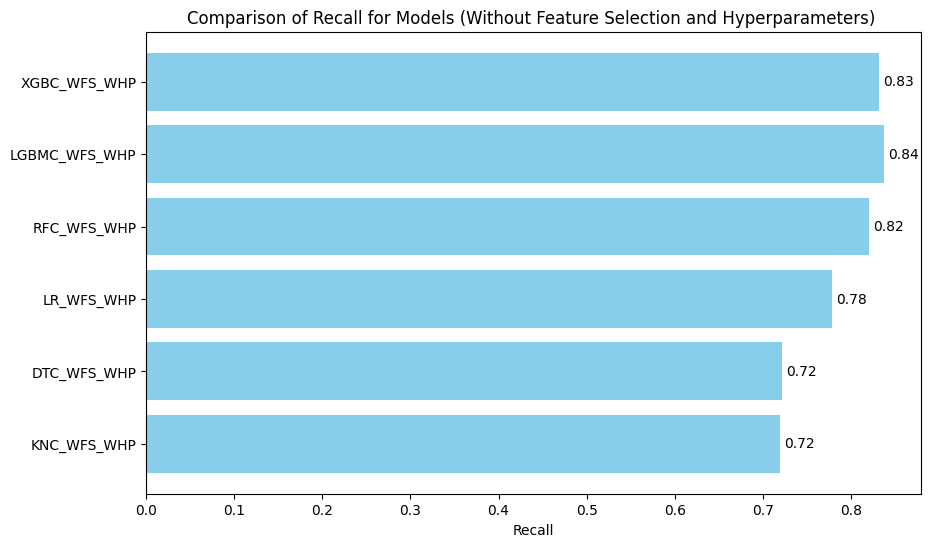

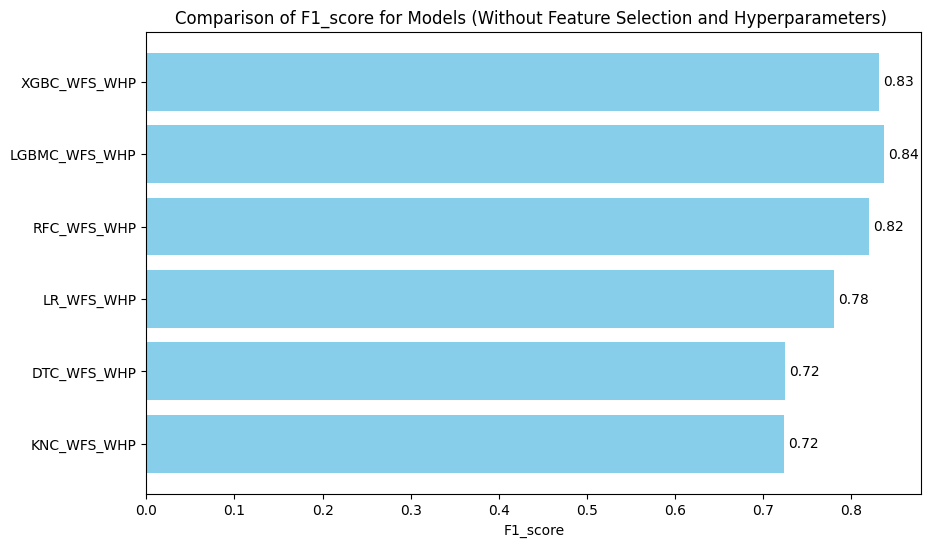

In [4654]:
# Compare models without feature selection and hyperparameters based on 'accuracy', 'precision', 'recall', and 'f1_score'
plot_selected_models_comparison('ending','WHP')

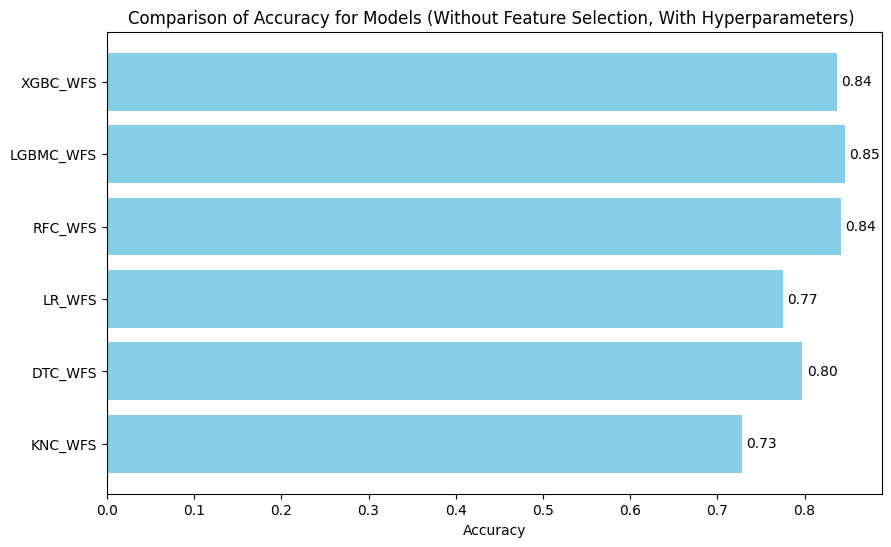

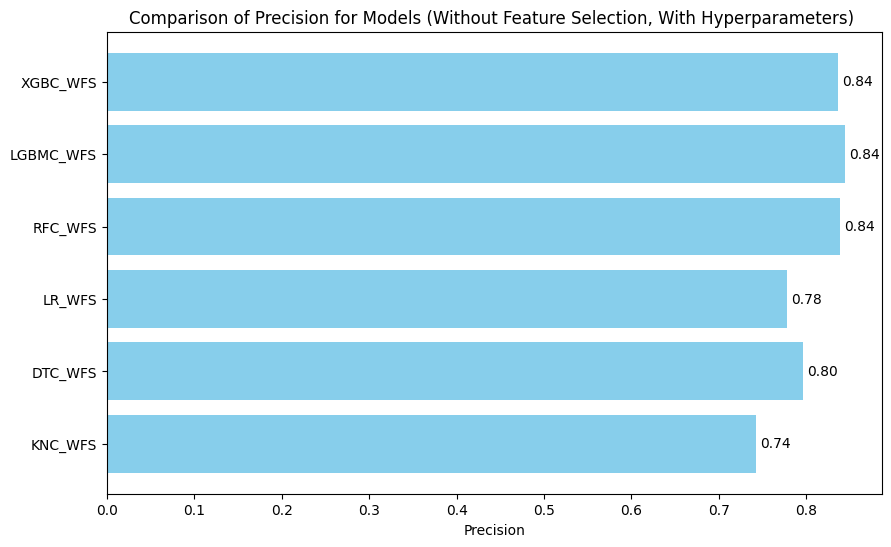

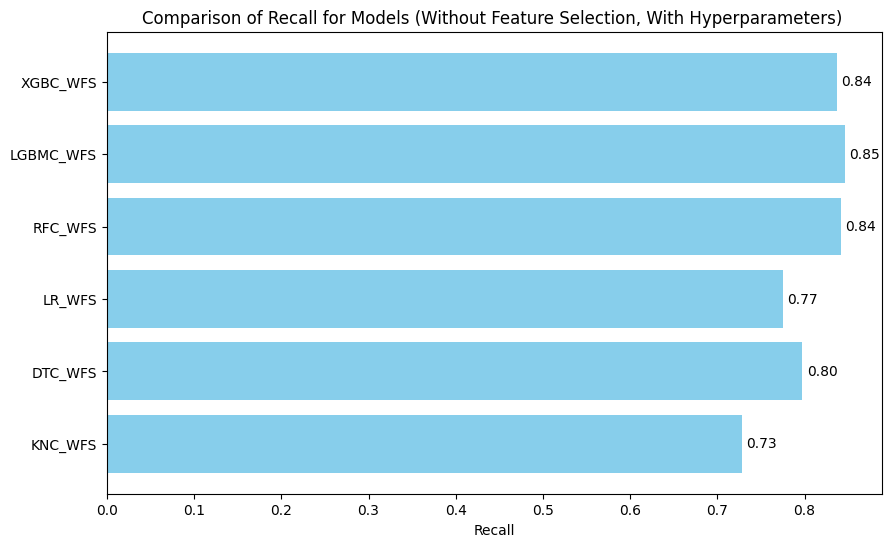

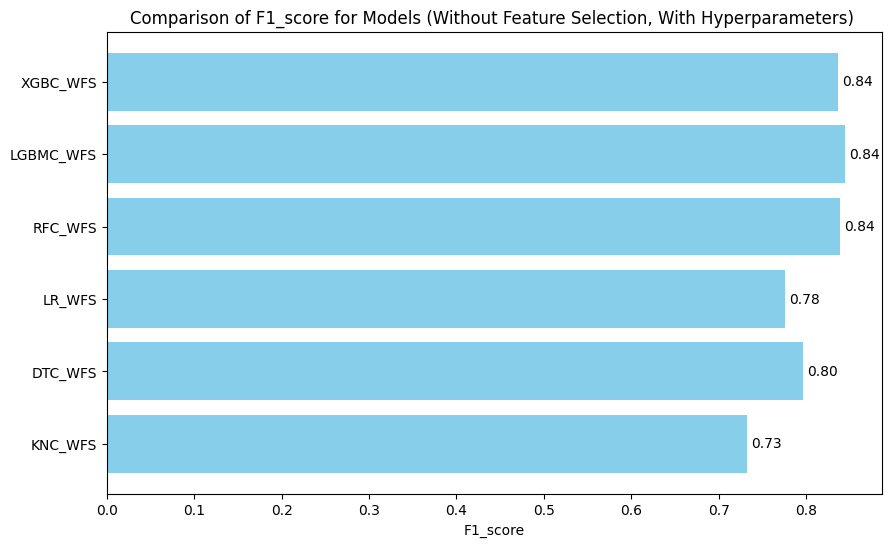

In [4655]:
# Compare models without feature selection but with hyperparameters based on 'accuracy', 'precision', 'recall', and 'f1_score'
plot_selected_models_comparison('ending','WFS')

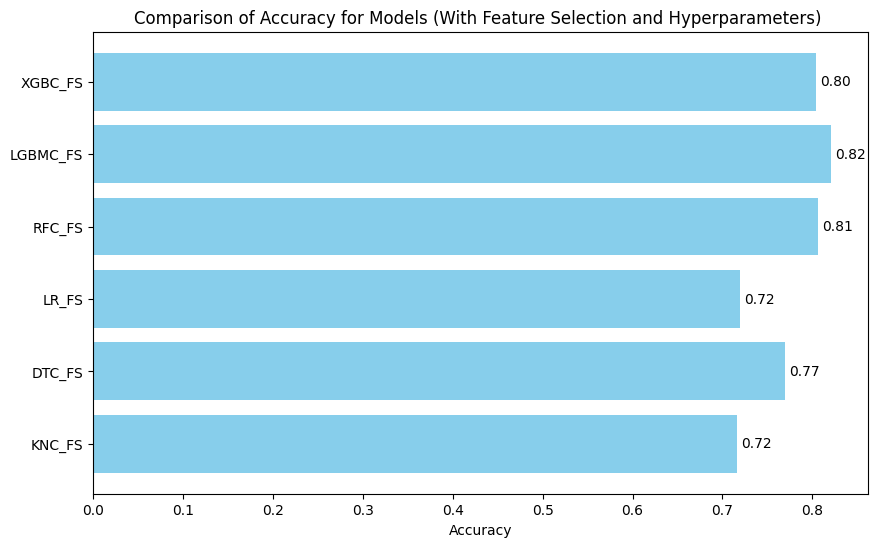

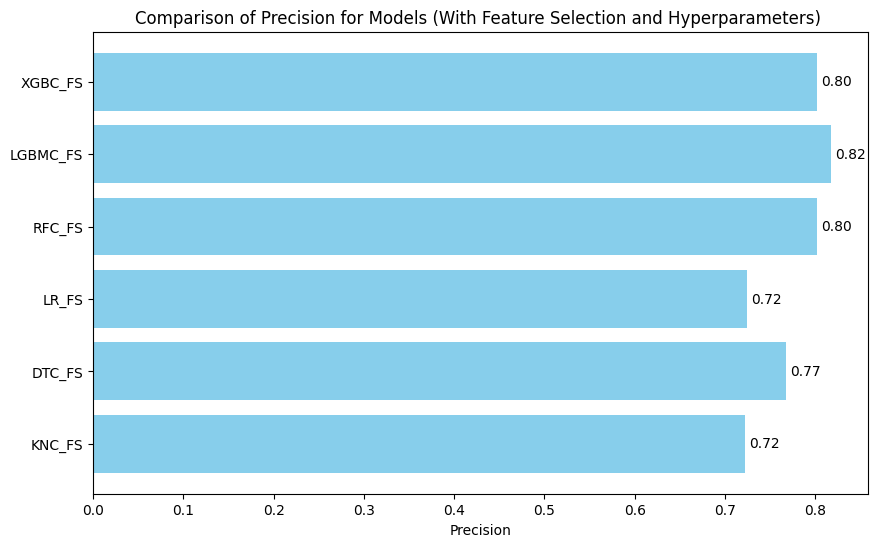

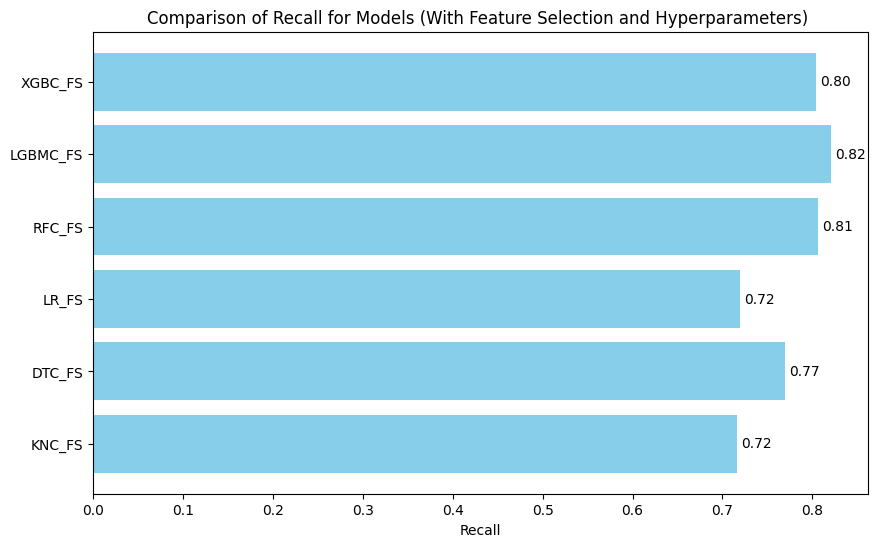

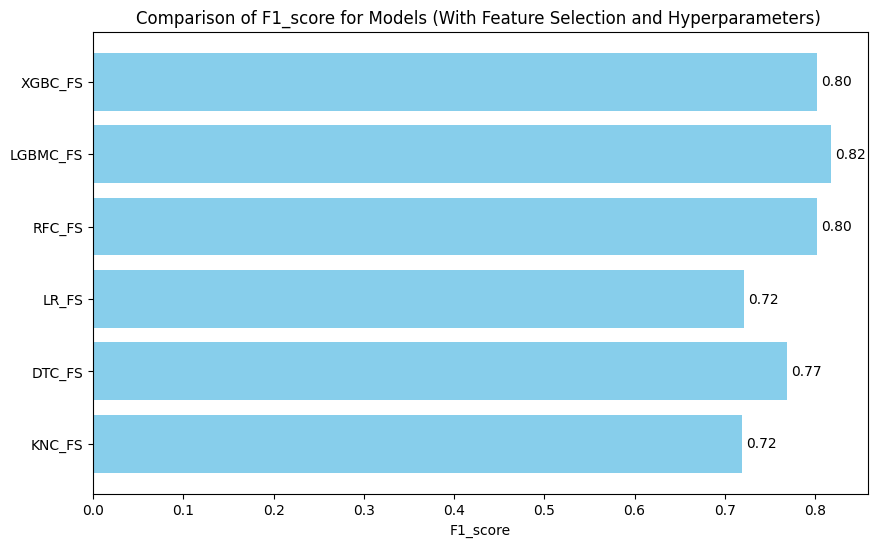

In [4656]:
# Compare models with feature selection band with hyperparameters based on 'accuracy', 'precision', 'recall', and 'f1_score'
plot_selected_models_comparison('ending','_FS')

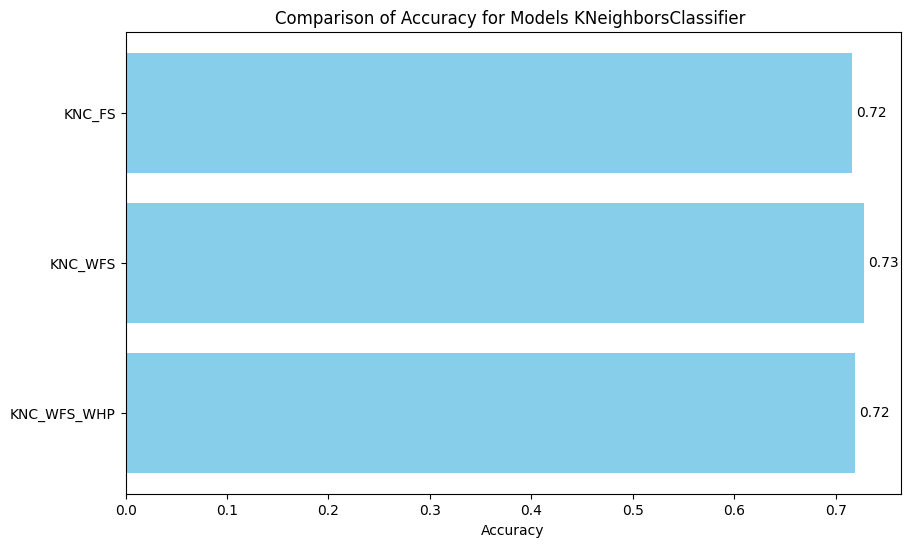

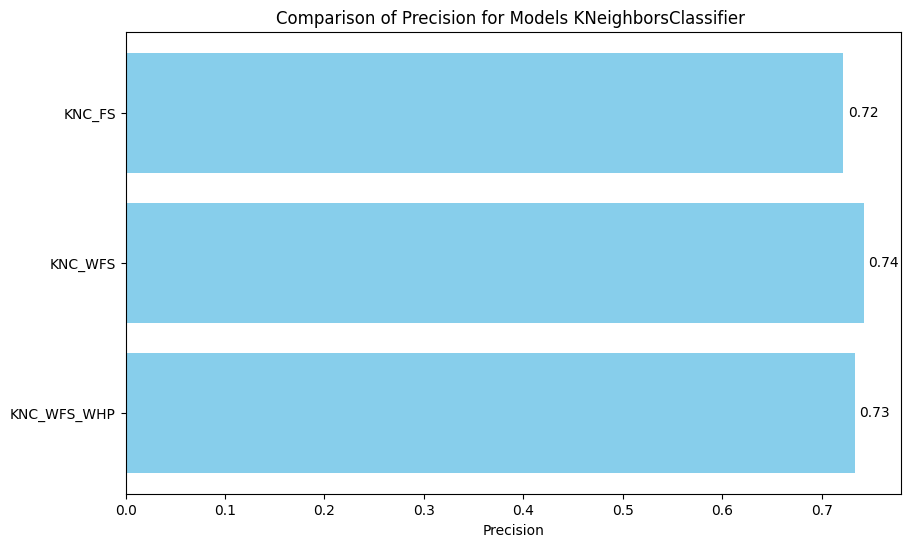

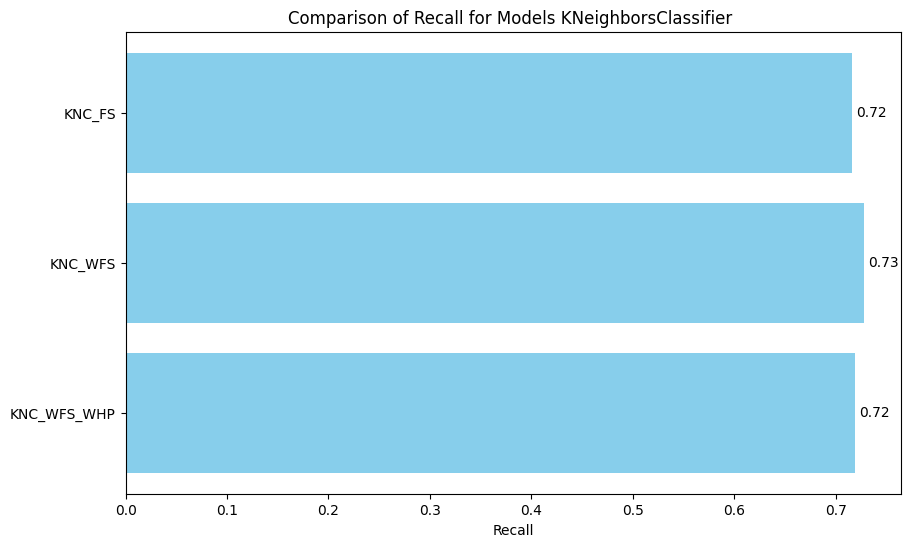

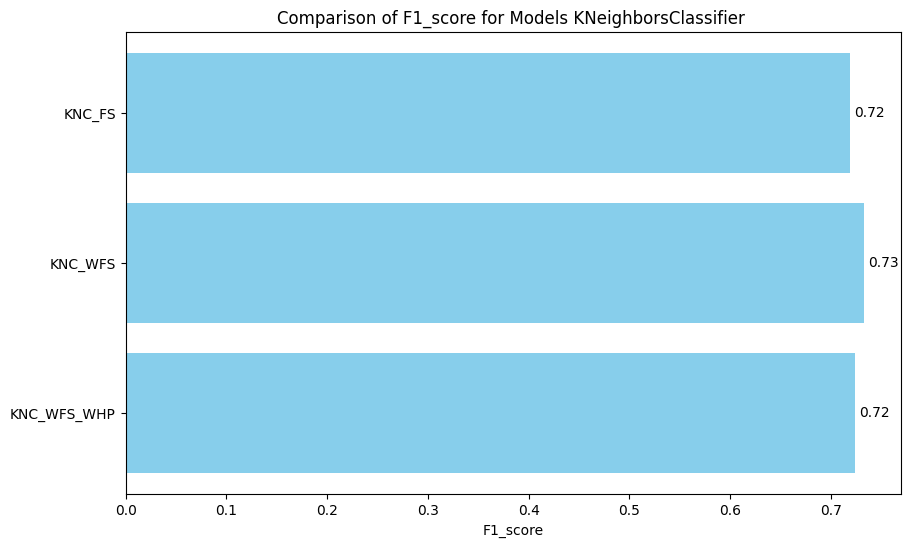

In [4657]:
# Compare all different KNN models based on 'accuracy', 'precision', 'recall', and 'f1_score'
plot_selected_models_comparison('starting','KNC')

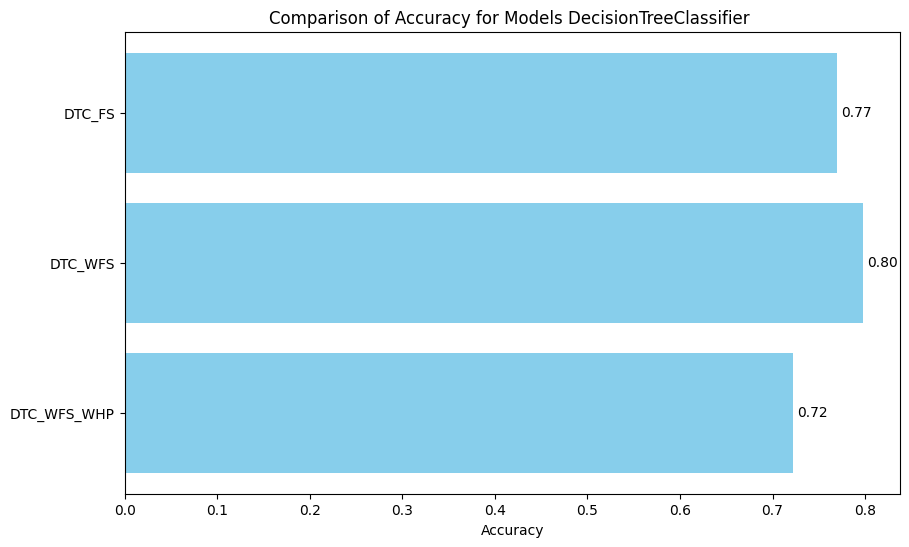

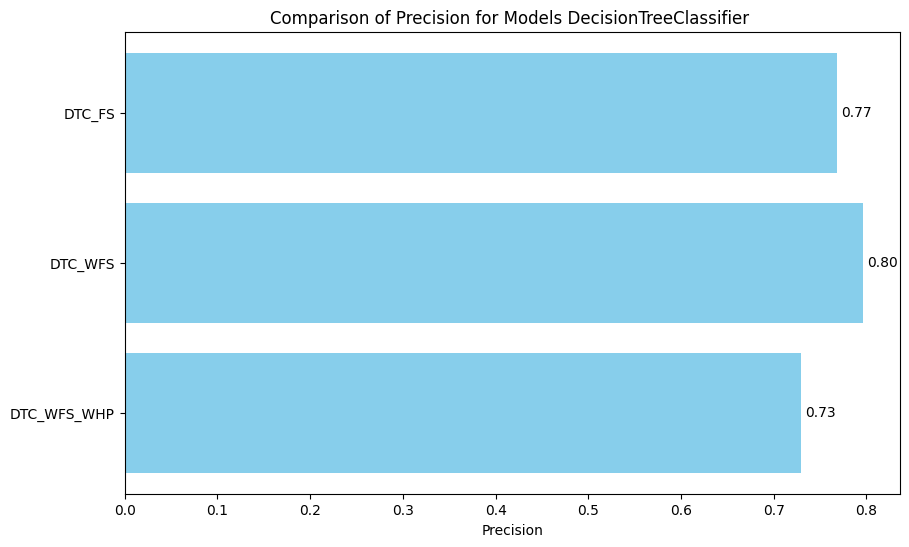

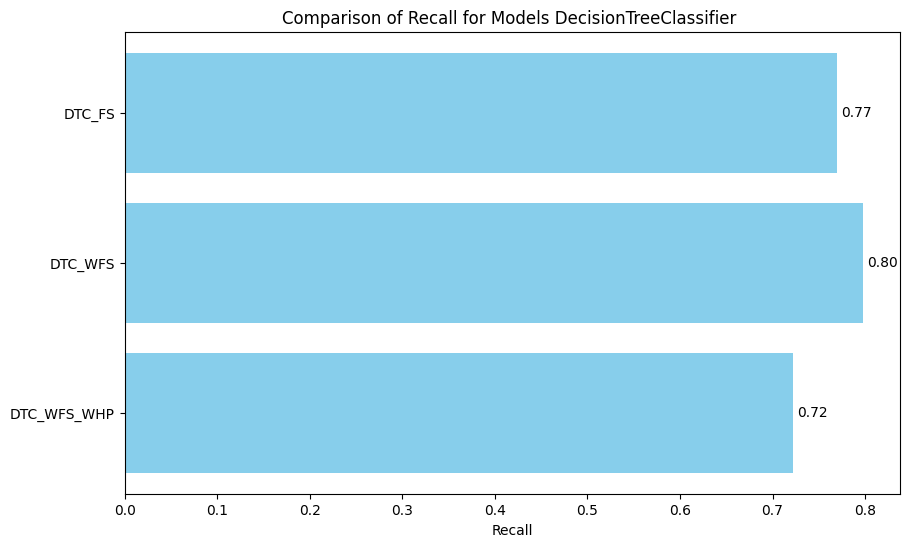

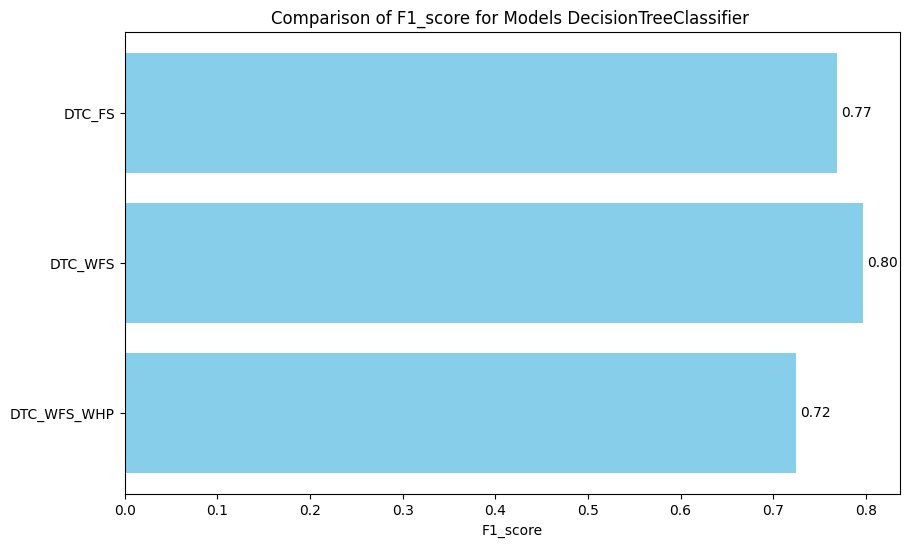

In [4658]:
# Compare all different Decision Tree models based on 'accuracy', 'precision', 'recall', and 'f1_score'
plot_selected_models_comparison('starting','DTC')

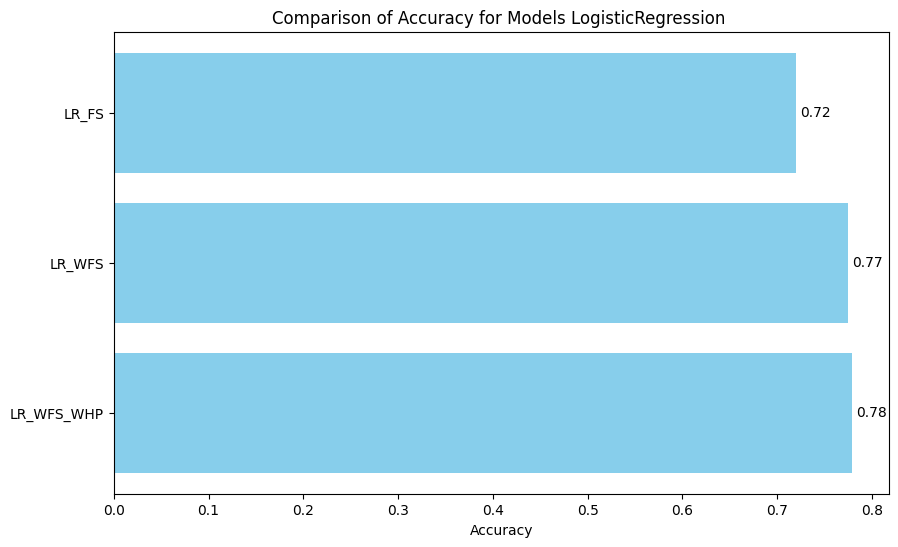

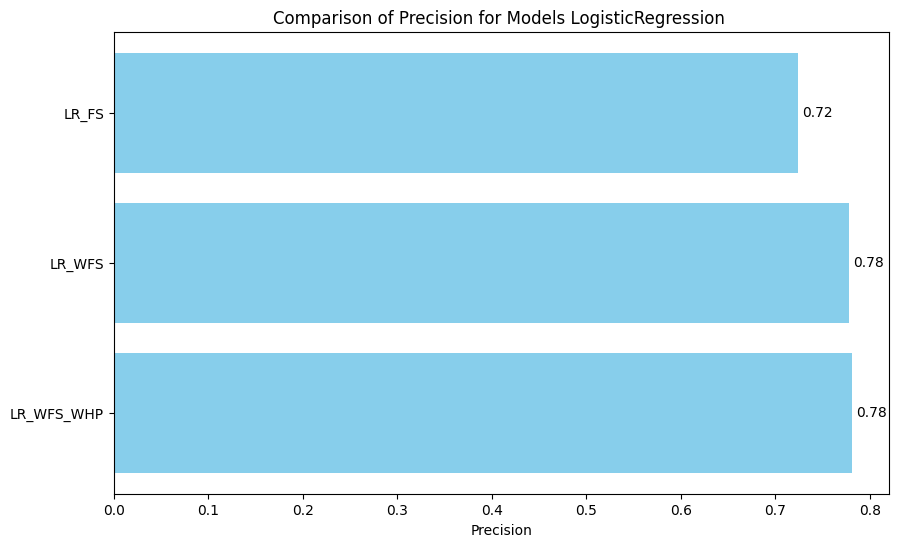

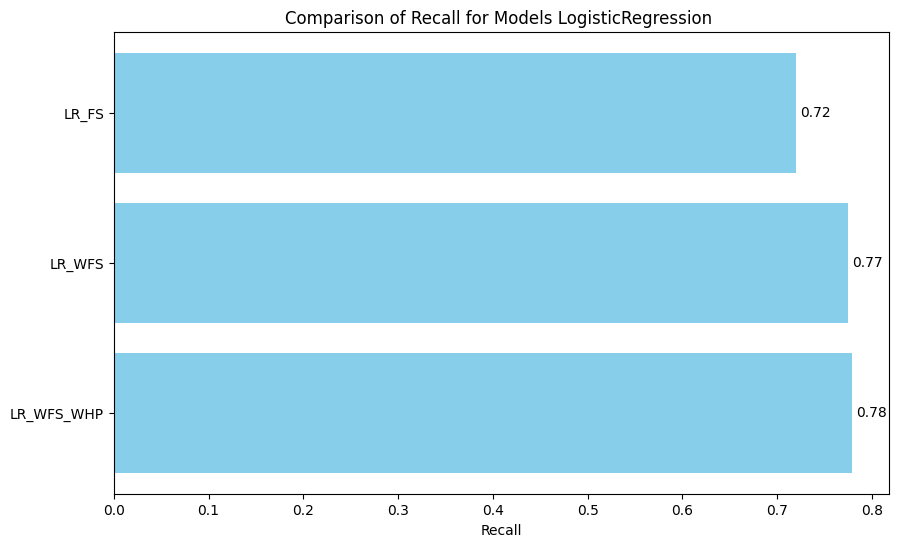

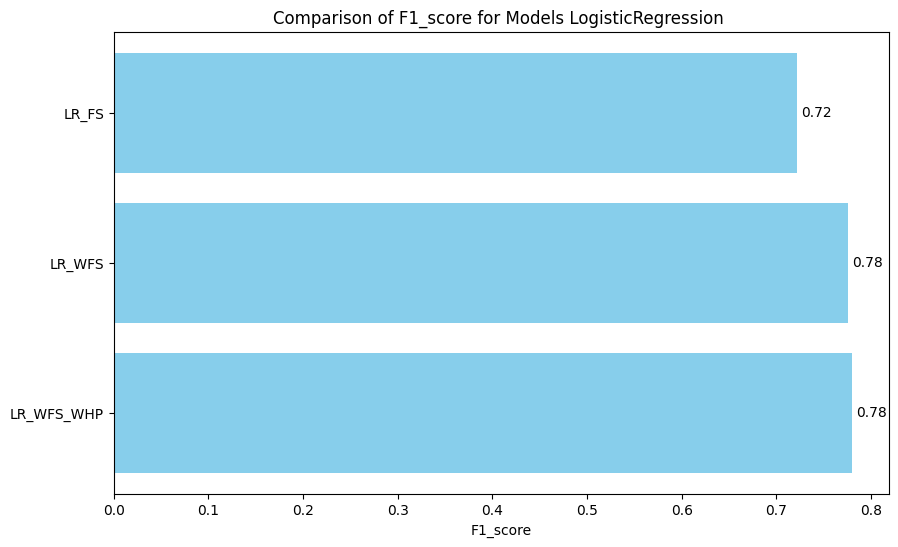

In [4659]:
# Compare all different Logistic Regression models based on 'accuracy', 'precision', 'recall', and 'f1_score'
plot_selected_models_comparison('starting','LR')

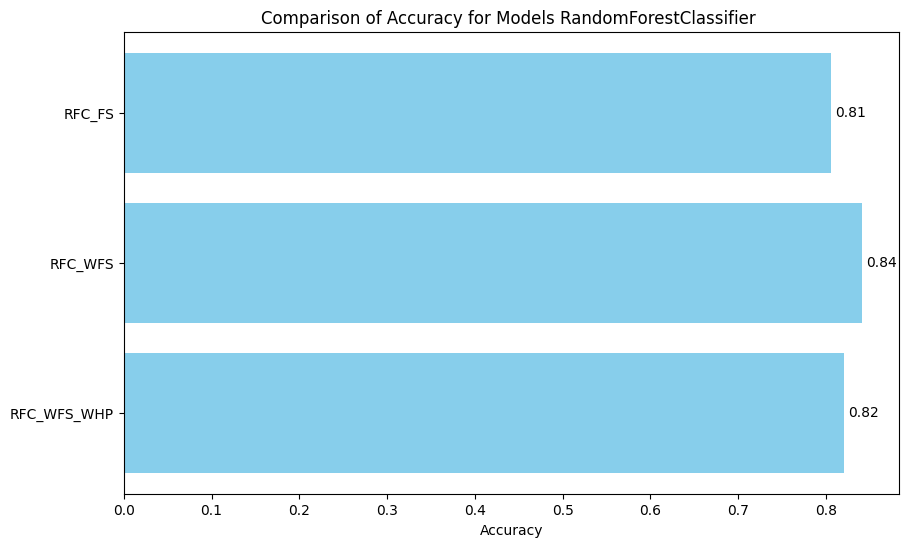

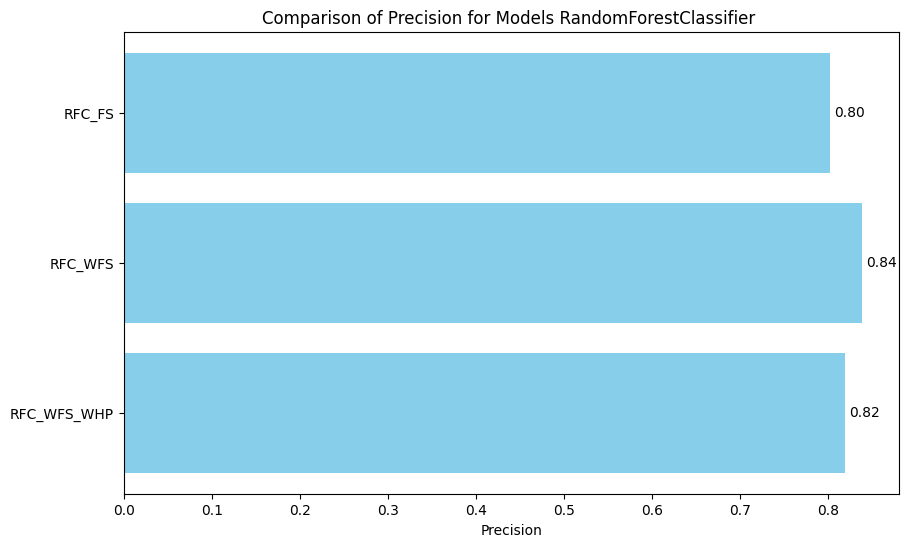

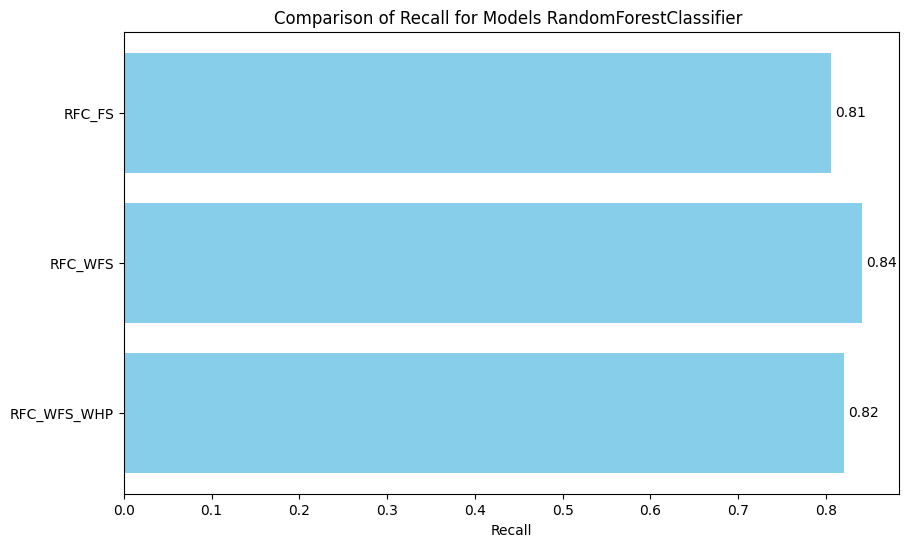

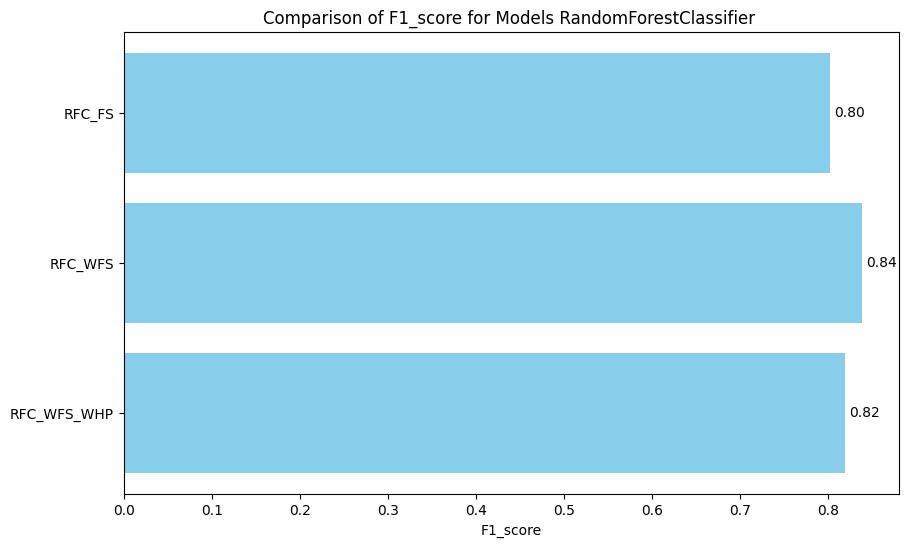

In [4660]:
# Compare all different Random Forest models based on 'accuracy', 'precision', 'recall', and 'f1_score'
plot_selected_models_comparison('starting','RFC')

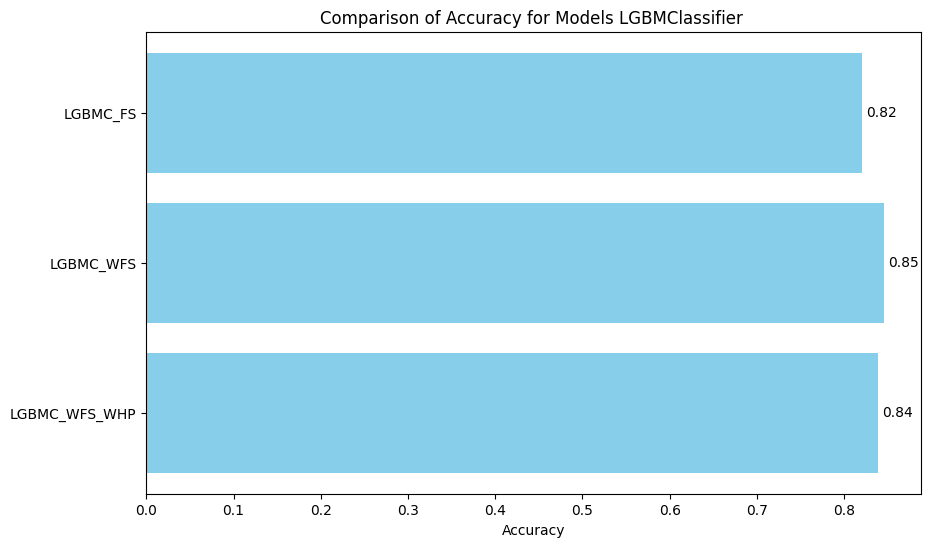

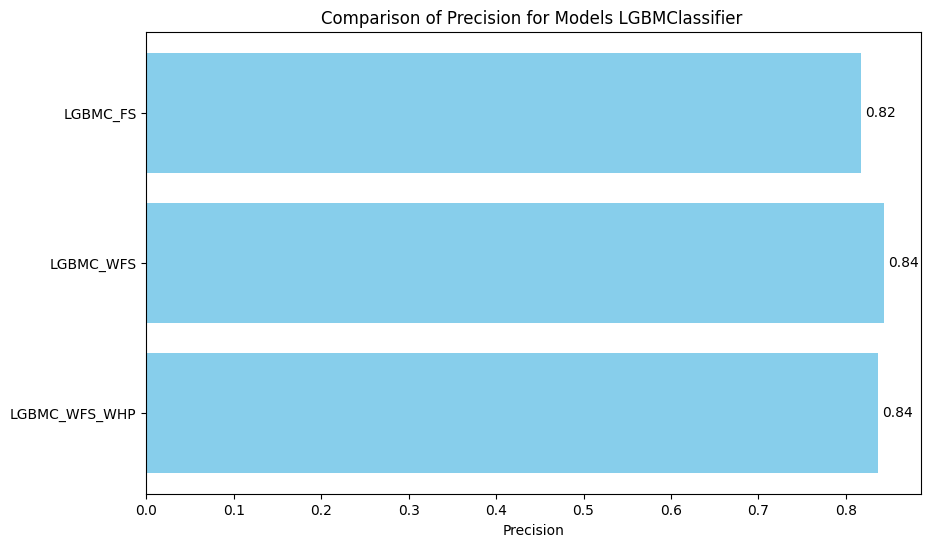

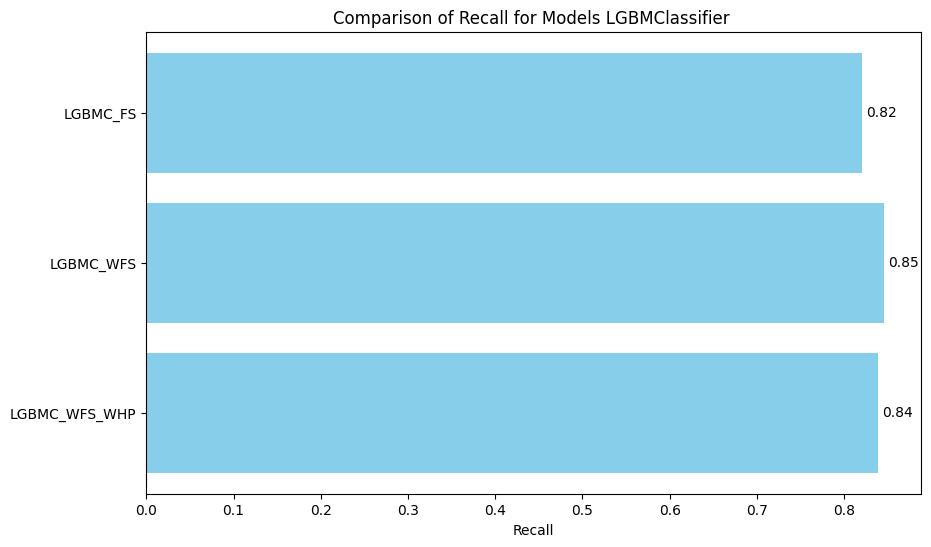

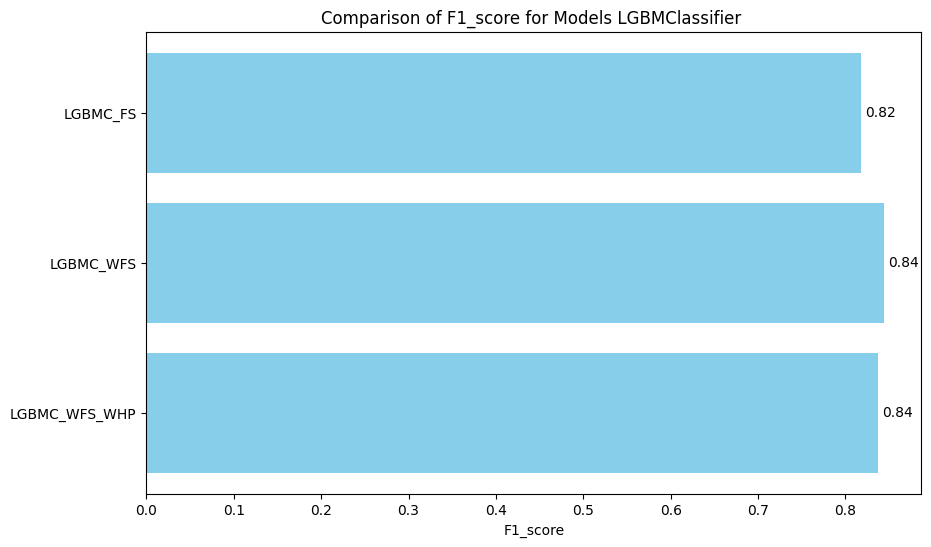

In [4661]:
# Compare all different LightGBM models based on 'accuracy', 'precision', 'recall', and 'f1_score'
plot_selected_models_comparison('starting','LGBMC')

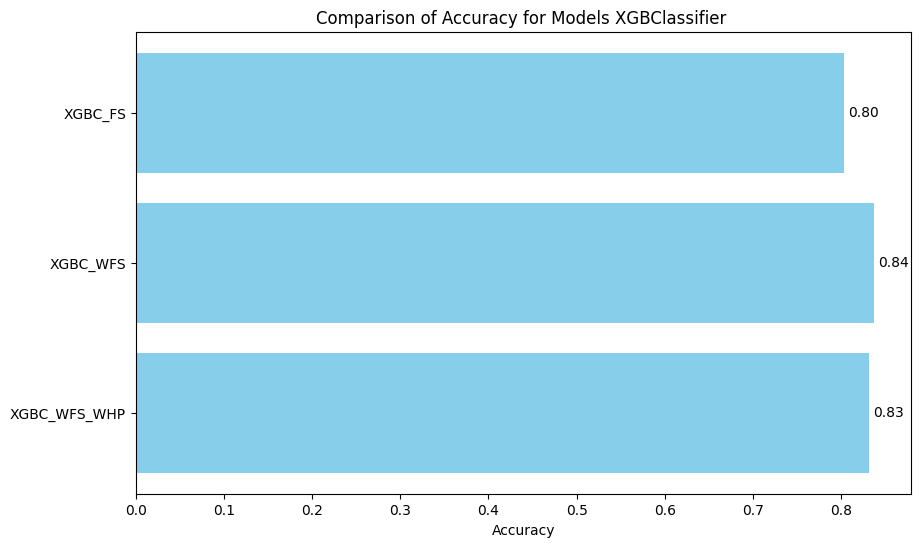

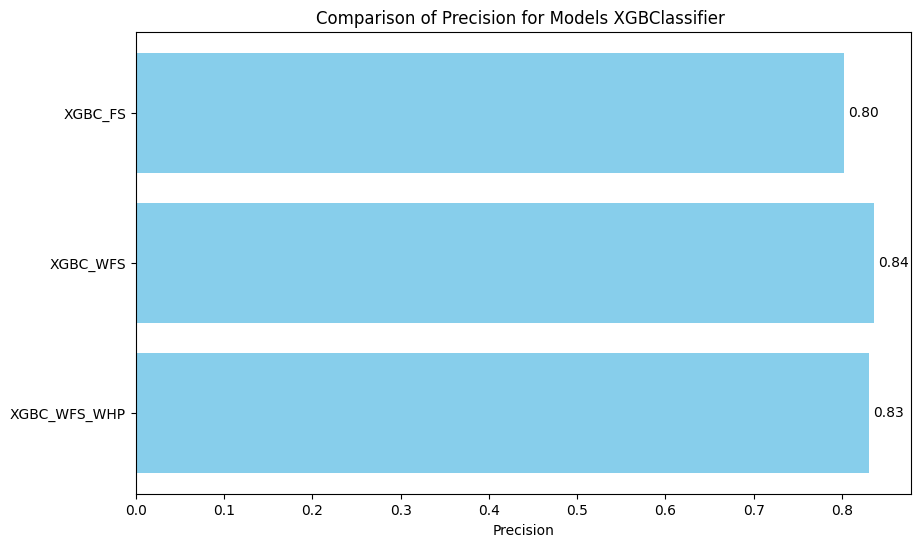

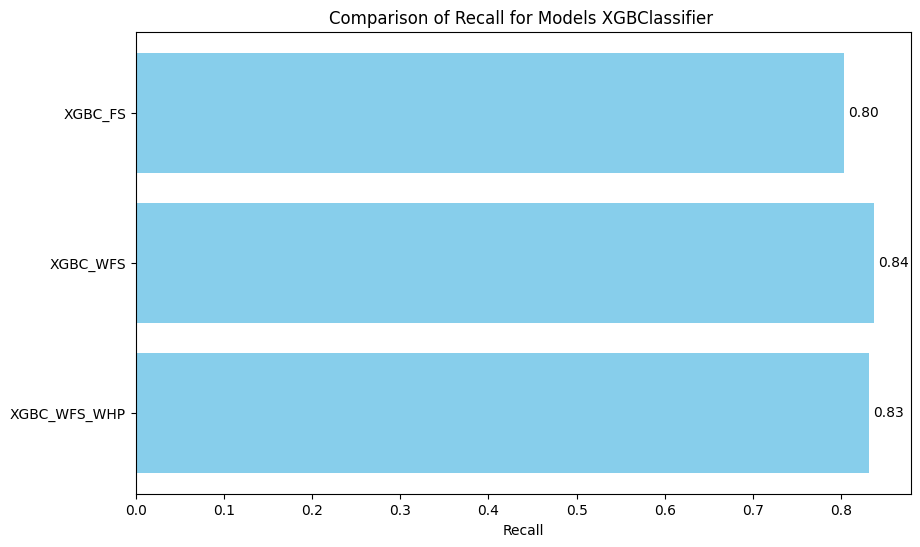

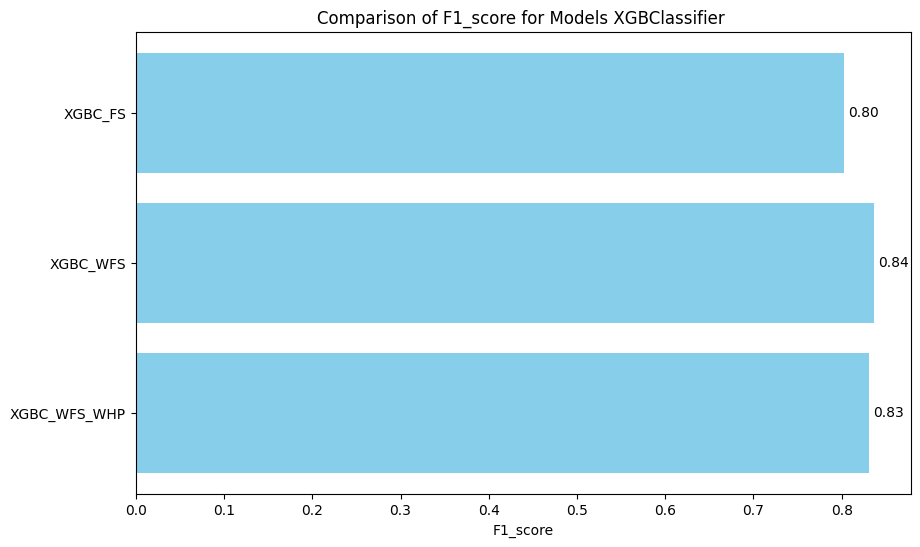

In [4662]:
# Compare all different XGBoost models based on 'accuracy', 'precision', 'recall', and 'f1_score'
plot_selected_models_comparison('starting','XGBC')

# Conclusion

Finally, after several trials and assessments, the boosting algorithms __(XGBoost and LightGBM)__ turned out to be the top-performing models in classifying whether or not the client will subscribe to the term deposit or no. Both models had a near identical performance in every metric while outperforming all the other models. The inclusion of feature selection does not enhance either of the models' individual performances, and even comes as a deteriment across all metrics. Similary, hyperparameter-tuning adds little value, and perfoming grid-search to find the best parameters only yields results comparable to the base models performance at best. Thus, we conclude that __(XGBoost and LightGBM)__  without feature selection and hyperparameter-tuning are the most suitable model for predicting whether a client will subscribe or not.